In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import string
import email
import itertools
import re


import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

punctuations = list(string.punctuation)
stopwords = set(nltk.corpus.stopwords.words('english'))
stemmer = nltk.PorterStemmer()
lemmatizer = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\favas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\favas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\favas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Combine the different parts of the email into a flat list of strings
def flatten_to_string(parts):
    ret = []
    if type(parts) == str:
        ret.append(parts)
    elif type(parts) == list:
        for part in parts:
            ret += flatten_to_string(part)
    elif parts.get_content_type == 'text/plain':
        ret += parts.get_payload()
    return ret

# Extract subject and body text from a single email file
def extract_email_text(path):
    # Load a single email from an input file
    with open(path, errors='ignore') as f:
        msg = email.message_from_file(f)
    if not msg:
        return ""

    # Read the email subject
    subject = msg['Subject']
    if not subject:
        subject = ""

    # Read the email body
    body = ' '.join(m for m in flatten_to_string(msg.get_payload()) if type(m) == str)
    if not body:
        body = ""

    return subject + ' ' + body

# Process a single email file into stemmed tokens
def load(path):
    email_text = extract_email_text(path)
    if not email_text:
        return []

     # emails to single token
    email_text = re.sub(r'\S@\S*\s?', ' emailaddress ', email_text)
    
    # removing nonalphanumeric charactor
    email_text=re.sub(r'[^a-zA-Z0-9 ]', ' ', email_text)
    
    # Tokenize the message
    tokens = nltk.word_tokenize(email_text.lower())

    # Remove punctuation from tokens
    #tokens = [i.strip("".join(punctuations)) for i in tokens if i not in punctuations]

    # Remove stopwords and stem tokens
    if len(tokens) >= 2:
        return [stemmer.stem(w) for w in tokens if (w not in stopwords and len(w)>2)]
    return []


#### Task-1: Naive Classifier

In [23]:
# define class for doing naive classification using blacklist of words

class NaiveClassifier:
    def __init__(self):
        self.blacklist = set()
        
    
    # method for geting blacklist from list of words seperately from ham and spam mails
    def get_blacklist(self,X_pos,X_neg,y):
        
        count_1 = y.count(1)
        count_0 = y.count(0)
        
        unique_positive_words = set(X_pos)     # set of unique words in spam mails
        unique_negative_words = set(X_neg)     # set of unique words in ham mails
        
        # blacklist = unique words in spam which are not present in ham
        self.blacklist = unique_positive_words-unique_negative_words
        
        return self
    
    #method for training 
    def fit(self, X, y):
        X_pos = list()
        X_neg = list()
        temp_blacklist = list()
        
        for i in range(len(y)):
            if y[i] == 1:
                X_pos.append(X[i])
            else:
                X_neg.append(X[i])
        
        # join all words into a single list seperatrly for spam(positive ,1) and ham(negative, 0)
        X_pos = list(itertools.chain.from_iterable(X_pos))
        X_neg = list(itertools.chain.from_iterable(X_neg))

        self.get_blacklist(X_pos,X_neg, y)
        return self
    
    # method for prediction
    def predict(self, X):
        y = [0 for i in range(len(X))]
        for i in range(len(X)):
            x = set(X[i])
            if len(x.intersection(self.blacklist)) >=1:
                y[i] = 1
            
        return y
  

In [8]:
# making label matrix from index file 
labels = []
file_labels = open("C:/Users/favas/Downloads/trec07p/delay/index")
for line in file_labels:
    temp = line.split('/')
    id_ = temp[2].rstrip('\n')
    label_ = temp[0][:-2].rstrip(' ')
    
    # spam = 1
    # ham = 0
    if str(temp[0][:-2].rstrip(' ')) == 'spam':
        l = 1
    else:
        l = 0
    labels.append((id_,l))

    
df = pd.DataFrame(labels, columns = ['id','label'])
df.head(10)

,id,label
0,inmail.1,1
1,inmail.2,0
2,inmail.3,1
3,inmail.4,1
4,inmail.5,1
5,inmail.6,1
6,inmail.7,1
7,inmail.8,1
8,inmail.9,1
9,inmail.10,0


In [10]:
# uploading each mails as tokens 
data = df.copy()
mail_path =  'C:/Users/favas/Downloads/trec07p/data/'
mail_tokens = []
for i in range(len(data)):
    print(f'{i}/{len(data)} Completed!')
    path = mail_path+str(data.iloc[i,0])
    temp = load(path)
    mail_tokens.append(temp)

0/75419 Completed!
1/75419 Completed!
2/75419 Completed!
3/75419 Completed!
4/75419 Completed!
5/75419 Completed!
6/75419 Completed!
7/75419 Completed!
8/75419 Completed!
9/75419 Completed!
10/75419 Completed!
11/75419 Completed!
12/75419 Completed!
13/75419 Completed!
14/75419 Completed!
15/75419 Completed!
16/75419 Completed!
17/75419 Completed!
18/75419 Completed!
19/75419 Completed!
20/75419 Completed!
21/75419 Completed!
22/75419 Completed!
23/75419 Completed!
24/75419 Completed!
25/75419 Completed!
26/75419 Completed!
27/75419 Completed!
28/75419 Completed!
29/75419 Completed!
30/75419 Completed!
31/75419 Completed!
32/75419 Completed!
33/75419 Completed!
34/75419 Completed!
35/75419 Completed!
36/75419 Completed!
37/75419 Completed!
38/75419 Completed!
39/75419 Completed!
40/75419 Completed!
41/75419 Completed!
42/75419 Completed!
43/75419 Completed!
44/75419 Completed!
45/75419 Completed!
46/75419 Completed!
47/75419 Completed!
48/75419 Completed!
49/75419 Completed!
50/75419 C

396/75419 Completed!
397/75419 Completed!
398/75419 Completed!
399/75419 Completed!
400/75419 Completed!
401/75419 Completed!
402/75419 Completed!
403/75419 Completed!
404/75419 Completed!
405/75419 Completed!
406/75419 Completed!
407/75419 Completed!
408/75419 Completed!
409/75419 Completed!
410/75419 Completed!
411/75419 Completed!
412/75419 Completed!
413/75419 Completed!
414/75419 Completed!
415/75419 Completed!
416/75419 Completed!
417/75419 Completed!
418/75419 Completed!
419/75419 Completed!
420/75419 Completed!
421/75419 Completed!
422/75419 Completed!
423/75419 Completed!
424/75419 Completed!
425/75419 Completed!
426/75419 Completed!
427/75419 Completed!
428/75419 Completed!
429/75419 Completed!
430/75419 Completed!
431/75419 Completed!
432/75419 Completed!
433/75419 Completed!
434/75419 Completed!
435/75419 Completed!
436/75419 Completed!
437/75419 Completed!
438/75419 Completed!
439/75419 Completed!
440/75419 Completed!
441/75419 Completed!
442/75419 Completed!
443/75419 Com

787/75419 Completed!
788/75419 Completed!
789/75419 Completed!
790/75419 Completed!
791/75419 Completed!
792/75419 Completed!
793/75419 Completed!
794/75419 Completed!
795/75419 Completed!
796/75419 Completed!
797/75419 Completed!
798/75419 Completed!
799/75419 Completed!
800/75419 Completed!
801/75419 Completed!
802/75419 Completed!
803/75419 Completed!
804/75419 Completed!
805/75419 Completed!
806/75419 Completed!
807/75419 Completed!
808/75419 Completed!
809/75419 Completed!
810/75419 Completed!
811/75419 Completed!
812/75419 Completed!
813/75419 Completed!
814/75419 Completed!
815/75419 Completed!
816/75419 Completed!
817/75419 Completed!
818/75419 Completed!
819/75419 Completed!
820/75419 Completed!
821/75419 Completed!
822/75419 Completed!
823/75419 Completed!
824/75419 Completed!
825/75419 Completed!
826/75419 Completed!
827/75419 Completed!
828/75419 Completed!
829/75419 Completed!
830/75419 Completed!
831/75419 Completed!
832/75419 Completed!
833/75419 Completed!
834/75419 Com

1171/75419 Completed!
1172/75419 Completed!
1173/75419 Completed!
1174/75419 Completed!
1175/75419 Completed!
1176/75419 Completed!
1177/75419 Completed!
1178/75419 Completed!
1179/75419 Completed!
1180/75419 Completed!
1181/75419 Completed!
1182/75419 Completed!
1183/75419 Completed!
1184/75419 Completed!
1185/75419 Completed!
1186/75419 Completed!
1187/75419 Completed!
1188/75419 Completed!
1189/75419 Completed!
1190/75419 Completed!
1191/75419 Completed!
1192/75419 Completed!
1193/75419 Completed!
1194/75419 Completed!
1195/75419 Completed!
1196/75419 Completed!
1197/75419 Completed!
1198/75419 Completed!
1199/75419 Completed!
1200/75419 Completed!
1201/75419 Completed!
1202/75419 Completed!
1203/75419 Completed!
1204/75419 Completed!
1205/75419 Completed!
1206/75419 Completed!
1207/75419 Completed!
1208/75419 Completed!
1209/75419 Completed!
1210/75419 Completed!
1211/75419 Completed!
1212/75419 Completed!
1213/75419 Completed!
1214/75419 Completed!
1215/75419 Completed!
1216/75419

1544/75419 Completed!
1545/75419 Completed!
1546/75419 Completed!
1547/75419 Completed!
1548/75419 Completed!
1549/75419 Completed!
1550/75419 Completed!
1551/75419 Completed!
1552/75419 Completed!
1553/75419 Completed!
1554/75419 Completed!
1555/75419 Completed!
1556/75419 Completed!
1557/75419 Completed!
1558/75419 Completed!
1559/75419 Completed!
1560/75419 Completed!
1561/75419 Completed!
1562/75419 Completed!
1563/75419 Completed!
1564/75419 Completed!
1565/75419 Completed!
1566/75419 Completed!
1567/75419 Completed!
1568/75419 Completed!
1569/75419 Completed!
1570/75419 Completed!
1571/75419 Completed!
1572/75419 Completed!
1573/75419 Completed!
1574/75419 Completed!
1575/75419 Completed!
1576/75419 Completed!
1577/75419 Completed!
1578/75419 Completed!
1579/75419 Completed!
1580/75419 Completed!
1581/75419 Completed!
1582/75419 Completed!
1583/75419 Completed!
1584/75419 Completed!
1585/75419 Completed!
1586/75419 Completed!
1587/75419 Completed!
1588/75419 Completed!
1589/75419

1918/75419 Completed!
1919/75419 Completed!
1920/75419 Completed!
1921/75419 Completed!
1922/75419 Completed!
1923/75419 Completed!
1924/75419 Completed!
1925/75419 Completed!
1926/75419 Completed!
1927/75419 Completed!
1928/75419 Completed!
1929/75419 Completed!
1930/75419 Completed!
1931/75419 Completed!
1932/75419 Completed!
1933/75419 Completed!
1934/75419 Completed!
1935/75419 Completed!
1936/75419 Completed!
1937/75419 Completed!
1938/75419 Completed!
1939/75419 Completed!
1940/75419 Completed!
1941/75419 Completed!
1942/75419 Completed!
1943/75419 Completed!
1944/75419 Completed!
1945/75419 Completed!
1946/75419 Completed!
1947/75419 Completed!
1948/75419 Completed!
1949/75419 Completed!
1950/75419 Completed!
1951/75419 Completed!
1952/75419 Completed!
1953/75419 Completed!
1954/75419 Completed!
1955/75419 Completed!
1956/75419 Completed!
1957/75419 Completed!
1958/75419 Completed!
1959/75419 Completed!
1960/75419 Completed!
1961/75419 Completed!
1962/75419 Completed!
1963/75419

2291/75419 Completed!
2292/75419 Completed!
2293/75419 Completed!
2294/75419 Completed!
2295/75419 Completed!
2296/75419 Completed!
2297/75419 Completed!
2298/75419 Completed!
2299/75419 Completed!
2300/75419 Completed!
2301/75419 Completed!
2302/75419 Completed!
2303/75419 Completed!
2304/75419 Completed!
2305/75419 Completed!
2306/75419 Completed!
2307/75419 Completed!
2308/75419 Completed!
2309/75419 Completed!
2310/75419 Completed!
2311/75419 Completed!
2312/75419 Completed!
2313/75419 Completed!
2314/75419 Completed!
2315/75419 Completed!
2316/75419 Completed!
2317/75419 Completed!
2318/75419 Completed!
2319/75419 Completed!
2320/75419 Completed!
2321/75419 Completed!
2322/75419 Completed!
2323/75419 Completed!
2324/75419 Completed!
2325/75419 Completed!
2326/75419 Completed!
2327/75419 Completed!
2328/75419 Completed!
2329/75419 Completed!
2330/75419 Completed!
2331/75419 Completed!
2332/75419 Completed!
2333/75419 Completed!
2334/75419 Completed!
2335/75419 Completed!
2336/75419

2665/75419 Completed!
2666/75419 Completed!
2667/75419 Completed!
2668/75419 Completed!
2669/75419 Completed!
2670/75419 Completed!
2671/75419 Completed!
2672/75419 Completed!
2673/75419 Completed!
2674/75419 Completed!
2675/75419 Completed!
2676/75419 Completed!
2677/75419 Completed!
2678/75419 Completed!
2679/75419 Completed!
2680/75419 Completed!
2681/75419 Completed!
2682/75419 Completed!
2683/75419 Completed!
2684/75419 Completed!
2685/75419 Completed!
2686/75419 Completed!
2687/75419 Completed!
2688/75419 Completed!
2689/75419 Completed!
2690/75419 Completed!
2691/75419 Completed!
2692/75419 Completed!
2693/75419 Completed!
2694/75419 Completed!
2695/75419 Completed!
2696/75419 Completed!
2697/75419 Completed!
2698/75419 Completed!
2699/75419 Completed!
2700/75419 Completed!
2701/75419 Completed!
2702/75419 Completed!
2703/75419 Completed!
2704/75419 Completed!
2705/75419 Completed!
2706/75419 Completed!
2707/75419 Completed!
2708/75419 Completed!
2709/75419 Completed!
2710/75419

3038/75419 Completed!
3039/75419 Completed!
3040/75419 Completed!
3041/75419 Completed!
3042/75419 Completed!
3043/75419 Completed!
3044/75419 Completed!
3045/75419 Completed!
3046/75419 Completed!
3047/75419 Completed!
3048/75419 Completed!
3049/75419 Completed!
3050/75419 Completed!
3051/75419 Completed!
3052/75419 Completed!
3053/75419 Completed!
3054/75419 Completed!
3055/75419 Completed!
3056/75419 Completed!
3057/75419 Completed!
3058/75419 Completed!
3059/75419 Completed!
3060/75419 Completed!
3061/75419 Completed!
3062/75419 Completed!
3063/75419 Completed!
3064/75419 Completed!
3065/75419 Completed!
3066/75419 Completed!
3067/75419 Completed!
3068/75419 Completed!
3069/75419 Completed!
3070/75419 Completed!
3071/75419 Completed!
3072/75419 Completed!
3073/75419 Completed!
3074/75419 Completed!
3075/75419 Completed!
3076/75419 Completed!
3077/75419 Completed!
3078/75419 Completed!
3079/75419 Completed!
3080/75419 Completed!
3081/75419 Completed!
3082/75419 Completed!
3083/75419

3413/75419 Completed!
3414/75419 Completed!
3415/75419 Completed!
3416/75419 Completed!
3417/75419 Completed!
3418/75419 Completed!
3419/75419 Completed!
3420/75419 Completed!
3421/75419 Completed!
3422/75419 Completed!
3423/75419 Completed!
3424/75419 Completed!
3425/75419 Completed!
3426/75419 Completed!
3427/75419 Completed!
3428/75419 Completed!
3429/75419 Completed!
3430/75419 Completed!
3431/75419 Completed!
3432/75419 Completed!
3433/75419 Completed!
3434/75419 Completed!
3435/75419 Completed!
3436/75419 Completed!
3437/75419 Completed!
3438/75419 Completed!
3439/75419 Completed!
3440/75419 Completed!
3441/75419 Completed!
3442/75419 Completed!
3443/75419 Completed!
3444/75419 Completed!
3445/75419 Completed!
3446/75419 Completed!
3447/75419 Completed!
3448/75419 Completed!
3449/75419 Completed!
3450/75419 Completed!
3451/75419 Completed!
3452/75419 Completed!
3453/75419 Completed!
3454/75419 Completed!
3455/75419 Completed!
3456/75419 Completed!
3457/75419 Completed!
3458/75419

3787/75419 Completed!
3788/75419 Completed!
3789/75419 Completed!
3790/75419 Completed!
3791/75419 Completed!
3792/75419 Completed!
3793/75419 Completed!
3794/75419 Completed!
3795/75419 Completed!
3796/75419 Completed!
3797/75419 Completed!
3798/75419 Completed!
3799/75419 Completed!
3800/75419 Completed!
3801/75419 Completed!
3802/75419 Completed!
3803/75419 Completed!
3804/75419 Completed!
3805/75419 Completed!
3806/75419 Completed!
3807/75419 Completed!
3808/75419 Completed!
3809/75419 Completed!
3810/75419 Completed!
3811/75419 Completed!
3812/75419 Completed!
3813/75419 Completed!
3814/75419 Completed!
3815/75419 Completed!
3816/75419 Completed!
3817/75419 Completed!
3818/75419 Completed!
3819/75419 Completed!
3820/75419 Completed!
3821/75419 Completed!
3822/75419 Completed!
3823/75419 Completed!
3824/75419 Completed!
3825/75419 Completed!
3826/75419 Completed!
3827/75419 Completed!
3828/75419 Completed!
3829/75419 Completed!
3830/75419 Completed!
3831/75419 Completed!
3832/75419

4161/75419 Completed!
4162/75419 Completed!
4163/75419 Completed!
4164/75419 Completed!
4165/75419 Completed!
4166/75419 Completed!
4167/75419 Completed!
4168/75419 Completed!
4169/75419 Completed!
4170/75419 Completed!
4171/75419 Completed!
4172/75419 Completed!
4173/75419 Completed!
4174/75419 Completed!
4175/75419 Completed!
4176/75419 Completed!
4177/75419 Completed!
4178/75419 Completed!
4179/75419 Completed!
4180/75419 Completed!
4181/75419 Completed!
4182/75419 Completed!
4183/75419 Completed!
4184/75419 Completed!
4185/75419 Completed!
4186/75419 Completed!
4187/75419 Completed!
4188/75419 Completed!
4189/75419 Completed!
4190/75419 Completed!
4191/75419 Completed!
4192/75419 Completed!
4193/75419 Completed!
4194/75419 Completed!
4195/75419 Completed!
4196/75419 Completed!
4197/75419 Completed!
4198/75419 Completed!
4199/75419 Completed!
4200/75419 Completed!
4201/75419 Completed!
4202/75419 Completed!
4203/75419 Completed!
4204/75419 Completed!
4205/75419 Completed!
4206/75419

4536/75419 Completed!
4537/75419 Completed!
4538/75419 Completed!
4539/75419 Completed!
4540/75419 Completed!
4541/75419 Completed!
4542/75419 Completed!
4543/75419 Completed!
4544/75419 Completed!
4545/75419 Completed!
4546/75419 Completed!
4547/75419 Completed!
4548/75419 Completed!
4549/75419 Completed!
4550/75419 Completed!
4551/75419 Completed!
4552/75419 Completed!
4553/75419 Completed!
4554/75419 Completed!
4555/75419 Completed!
4556/75419 Completed!
4557/75419 Completed!
4558/75419 Completed!
4559/75419 Completed!
4560/75419 Completed!
4561/75419 Completed!
4562/75419 Completed!
4563/75419 Completed!
4564/75419 Completed!
4565/75419 Completed!
4566/75419 Completed!
4567/75419 Completed!
4568/75419 Completed!
4569/75419 Completed!
4570/75419 Completed!
4571/75419 Completed!
4572/75419 Completed!
4573/75419 Completed!
4574/75419 Completed!
4575/75419 Completed!
4576/75419 Completed!
4577/75419 Completed!
4578/75419 Completed!
4579/75419 Completed!
4580/75419 Completed!
4581/75419

4910/75419 Completed!
4911/75419 Completed!
4912/75419 Completed!
4913/75419 Completed!
4914/75419 Completed!
4915/75419 Completed!
4916/75419 Completed!
4917/75419 Completed!
4918/75419 Completed!
4919/75419 Completed!
4920/75419 Completed!
4921/75419 Completed!
4922/75419 Completed!
4923/75419 Completed!
4924/75419 Completed!
4925/75419 Completed!
4926/75419 Completed!
4927/75419 Completed!
4928/75419 Completed!
4929/75419 Completed!
4930/75419 Completed!
4931/75419 Completed!
4932/75419 Completed!
4933/75419 Completed!
4934/75419 Completed!
4935/75419 Completed!
4936/75419 Completed!
4937/75419 Completed!
4938/75419 Completed!
4939/75419 Completed!
4940/75419 Completed!
4941/75419 Completed!
4942/75419 Completed!
4943/75419 Completed!
4944/75419 Completed!
4945/75419 Completed!
4946/75419 Completed!
4947/75419 Completed!
4948/75419 Completed!
4949/75419 Completed!
4950/75419 Completed!
4951/75419 Completed!
4952/75419 Completed!
4953/75419 Completed!
4954/75419 Completed!
4955/75419

5284/75419 Completed!
5285/75419 Completed!
5286/75419 Completed!
5287/75419 Completed!
5288/75419 Completed!
5289/75419 Completed!
5290/75419 Completed!
5291/75419 Completed!
5292/75419 Completed!
5293/75419 Completed!
5294/75419 Completed!
5295/75419 Completed!
5296/75419 Completed!
5297/75419 Completed!
5298/75419 Completed!
5299/75419 Completed!
5300/75419 Completed!
5301/75419 Completed!
5302/75419 Completed!
5303/75419 Completed!
5304/75419 Completed!
5305/75419 Completed!
5306/75419 Completed!
5307/75419 Completed!
5308/75419 Completed!
5309/75419 Completed!
5310/75419 Completed!
5311/75419 Completed!
5312/75419 Completed!
5313/75419 Completed!
5314/75419 Completed!
5315/75419 Completed!
5316/75419 Completed!
5317/75419 Completed!
5318/75419 Completed!
5319/75419 Completed!
5320/75419 Completed!
5321/75419 Completed!
5322/75419 Completed!
5323/75419 Completed!
5324/75419 Completed!
5325/75419 Completed!
5326/75419 Completed!
5327/75419 Completed!
5328/75419 Completed!
5329/75419

5658/75419 Completed!
5659/75419 Completed!
5660/75419 Completed!
5661/75419 Completed!
5662/75419 Completed!
5663/75419 Completed!
5664/75419 Completed!
5665/75419 Completed!
5666/75419 Completed!
5667/75419 Completed!
5668/75419 Completed!
5669/75419 Completed!
5670/75419 Completed!
5671/75419 Completed!
5672/75419 Completed!
5673/75419 Completed!
5674/75419 Completed!
5675/75419 Completed!
5676/75419 Completed!
5677/75419 Completed!
5678/75419 Completed!
5679/75419 Completed!
5680/75419 Completed!
5681/75419 Completed!
5682/75419 Completed!
5683/75419 Completed!
5684/75419 Completed!
5685/75419 Completed!
5686/75419 Completed!
5687/75419 Completed!
5688/75419 Completed!
5689/75419 Completed!
5690/75419 Completed!
5691/75419 Completed!
5692/75419 Completed!
5693/75419 Completed!
5694/75419 Completed!
5695/75419 Completed!
5696/75419 Completed!
5697/75419 Completed!
5698/75419 Completed!
5699/75419 Completed!
5700/75419 Completed!
5701/75419 Completed!
5702/75419 Completed!
5703/75419

6031/75419 Completed!
6032/75419 Completed!
6033/75419 Completed!
6034/75419 Completed!
6035/75419 Completed!
6036/75419 Completed!
6037/75419 Completed!
6038/75419 Completed!
6039/75419 Completed!
6040/75419 Completed!
6041/75419 Completed!
6042/75419 Completed!
6043/75419 Completed!
6044/75419 Completed!
6045/75419 Completed!
6046/75419 Completed!
6047/75419 Completed!
6048/75419 Completed!
6049/75419 Completed!
6050/75419 Completed!
6051/75419 Completed!
6052/75419 Completed!
6053/75419 Completed!
6054/75419 Completed!
6055/75419 Completed!
6056/75419 Completed!
6057/75419 Completed!
6058/75419 Completed!
6059/75419 Completed!
6060/75419 Completed!
6061/75419 Completed!
6062/75419 Completed!
6063/75419 Completed!
6064/75419 Completed!
6065/75419 Completed!
6066/75419 Completed!
6067/75419 Completed!
6068/75419 Completed!
6069/75419 Completed!
6070/75419 Completed!
6071/75419 Completed!
6072/75419 Completed!
6073/75419 Completed!
6074/75419 Completed!
6075/75419 Completed!
6076/75419

6404/75419 Completed!
6405/75419 Completed!
6406/75419 Completed!
6407/75419 Completed!
6408/75419 Completed!
6409/75419 Completed!
6410/75419 Completed!
6411/75419 Completed!
6412/75419 Completed!
6413/75419 Completed!
6414/75419 Completed!
6415/75419 Completed!
6416/75419 Completed!
6417/75419 Completed!
6418/75419 Completed!
6419/75419 Completed!
6420/75419 Completed!
6421/75419 Completed!
6422/75419 Completed!
6423/75419 Completed!
6424/75419 Completed!
6425/75419 Completed!
6426/75419 Completed!
6427/75419 Completed!
6428/75419 Completed!
6429/75419 Completed!
6430/75419 Completed!
6431/75419 Completed!
6432/75419 Completed!
6433/75419 Completed!
6434/75419 Completed!
6435/75419 Completed!
6436/75419 Completed!
6437/75419 Completed!
6438/75419 Completed!
6439/75419 Completed!
6440/75419 Completed!
6441/75419 Completed!
6442/75419 Completed!
6443/75419 Completed!
6444/75419 Completed!
6445/75419 Completed!
6446/75419 Completed!
6447/75419 Completed!
6448/75419 Completed!
6449/75419

6778/75419 Completed!
6779/75419 Completed!
6780/75419 Completed!
6781/75419 Completed!
6782/75419 Completed!
6783/75419 Completed!
6784/75419 Completed!
6785/75419 Completed!
6786/75419 Completed!
6787/75419 Completed!
6788/75419 Completed!
6789/75419 Completed!
6790/75419 Completed!
6791/75419 Completed!
6792/75419 Completed!
6793/75419 Completed!
6794/75419 Completed!
6795/75419 Completed!
6796/75419 Completed!
6797/75419 Completed!
6798/75419 Completed!
6799/75419 Completed!
6800/75419 Completed!
6801/75419 Completed!
6802/75419 Completed!
6803/75419 Completed!
6804/75419 Completed!
6805/75419 Completed!
6806/75419 Completed!
6807/75419 Completed!
6808/75419 Completed!
6809/75419 Completed!
6810/75419 Completed!
6811/75419 Completed!
6812/75419 Completed!
6813/75419 Completed!
6814/75419 Completed!
6815/75419 Completed!
6816/75419 Completed!
6817/75419 Completed!
6818/75419 Completed!
6819/75419 Completed!
6820/75419 Completed!
6821/75419 Completed!
6822/75419 Completed!
6823/75419

7152/75419 Completed!
7153/75419 Completed!
7154/75419 Completed!
7155/75419 Completed!
7156/75419 Completed!
7157/75419 Completed!
7158/75419 Completed!
7159/75419 Completed!
7160/75419 Completed!
7161/75419 Completed!
7162/75419 Completed!
7163/75419 Completed!
7164/75419 Completed!
7165/75419 Completed!
7166/75419 Completed!
7167/75419 Completed!
7168/75419 Completed!
7169/75419 Completed!
7170/75419 Completed!
7171/75419 Completed!
7172/75419 Completed!
7173/75419 Completed!
7174/75419 Completed!
7175/75419 Completed!
7176/75419 Completed!
7177/75419 Completed!
7178/75419 Completed!
7179/75419 Completed!
7180/75419 Completed!
7181/75419 Completed!
7182/75419 Completed!
7183/75419 Completed!
7184/75419 Completed!
7185/75419 Completed!
7186/75419 Completed!
7187/75419 Completed!
7188/75419 Completed!
7189/75419 Completed!
7190/75419 Completed!
7191/75419 Completed!
7192/75419 Completed!
7193/75419 Completed!
7194/75419 Completed!
7195/75419 Completed!
7196/75419 Completed!
7197/75419

7525/75419 Completed!
7526/75419 Completed!
7527/75419 Completed!
7528/75419 Completed!
7529/75419 Completed!
7530/75419 Completed!
7531/75419 Completed!
7532/75419 Completed!
7533/75419 Completed!
7534/75419 Completed!
7535/75419 Completed!
7536/75419 Completed!
7537/75419 Completed!
7538/75419 Completed!
7539/75419 Completed!
7540/75419 Completed!
7541/75419 Completed!
7542/75419 Completed!
7543/75419 Completed!
7544/75419 Completed!
7545/75419 Completed!
7546/75419 Completed!
7547/75419 Completed!
7548/75419 Completed!
7549/75419 Completed!
7550/75419 Completed!
7551/75419 Completed!
7552/75419 Completed!
7553/75419 Completed!
7554/75419 Completed!
7555/75419 Completed!
7556/75419 Completed!
7557/75419 Completed!
7558/75419 Completed!
7559/75419 Completed!
7560/75419 Completed!
7561/75419 Completed!
7562/75419 Completed!
7563/75419 Completed!
7564/75419 Completed!
7565/75419 Completed!
7566/75419 Completed!
7567/75419 Completed!
7568/75419 Completed!
7569/75419 Completed!
7570/75419

7898/75419 Completed!
7899/75419 Completed!
7900/75419 Completed!
7901/75419 Completed!
7902/75419 Completed!
7903/75419 Completed!
7904/75419 Completed!
7905/75419 Completed!
7906/75419 Completed!
7907/75419 Completed!
7908/75419 Completed!
7909/75419 Completed!
7910/75419 Completed!
7911/75419 Completed!
7912/75419 Completed!
7913/75419 Completed!
7914/75419 Completed!
7915/75419 Completed!
7916/75419 Completed!
7917/75419 Completed!
7918/75419 Completed!
7919/75419 Completed!
7920/75419 Completed!
7921/75419 Completed!
7922/75419 Completed!
7923/75419 Completed!
7924/75419 Completed!
7925/75419 Completed!
7926/75419 Completed!
7927/75419 Completed!
7928/75419 Completed!
7929/75419 Completed!
7930/75419 Completed!
7931/75419 Completed!
7932/75419 Completed!
7933/75419 Completed!
7934/75419 Completed!
7935/75419 Completed!
7936/75419 Completed!
7937/75419 Completed!
7938/75419 Completed!
7939/75419 Completed!
7940/75419 Completed!
7941/75419 Completed!
7942/75419 Completed!
7943/75419

8273/75419 Completed!
8274/75419 Completed!
8275/75419 Completed!
8276/75419 Completed!
8277/75419 Completed!
8278/75419 Completed!
8279/75419 Completed!
8280/75419 Completed!
8281/75419 Completed!
8282/75419 Completed!
8283/75419 Completed!
8284/75419 Completed!
8285/75419 Completed!
8286/75419 Completed!
8287/75419 Completed!
8288/75419 Completed!
8289/75419 Completed!
8290/75419 Completed!
8291/75419 Completed!
8292/75419 Completed!
8293/75419 Completed!
8294/75419 Completed!
8295/75419 Completed!
8296/75419 Completed!
8297/75419 Completed!
8298/75419 Completed!
8299/75419 Completed!
8300/75419 Completed!
8301/75419 Completed!
8302/75419 Completed!
8303/75419 Completed!
8304/75419 Completed!
8305/75419 Completed!
8306/75419 Completed!
8307/75419 Completed!
8308/75419 Completed!
8309/75419 Completed!
8310/75419 Completed!
8311/75419 Completed!
8312/75419 Completed!
8313/75419 Completed!
8314/75419 Completed!
8315/75419 Completed!
8316/75419 Completed!
8317/75419 Completed!
8318/75419

8649/75419 Completed!
8650/75419 Completed!
8651/75419 Completed!
8652/75419 Completed!
8653/75419 Completed!
8654/75419 Completed!
8655/75419 Completed!
8656/75419 Completed!
8657/75419 Completed!
8658/75419 Completed!
8659/75419 Completed!
8660/75419 Completed!
8661/75419 Completed!
8662/75419 Completed!
8663/75419 Completed!
8664/75419 Completed!
8665/75419 Completed!
8666/75419 Completed!
8667/75419 Completed!
8668/75419 Completed!
8669/75419 Completed!
8670/75419 Completed!
8671/75419 Completed!
8672/75419 Completed!
8673/75419 Completed!
8674/75419 Completed!
8675/75419 Completed!
8676/75419 Completed!
8677/75419 Completed!
8678/75419 Completed!
8679/75419 Completed!
8680/75419 Completed!
8681/75419 Completed!
8682/75419 Completed!
8683/75419 Completed!
8684/75419 Completed!
8685/75419 Completed!
8686/75419 Completed!
8687/75419 Completed!
8688/75419 Completed!
8689/75419 Completed!
8690/75419 Completed!
8691/75419 Completed!
8692/75419 Completed!
8693/75419 Completed!
8694/75419

9022/75419 Completed!
9023/75419 Completed!
9024/75419 Completed!
9025/75419 Completed!
9026/75419 Completed!
9027/75419 Completed!
9028/75419 Completed!
9029/75419 Completed!
9030/75419 Completed!
9031/75419 Completed!
9032/75419 Completed!
9033/75419 Completed!
9034/75419 Completed!
9035/75419 Completed!
9036/75419 Completed!
9037/75419 Completed!
9038/75419 Completed!
9039/75419 Completed!
9040/75419 Completed!
9041/75419 Completed!
9042/75419 Completed!
9043/75419 Completed!
9044/75419 Completed!
9045/75419 Completed!
9046/75419 Completed!
9047/75419 Completed!
9048/75419 Completed!
9049/75419 Completed!
9050/75419 Completed!
9051/75419 Completed!
9052/75419 Completed!
9053/75419 Completed!
9054/75419 Completed!
9055/75419 Completed!
9056/75419 Completed!
9057/75419 Completed!
9058/75419 Completed!
9059/75419 Completed!
9060/75419 Completed!
9061/75419 Completed!
9062/75419 Completed!
9063/75419 Completed!
9064/75419 Completed!
9065/75419 Completed!
9066/75419 Completed!
9067/75419

9395/75419 Completed!
9396/75419 Completed!
9397/75419 Completed!
9398/75419 Completed!
9399/75419 Completed!
9400/75419 Completed!
9401/75419 Completed!
9402/75419 Completed!
9403/75419 Completed!
9404/75419 Completed!
9405/75419 Completed!
9406/75419 Completed!
9407/75419 Completed!
9408/75419 Completed!
9409/75419 Completed!
9410/75419 Completed!
9411/75419 Completed!
9412/75419 Completed!
9413/75419 Completed!
9414/75419 Completed!
9415/75419 Completed!
9416/75419 Completed!
9417/75419 Completed!
9418/75419 Completed!
9419/75419 Completed!
9420/75419 Completed!
9421/75419 Completed!
9422/75419 Completed!
9423/75419 Completed!
9424/75419 Completed!
9425/75419 Completed!
9426/75419 Completed!
9427/75419 Completed!
9428/75419 Completed!
9429/75419 Completed!
9430/75419 Completed!
9431/75419 Completed!
9432/75419 Completed!
9433/75419 Completed!
9434/75419 Completed!
9435/75419 Completed!
9436/75419 Completed!
9437/75419 Completed!
9438/75419 Completed!
9439/75419 Completed!
9440/75419

9770/75419 Completed!
9771/75419 Completed!
9772/75419 Completed!
9773/75419 Completed!
9774/75419 Completed!
9775/75419 Completed!
9776/75419 Completed!
9777/75419 Completed!
9778/75419 Completed!
9779/75419 Completed!
9780/75419 Completed!
9781/75419 Completed!
9782/75419 Completed!
9783/75419 Completed!
9784/75419 Completed!
9785/75419 Completed!
9786/75419 Completed!
9787/75419 Completed!
9788/75419 Completed!
9789/75419 Completed!
9790/75419 Completed!
9791/75419 Completed!
9792/75419 Completed!
9793/75419 Completed!
9794/75419 Completed!
9795/75419 Completed!
9796/75419 Completed!
9797/75419 Completed!
9798/75419 Completed!
9799/75419 Completed!
9800/75419 Completed!
9801/75419 Completed!
9802/75419 Completed!
9803/75419 Completed!
9804/75419 Completed!
9805/75419 Completed!
9806/75419 Completed!
9807/75419 Completed!
9808/75419 Completed!
9809/75419 Completed!
9810/75419 Completed!
9811/75419 Completed!
9812/75419 Completed!
9813/75419 Completed!
9814/75419 Completed!
9815/75419

10138/75419 Completed!
10139/75419 Completed!
10140/75419 Completed!
10141/75419 Completed!
10142/75419 Completed!
10143/75419 Completed!
10144/75419 Completed!
10145/75419 Completed!
10146/75419 Completed!
10147/75419 Completed!
10148/75419 Completed!
10149/75419 Completed!
10150/75419 Completed!
10151/75419 Completed!
10152/75419 Completed!
10153/75419 Completed!
10154/75419 Completed!
10155/75419 Completed!
10156/75419 Completed!
10157/75419 Completed!
10158/75419 Completed!
10159/75419 Completed!
10160/75419 Completed!
10161/75419 Completed!
10162/75419 Completed!
10163/75419 Completed!
10164/75419 Completed!
10165/75419 Completed!
10166/75419 Completed!
10167/75419 Completed!
10168/75419 Completed!
10169/75419 Completed!
10170/75419 Completed!
10171/75419 Completed!
10172/75419 Completed!
10173/75419 Completed!
10174/75419 Completed!
10175/75419 Completed!
10176/75419 Completed!
10177/75419 Completed!
10178/75419 Completed!
10179/75419 Completed!
10180/75419 Completed!
10181/75419

10497/75419 Completed!
10498/75419 Completed!
10499/75419 Completed!
10500/75419 Completed!
10501/75419 Completed!
10502/75419 Completed!
10503/75419 Completed!
10504/75419 Completed!
10505/75419 Completed!
10506/75419 Completed!
10507/75419 Completed!
10508/75419 Completed!
10509/75419 Completed!
10510/75419 Completed!
10511/75419 Completed!
10512/75419 Completed!
10513/75419 Completed!
10514/75419 Completed!
10515/75419 Completed!
10516/75419 Completed!
10517/75419 Completed!
10518/75419 Completed!
10519/75419 Completed!
10520/75419 Completed!
10521/75419 Completed!
10522/75419 Completed!
10523/75419 Completed!
10524/75419 Completed!
10525/75419 Completed!
10526/75419 Completed!
10527/75419 Completed!
10528/75419 Completed!
10529/75419 Completed!
10530/75419 Completed!
10531/75419 Completed!
10532/75419 Completed!
10533/75419 Completed!
10534/75419 Completed!
10535/75419 Completed!
10536/75419 Completed!
10537/75419 Completed!
10538/75419 Completed!
10539/75419 Completed!
10540/75419

10858/75419 Completed!
10859/75419 Completed!
10860/75419 Completed!
10861/75419 Completed!
10862/75419 Completed!
10863/75419 Completed!
10864/75419 Completed!
10865/75419 Completed!
10866/75419 Completed!
10867/75419 Completed!
10868/75419 Completed!
10869/75419 Completed!
10870/75419 Completed!
10871/75419 Completed!
10872/75419 Completed!
10873/75419 Completed!
10874/75419 Completed!
10875/75419 Completed!
10876/75419 Completed!
10877/75419 Completed!
10878/75419 Completed!
10879/75419 Completed!
10880/75419 Completed!
10881/75419 Completed!
10882/75419 Completed!
10883/75419 Completed!
10884/75419 Completed!
10885/75419 Completed!
10886/75419 Completed!
10887/75419 Completed!
10888/75419 Completed!
10889/75419 Completed!
10890/75419 Completed!
10891/75419 Completed!
10892/75419 Completed!
10893/75419 Completed!
10894/75419 Completed!
10895/75419 Completed!
10896/75419 Completed!
10897/75419 Completed!
10898/75419 Completed!
10899/75419 Completed!
10900/75419 Completed!
10901/75419

11216/75419 Completed!
11217/75419 Completed!
11218/75419 Completed!
11219/75419 Completed!
11220/75419 Completed!
11221/75419 Completed!
11222/75419 Completed!
11223/75419 Completed!
11224/75419 Completed!
11225/75419 Completed!
11226/75419 Completed!
11227/75419 Completed!
11228/75419 Completed!
11229/75419 Completed!
11230/75419 Completed!
11231/75419 Completed!
11232/75419 Completed!
11233/75419 Completed!
11234/75419 Completed!
11235/75419 Completed!
11236/75419 Completed!
11237/75419 Completed!
11238/75419 Completed!
11239/75419 Completed!
11240/75419 Completed!
11241/75419 Completed!
11242/75419 Completed!
11243/75419 Completed!
11244/75419 Completed!
11245/75419 Completed!
11246/75419 Completed!
11247/75419 Completed!
11248/75419 Completed!
11249/75419 Completed!
11250/75419 Completed!
11251/75419 Completed!
11252/75419 Completed!
11253/75419 Completed!
11254/75419 Completed!
11255/75419 Completed!
11256/75419 Completed!
11257/75419 Completed!
11258/75419 Completed!
11259/75419

11574/75419 Completed!
11575/75419 Completed!
11576/75419 Completed!
11577/75419 Completed!
11578/75419 Completed!
11579/75419 Completed!
11580/75419 Completed!
11581/75419 Completed!
11582/75419 Completed!
11583/75419 Completed!
11584/75419 Completed!
11585/75419 Completed!
11586/75419 Completed!
11587/75419 Completed!
11588/75419 Completed!
11589/75419 Completed!
11590/75419 Completed!
11591/75419 Completed!
11592/75419 Completed!
11593/75419 Completed!
11594/75419 Completed!
11595/75419 Completed!
11596/75419 Completed!
11597/75419 Completed!
11598/75419 Completed!
11599/75419 Completed!
11600/75419 Completed!
11601/75419 Completed!
11602/75419 Completed!
11603/75419 Completed!
11604/75419 Completed!
11605/75419 Completed!
11606/75419 Completed!
11607/75419 Completed!
11608/75419 Completed!
11609/75419 Completed!
11610/75419 Completed!
11611/75419 Completed!
11612/75419 Completed!
11613/75419 Completed!
11614/75419 Completed!
11615/75419 Completed!
11616/75419 Completed!
11617/75419

11933/75419 Completed!
11934/75419 Completed!
11935/75419 Completed!
11936/75419 Completed!
11937/75419 Completed!
11938/75419 Completed!
11939/75419 Completed!
11940/75419 Completed!
11941/75419 Completed!
11942/75419 Completed!
11943/75419 Completed!
11944/75419 Completed!
11945/75419 Completed!
11946/75419 Completed!
11947/75419 Completed!
11948/75419 Completed!
11949/75419 Completed!
11950/75419 Completed!
11951/75419 Completed!
11952/75419 Completed!
11953/75419 Completed!
11954/75419 Completed!
11955/75419 Completed!
11956/75419 Completed!
11957/75419 Completed!
11958/75419 Completed!
11959/75419 Completed!
11960/75419 Completed!
11961/75419 Completed!
11962/75419 Completed!
11963/75419 Completed!
11964/75419 Completed!
11965/75419 Completed!
11966/75419 Completed!
11967/75419 Completed!
11968/75419 Completed!
11969/75419 Completed!
11970/75419 Completed!
11971/75419 Completed!
11972/75419 Completed!
11973/75419 Completed!
11974/75419 Completed!
11975/75419 Completed!
11976/75419

12291/75419 Completed!
12292/75419 Completed!
12293/75419 Completed!
12294/75419 Completed!
12295/75419 Completed!
12296/75419 Completed!
12297/75419 Completed!
12298/75419 Completed!
12299/75419 Completed!
12300/75419 Completed!
12301/75419 Completed!
12302/75419 Completed!
12303/75419 Completed!
12304/75419 Completed!
12305/75419 Completed!
12306/75419 Completed!
12307/75419 Completed!
12308/75419 Completed!
12309/75419 Completed!
12310/75419 Completed!
12311/75419 Completed!
12312/75419 Completed!
12313/75419 Completed!
12314/75419 Completed!
12315/75419 Completed!
12316/75419 Completed!
12317/75419 Completed!
12318/75419 Completed!
12319/75419 Completed!
12320/75419 Completed!
12321/75419 Completed!
12322/75419 Completed!
12323/75419 Completed!
12324/75419 Completed!
12325/75419 Completed!
12326/75419 Completed!
12327/75419 Completed!
12328/75419 Completed!
12329/75419 Completed!
12330/75419 Completed!
12331/75419 Completed!
12332/75419 Completed!
12333/75419 Completed!
12334/75419

12649/75419 Completed!
12650/75419 Completed!
12651/75419 Completed!
12652/75419 Completed!
12653/75419 Completed!
12654/75419 Completed!
12655/75419 Completed!
12656/75419 Completed!
12657/75419 Completed!
12658/75419 Completed!
12659/75419 Completed!
12660/75419 Completed!
12661/75419 Completed!
12662/75419 Completed!
12663/75419 Completed!
12664/75419 Completed!
12665/75419 Completed!
12666/75419 Completed!
12667/75419 Completed!
12668/75419 Completed!
12669/75419 Completed!
12670/75419 Completed!
12671/75419 Completed!
12672/75419 Completed!
12673/75419 Completed!
12674/75419 Completed!
12675/75419 Completed!
12676/75419 Completed!
12677/75419 Completed!
12678/75419 Completed!
12679/75419 Completed!
12680/75419 Completed!
12681/75419 Completed!
12682/75419 Completed!
12683/75419 Completed!
12684/75419 Completed!
12685/75419 Completed!
12686/75419 Completed!
12687/75419 Completed!
12688/75419 Completed!
12689/75419 Completed!
12690/75419 Completed!
12691/75419 Completed!
12692/75419

13006/75419 Completed!
13007/75419 Completed!
13008/75419 Completed!
13009/75419 Completed!
13010/75419 Completed!
13011/75419 Completed!
13012/75419 Completed!
13013/75419 Completed!
13014/75419 Completed!
13015/75419 Completed!
13016/75419 Completed!
13017/75419 Completed!
13018/75419 Completed!
13019/75419 Completed!
13020/75419 Completed!
13021/75419 Completed!
13022/75419 Completed!
13023/75419 Completed!
13024/75419 Completed!
13025/75419 Completed!
13026/75419 Completed!
13027/75419 Completed!
13028/75419 Completed!
13029/75419 Completed!
13030/75419 Completed!
13031/75419 Completed!
13032/75419 Completed!
13033/75419 Completed!
13034/75419 Completed!
13035/75419 Completed!
13036/75419 Completed!
13037/75419 Completed!
13038/75419 Completed!
13039/75419 Completed!
13040/75419 Completed!
13041/75419 Completed!
13042/75419 Completed!
13043/75419 Completed!
13044/75419 Completed!
13045/75419 Completed!
13046/75419 Completed!
13047/75419 Completed!
13048/75419 Completed!
13049/75419

13364/75419 Completed!
13365/75419 Completed!
13366/75419 Completed!
13367/75419 Completed!
13368/75419 Completed!
13369/75419 Completed!
13370/75419 Completed!
13371/75419 Completed!
13372/75419 Completed!
13373/75419 Completed!
13374/75419 Completed!
13375/75419 Completed!
13376/75419 Completed!
13377/75419 Completed!
13378/75419 Completed!
13379/75419 Completed!
13380/75419 Completed!
13381/75419 Completed!
13382/75419 Completed!
13383/75419 Completed!
13384/75419 Completed!
13385/75419 Completed!
13386/75419 Completed!
13387/75419 Completed!
13388/75419 Completed!
13389/75419 Completed!
13390/75419 Completed!
13391/75419 Completed!
13392/75419 Completed!
13393/75419 Completed!
13394/75419 Completed!
13395/75419 Completed!
13396/75419 Completed!
13397/75419 Completed!
13398/75419 Completed!
13399/75419 Completed!
13400/75419 Completed!
13401/75419 Completed!
13402/75419 Completed!
13403/75419 Completed!
13404/75419 Completed!
13405/75419 Completed!
13406/75419 Completed!
13407/75419

13722/75419 Completed!
13723/75419 Completed!
13724/75419 Completed!
13725/75419 Completed!
13726/75419 Completed!
13727/75419 Completed!
13728/75419 Completed!
13729/75419 Completed!
13730/75419 Completed!
13731/75419 Completed!
13732/75419 Completed!
13733/75419 Completed!
13734/75419 Completed!
13735/75419 Completed!
13736/75419 Completed!
13737/75419 Completed!
13738/75419 Completed!
13739/75419 Completed!
13740/75419 Completed!
13741/75419 Completed!
13742/75419 Completed!
13743/75419 Completed!
13744/75419 Completed!
13745/75419 Completed!
13746/75419 Completed!
13747/75419 Completed!
13748/75419 Completed!
13749/75419 Completed!
13750/75419 Completed!
13751/75419 Completed!
13752/75419 Completed!
13753/75419 Completed!
13754/75419 Completed!
13755/75419 Completed!
13756/75419 Completed!
13757/75419 Completed!
13758/75419 Completed!
13759/75419 Completed!
13760/75419 Completed!
13761/75419 Completed!
13762/75419 Completed!
13763/75419 Completed!
13764/75419 Completed!
13765/75419

14082/75419 Completed!
14083/75419 Completed!
14084/75419 Completed!
14085/75419 Completed!
14086/75419 Completed!
14087/75419 Completed!
14088/75419 Completed!
14089/75419 Completed!
14090/75419 Completed!
14091/75419 Completed!
14092/75419 Completed!
14093/75419 Completed!
14094/75419 Completed!
14095/75419 Completed!
14096/75419 Completed!
14097/75419 Completed!
14098/75419 Completed!
14099/75419 Completed!
14100/75419 Completed!
14101/75419 Completed!
14102/75419 Completed!
14103/75419 Completed!
14104/75419 Completed!
14105/75419 Completed!
14106/75419 Completed!
14107/75419 Completed!
14108/75419 Completed!
14109/75419 Completed!
14110/75419 Completed!
14111/75419 Completed!
14112/75419 Completed!
14113/75419 Completed!
14114/75419 Completed!
14115/75419 Completed!
14116/75419 Completed!
14117/75419 Completed!
14118/75419 Completed!
14119/75419 Completed!
14120/75419 Completed!
14121/75419 Completed!
14122/75419 Completed!
14123/75419 Completed!
14124/75419 Completed!
14125/75419

14439/75419 Completed!
14440/75419 Completed!
14441/75419 Completed!
14442/75419 Completed!
14443/75419 Completed!
14444/75419 Completed!
14445/75419 Completed!
14446/75419 Completed!
14447/75419 Completed!
14448/75419 Completed!
14449/75419 Completed!
14450/75419 Completed!
14451/75419 Completed!
14452/75419 Completed!
14453/75419 Completed!
14454/75419 Completed!
14455/75419 Completed!
14456/75419 Completed!
14457/75419 Completed!
14458/75419 Completed!
14459/75419 Completed!
14460/75419 Completed!
14461/75419 Completed!
14462/75419 Completed!
14463/75419 Completed!
14464/75419 Completed!
14465/75419 Completed!
14466/75419 Completed!
14467/75419 Completed!
14468/75419 Completed!
14469/75419 Completed!
14470/75419 Completed!
14471/75419 Completed!
14472/75419 Completed!
14473/75419 Completed!
14474/75419 Completed!
14475/75419 Completed!
14476/75419 Completed!
14477/75419 Completed!
14478/75419 Completed!
14479/75419 Completed!
14480/75419 Completed!
14481/75419 Completed!
14482/75419

14797/75419 Completed!
14798/75419 Completed!
14799/75419 Completed!
14800/75419 Completed!
14801/75419 Completed!
14802/75419 Completed!
14803/75419 Completed!
14804/75419 Completed!
14805/75419 Completed!
14806/75419 Completed!
14807/75419 Completed!
14808/75419 Completed!
14809/75419 Completed!
14810/75419 Completed!
14811/75419 Completed!
14812/75419 Completed!
14813/75419 Completed!
14814/75419 Completed!
14815/75419 Completed!
14816/75419 Completed!
14817/75419 Completed!
14818/75419 Completed!
14819/75419 Completed!
14820/75419 Completed!
14821/75419 Completed!
14822/75419 Completed!
14823/75419 Completed!
14824/75419 Completed!
14825/75419 Completed!
14826/75419 Completed!
14827/75419 Completed!
14828/75419 Completed!
14829/75419 Completed!
14830/75419 Completed!
14831/75419 Completed!
14832/75419 Completed!
14833/75419 Completed!
14834/75419 Completed!
14835/75419 Completed!
14836/75419 Completed!
14837/75419 Completed!
14838/75419 Completed!
14839/75419 Completed!
14840/75419

15154/75419 Completed!
15155/75419 Completed!
15156/75419 Completed!
15157/75419 Completed!
15158/75419 Completed!
15159/75419 Completed!
15160/75419 Completed!
15161/75419 Completed!
15162/75419 Completed!
15163/75419 Completed!
15164/75419 Completed!
15165/75419 Completed!
15166/75419 Completed!
15167/75419 Completed!
15168/75419 Completed!
15169/75419 Completed!
15170/75419 Completed!
15171/75419 Completed!
15172/75419 Completed!
15173/75419 Completed!
15174/75419 Completed!
15175/75419 Completed!
15176/75419 Completed!
15177/75419 Completed!
15178/75419 Completed!
15179/75419 Completed!
15180/75419 Completed!
15181/75419 Completed!
15182/75419 Completed!
15183/75419 Completed!
15184/75419 Completed!
15185/75419 Completed!
15186/75419 Completed!
15187/75419 Completed!
15188/75419 Completed!
15189/75419 Completed!
15190/75419 Completed!
15191/75419 Completed!
15192/75419 Completed!
15193/75419 Completed!
15194/75419 Completed!
15195/75419 Completed!
15196/75419 Completed!
15197/75419

15511/75419 Completed!
15512/75419 Completed!
15513/75419 Completed!
15514/75419 Completed!
15515/75419 Completed!
15516/75419 Completed!
15517/75419 Completed!
15518/75419 Completed!
15519/75419 Completed!
15520/75419 Completed!
15521/75419 Completed!
15522/75419 Completed!
15523/75419 Completed!
15524/75419 Completed!
15525/75419 Completed!
15526/75419 Completed!
15527/75419 Completed!
15528/75419 Completed!
15529/75419 Completed!
15530/75419 Completed!
15531/75419 Completed!
15532/75419 Completed!
15533/75419 Completed!
15534/75419 Completed!
15535/75419 Completed!
15536/75419 Completed!
15537/75419 Completed!
15538/75419 Completed!
15539/75419 Completed!
15540/75419 Completed!
15541/75419 Completed!
15542/75419 Completed!
15543/75419 Completed!
15544/75419 Completed!
15545/75419 Completed!
15546/75419 Completed!
15547/75419 Completed!
15548/75419 Completed!
15549/75419 Completed!
15550/75419 Completed!
15551/75419 Completed!
15552/75419 Completed!
15553/75419 Completed!
15554/75419

15869/75419 Completed!
15870/75419 Completed!
15871/75419 Completed!
15872/75419 Completed!
15873/75419 Completed!
15874/75419 Completed!
15875/75419 Completed!
15876/75419 Completed!
15877/75419 Completed!
15878/75419 Completed!
15879/75419 Completed!
15880/75419 Completed!
15881/75419 Completed!
15882/75419 Completed!
15883/75419 Completed!
15884/75419 Completed!
15885/75419 Completed!
15886/75419 Completed!
15887/75419 Completed!
15888/75419 Completed!
15889/75419 Completed!
15890/75419 Completed!
15891/75419 Completed!
15892/75419 Completed!
15893/75419 Completed!
15894/75419 Completed!
15895/75419 Completed!
15896/75419 Completed!
15897/75419 Completed!
15898/75419 Completed!
15899/75419 Completed!
15900/75419 Completed!
15901/75419 Completed!
15902/75419 Completed!
15903/75419 Completed!
15904/75419 Completed!
15905/75419 Completed!
15906/75419 Completed!
15907/75419 Completed!
15908/75419 Completed!
15909/75419 Completed!
15910/75419 Completed!
15911/75419 Completed!
15912/75419

16227/75419 Completed!
16228/75419 Completed!
16229/75419 Completed!
16230/75419 Completed!
16231/75419 Completed!
16232/75419 Completed!
16233/75419 Completed!
16234/75419 Completed!
16235/75419 Completed!
16236/75419 Completed!
16237/75419 Completed!
16238/75419 Completed!
16239/75419 Completed!
16240/75419 Completed!
16241/75419 Completed!
16242/75419 Completed!
16243/75419 Completed!
16244/75419 Completed!
16245/75419 Completed!
16246/75419 Completed!
16247/75419 Completed!
16248/75419 Completed!
16249/75419 Completed!
16250/75419 Completed!
16251/75419 Completed!
16252/75419 Completed!
16253/75419 Completed!
16254/75419 Completed!
16255/75419 Completed!
16256/75419 Completed!
16257/75419 Completed!
16258/75419 Completed!
16259/75419 Completed!
16260/75419 Completed!
16261/75419 Completed!
16262/75419 Completed!
16263/75419 Completed!
16264/75419 Completed!
16265/75419 Completed!
16266/75419 Completed!
16267/75419 Completed!
16268/75419 Completed!
16269/75419 Completed!
16270/75419

16585/75419 Completed!
16586/75419 Completed!
16587/75419 Completed!
16588/75419 Completed!
16589/75419 Completed!
16590/75419 Completed!
16591/75419 Completed!
16592/75419 Completed!
16593/75419 Completed!
16594/75419 Completed!
16595/75419 Completed!
16596/75419 Completed!
16597/75419 Completed!
16598/75419 Completed!
16599/75419 Completed!
16600/75419 Completed!
16601/75419 Completed!
16602/75419 Completed!
16603/75419 Completed!
16604/75419 Completed!
16605/75419 Completed!
16606/75419 Completed!
16607/75419 Completed!
16608/75419 Completed!
16609/75419 Completed!
16610/75419 Completed!
16611/75419 Completed!
16612/75419 Completed!
16613/75419 Completed!
16614/75419 Completed!
16615/75419 Completed!
16616/75419 Completed!
16617/75419 Completed!
16618/75419 Completed!
16619/75419 Completed!
16620/75419 Completed!
16621/75419 Completed!
16622/75419 Completed!
16623/75419 Completed!
16624/75419 Completed!
16625/75419 Completed!
16626/75419 Completed!
16627/75419 Completed!
16628/75419

16942/75419 Completed!
16943/75419 Completed!
16944/75419 Completed!
16945/75419 Completed!
16946/75419 Completed!
16947/75419 Completed!
16948/75419 Completed!
16949/75419 Completed!
16950/75419 Completed!
16951/75419 Completed!
16952/75419 Completed!
16953/75419 Completed!
16954/75419 Completed!
16955/75419 Completed!
16956/75419 Completed!
16957/75419 Completed!
16958/75419 Completed!
16959/75419 Completed!
16960/75419 Completed!
16961/75419 Completed!
16962/75419 Completed!
16963/75419 Completed!
16964/75419 Completed!
16965/75419 Completed!
16966/75419 Completed!
16967/75419 Completed!
16968/75419 Completed!
16969/75419 Completed!
16970/75419 Completed!
16971/75419 Completed!
16972/75419 Completed!
16973/75419 Completed!
16974/75419 Completed!
16975/75419 Completed!
16976/75419 Completed!
16977/75419 Completed!
16978/75419 Completed!
16979/75419 Completed!
16980/75419 Completed!
16981/75419 Completed!
16982/75419 Completed!
16983/75419 Completed!
16984/75419 Completed!
16985/75419

17301/75419 Completed!
17302/75419 Completed!
17303/75419 Completed!
17304/75419 Completed!
17305/75419 Completed!
17306/75419 Completed!
17307/75419 Completed!
17308/75419 Completed!
17309/75419 Completed!
17310/75419 Completed!
17311/75419 Completed!
17312/75419 Completed!
17313/75419 Completed!
17314/75419 Completed!
17315/75419 Completed!
17316/75419 Completed!
17317/75419 Completed!
17318/75419 Completed!
17319/75419 Completed!
17320/75419 Completed!
17321/75419 Completed!
17322/75419 Completed!
17323/75419 Completed!
17324/75419 Completed!
17325/75419 Completed!
17326/75419 Completed!
17327/75419 Completed!
17328/75419 Completed!
17329/75419 Completed!
17330/75419 Completed!
17331/75419 Completed!
17332/75419 Completed!
17333/75419 Completed!
17334/75419 Completed!
17335/75419 Completed!
17336/75419 Completed!
17337/75419 Completed!
17338/75419 Completed!
17339/75419 Completed!
17340/75419 Completed!
17341/75419 Completed!
17342/75419 Completed!
17343/75419 Completed!
17344/75419

17661/75419 Completed!
17662/75419 Completed!
17663/75419 Completed!
17664/75419 Completed!
17665/75419 Completed!
17666/75419 Completed!
17667/75419 Completed!
17668/75419 Completed!
17669/75419 Completed!
17670/75419 Completed!
17671/75419 Completed!
17672/75419 Completed!
17673/75419 Completed!
17674/75419 Completed!
17675/75419 Completed!
17676/75419 Completed!
17677/75419 Completed!
17678/75419 Completed!
17679/75419 Completed!
17680/75419 Completed!
17681/75419 Completed!
17682/75419 Completed!
17683/75419 Completed!
17684/75419 Completed!
17685/75419 Completed!
17686/75419 Completed!
17687/75419 Completed!
17688/75419 Completed!
17689/75419 Completed!
17690/75419 Completed!
17691/75419 Completed!
17692/75419 Completed!
17693/75419 Completed!
17694/75419 Completed!
17695/75419 Completed!
17696/75419 Completed!
17697/75419 Completed!
17698/75419 Completed!
17699/75419 Completed!
17700/75419 Completed!
17701/75419 Completed!
17702/75419 Completed!
17703/75419 Completed!
17704/75419

18021/75419 Completed!
18022/75419 Completed!
18023/75419 Completed!
18024/75419 Completed!
18025/75419 Completed!
18026/75419 Completed!
18027/75419 Completed!
18028/75419 Completed!
18029/75419 Completed!
18030/75419 Completed!
18031/75419 Completed!
18032/75419 Completed!
18033/75419 Completed!
18034/75419 Completed!
18035/75419 Completed!
18036/75419 Completed!
18037/75419 Completed!
18038/75419 Completed!
18039/75419 Completed!
18040/75419 Completed!
18041/75419 Completed!
18042/75419 Completed!
18043/75419 Completed!
18044/75419 Completed!
18045/75419 Completed!
18046/75419 Completed!
18047/75419 Completed!
18048/75419 Completed!
18049/75419 Completed!
18050/75419 Completed!
18051/75419 Completed!
18052/75419 Completed!
18053/75419 Completed!
18054/75419 Completed!
18055/75419 Completed!
18056/75419 Completed!
18057/75419 Completed!
18058/75419 Completed!
18059/75419 Completed!
18060/75419 Completed!
18061/75419 Completed!
18062/75419 Completed!
18063/75419 Completed!
18064/75419

18378/75419 Completed!
18379/75419 Completed!
18380/75419 Completed!
18381/75419 Completed!
18382/75419 Completed!
18383/75419 Completed!
18384/75419 Completed!
18385/75419 Completed!
18386/75419 Completed!
18387/75419 Completed!
18388/75419 Completed!
18389/75419 Completed!
18390/75419 Completed!
18391/75419 Completed!
18392/75419 Completed!
18393/75419 Completed!
18394/75419 Completed!
18395/75419 Completed!
18396/75419 Completed!
18397/75419 Completed!
18398/75419 Completed!
18399/75419 Completed!
18400/75419 Completed!
18401/75419 Completed!
18402/75419 Completed!
18403/75419 Completed!
18404/75419 Completed!
18405/75419 Completed!
18406/75419 Completed!
18407/75419 Completed!
18408/75419 Completed!
18409/75419 Completed!
18410/75419 Completed!
18411/75419 Completed!
18412/75419 Completed!
18413/75419 Completed!
18414/75419 Completed!
18415/75419 Completed!
18416/75419 Completed!
18417/75419 Completed!
18418/75419 Completed!
18419/75419 Completed!
18420/75419 Completed!
18421/75419

18736/75419 Completed!
18737/75419 Completed!
18738/75419 Completed!
18739/75419 Completed!
18740/75419 Completed!
18741/75419 Completed!
18742/75419 Completed!
18743/75419 Completed!
18744/75419 Completed!
18745/75419 Completed!
18746/75419 Completed!
18747/75419 Completed!
18748/75419 Completed!
18749/75419 Completed!
18750/75419 Completed!
18751/75419 Completed!
18752/75419 Completed!
18753/75419 Completed!
18754/75419 Completed!
18755/75419 Completed!
18756/75419 Completed!
18757/75419 Completed!
18758/75419 Completed!
18759/75419 Completed!
18760/75419 Completed!
18761/75419 Completed!
18762/75419 Completed!
18763/75419 Completed!
18764/75419 Completed!
18765/75419 Completed!
18766/75419 Completed!
18767/75419 Completed!
18768/75419 Completed!
18769/75419 Completed!
18770/75419 Completed!
18771/75419 Completed!
18772/75419 Completed!
18773/75419 Completed!
18774/75419 Completed!
18775/75419 Completed!
18776/75419 Completed!
18777/75419 Completed!
18778/75419 Completed!
18779/75419

19095/75419 Completed!
19096/75419 Completed!
19097/75419 Completed!
19098/75419 Completed!
19099/75419 Completed!
19100/75419 Completed!
19101/75419 Completed!
19102/75419 Completed!
19103/75419 Completed!
19104/75419 Completed!
19105/75419 Completed!
19106/75419 Completed!
19107/75419 Completed!
19108/75419 Completed!
19109/75419 Completed!
19110/75419 Completed!
19111/75419 Completed!
19112/75419 Completed!
19113/75419 Completed!
19114/75419 Completed!
19115/75419 Completed!
19116/75419 Completed!
19117/75419 Completed!
19118/75419 Completed!
19119/75419 Completed!
19120/75419 Completed!
19121/75419 Completed!
19122/75419 Completed!
19123/75419 Completed!
19124/75419 Completed!
19125/75419 Completed!
19126/75419 Completed!
19127/75419 Completed!
19128/75419 Completed!
19129/75419 Completed!
19130/75419 Completed!
19131/75419 Completed!
19132/75419 Completed!
19133/75419 Completed!
19134/75419 Completed!
19135/75419 Completed!
19136/75419 Completed!
19137/75419 Completed!
19138/75419

19455/75419 Completed!
19456/75419 Completed!
19457/75419 Completed!
19458/75419 Completed!
19459/75419 Completed!
19460/75419 Completed!
19461/75419 Completed!
19462/75419 Completed!
19463/75419 Completed!
19464/75419 Completed!
19465/75419 Completed!
19466/75419 Completed!
19467/75419 Completed!
19468/75419 Completed!
19469/75419 Completed!
19470/75419 Completed!
19471/75419 Completed!
19472/75419 Completed!
19473/75419 Completed!
19474/75419 Completed!
19475/75419 Completed!
19476/75419 Completed!
19477/75419 Completed!
19478/75419 Completed!
19479/75419 Completed!
19480/75419 Completed!
19481/75419 Completed!
19482/75419 Completed!
19483/75419 Completed!
19484/75419 Completed!
19485/75419 Completed!
19486/75419 Completed!
19487/75419 Completed!
19488/75419 Completed!
19489/75419 Completed!
19490/75419 Completed!
19491/75419 Completed!
19492/75419 Completed!
19493/75419 Completed!
19494/75419 Completed!
19495/75419 Completed!
19496/75419 Completed!
19497/75419 Completed!
19498/75419

19815/75419 Completed!
19816/75419 Completed!
19817/75419 Completed!
19818/75419 Completed!
19819/75419 Completed!
19820/75419 Completed!
19821/75419 Completed!
19822/75419 Completed!
19823/75419 Completed!
19824/75419 Completed!
19825/75419 Completed!
19826/75419 Completed!
19827/75419 Completed!
19828/75419 Completed!
19829/75419 Completed!
19830/75419 Completed!
19831/75419 Completed!
19832/75419 Completed!
19833/75419 Completed!
19834/75419 Completed!
19835/75419 Completed!
19836/75419 Completed!
19837/75419 Completed!
19838/75419 Completed!
19839/75419 Completed!
19840/75419 Completed!
19841/75419 Completed!
19842/75419 Completed!
19843/75419 Completed!
19844/75419 Completed!
19845/75419 Completed!
19846/75419 Completed!
19847/75419 Completed!
19848/75419 Completed!
19849/75419 Completed!
19850/75419 Completed!
19851/75419 Completed!
19852/75419 Completed!
19853/75419 Completed!
19854/75419 Completed!
19855/75419 Completed!
19856/75419 Completed!
19857/75419 Completed!
19858/75419

20172/75419 Completed!
20173/75419 Completed!
20174/75419 Completed!
20175/75419 Completed!
20176/75419 Completed!
20177/75419 Completed!
20178/75419 Completed!
20179/75419 Completed!
20180/75419 Completed!
20181/75419 Completed!
20182/75419 Completed!
20183/75419 Completed!
20184/75419 Completed!
20185/75419 Completed!
20186/75419 Completed!
20187/75419 Completed!
20188/75419 Completed!
20189/75419 Completed!
20190/75419 Completed!
20191/75419 Completed!
20192/75419 Completed!
20193/75419 Completed!
20194/75419 Completed!
20195/75419 Completed!
20196/75419 Completed!
20197/75419 Completed!
20198/75419 Completed!
20199/75419 Completed!
20200/75419 Completed!
20201/75419 Completed!
20202/75419 Completed!
20203/75419 Completed!
20204/75419 Completed!
20205/75419 Completed!
20206/75419 Completed!
20207/75419 Completed!
20208/75419 Completed!
20209/75419 Completed!
20210/75419 Completed!
20211/75419 Completed!
20212/75419 Completed!
20213/75419 Completed!
20214/75419 Completed!
20215/75419

20530/75419 Completed!
20531/75419 Completed!
20532/75419 Completed!
20533/75419 Completed!
20534/75419 Completed!
20535/75419 Completed!
20536/75419 Completed!
20537/75419 Completed!
20538/75419 Completed!
20539/75419 Completed!
20540/75419 Completed!
20541/75419 Completed!
20542/75419 Completed!
20543/75419 Completed!
20544/75419 Completed!
20545/75419 Completed!
20546/75419 Completed!
20547/75419 Completed!
20548/75419 Completed!
20549/75419 Completed!
20550/75419 Completed!
20551/75419 Completed!
20552/75419 Completed!
20553/75419 Completed!
20554/75419 Completed!
20555/75419 Completed!
20556/75419 Completed!
20557/75419 Completed!
20558/75419 Completed!
20559/75419 Completed!
20560/75419 Completed!
20561/75419 Completed!
20562/75419 Completed!
20563/75419 Completed!
20564/75419 Completed!
20565/75419 Completed!
20566/75419 Completed!
20567/75419 Completed!
20568/75419 Completed!
20569/75419 Completed!
20570/75419 Completed!
20571/75419 Completed!
20572/75419 Completed!
20573/75419

20890/75419 Completed!
20891/75419 Completed!
20892/75419 Completed!
20893/75419 Completed!
20894/75419 Completed!
20895/75419 Completed!
20896/75419 Completed!
20897/75419 Completed!
20898/75419 Completed!
20899/75419 Completed!
20900/75419 Completed!
20901/75419 Completed!
20902/75419 Completed!
20903/75419 Completed!
20904/75419 Completed!
20905/75419 Completed!
20906/75419 Completed!
20907/75419 Completed!
20908/75419 Completed!
20909/75419 Completed!
20910/75419 Completed!
20911/75419 Completed!
20912/75419 Completed!
20913/75419 Completed!
20914/75419 Completed!
20915/75419 Completed!
20916/75419 Completed!
20917/75419 Completed!
20918/75419 Completed!
20919/75419 Completed!
20920/75419 Completed!
20921/75419 Completed!
20922/75419 Completed!
20923/75419 Completed!
20924/75419 Completed!
20925/75419 Completed!
20926/75419 Completed!
20927/75419 Completed!
20928/75419 Completed!
20929/75419 Completed!
20930/75419 Completed!
20931/75419 Completed!
20932/75419 Completed!
20933/75419

21247/75419 Completed!
21248/75419 Completed!
21249/75419 Completed!
21250/75419 Completed!
21251/75419 Completed!
21252/75419 Completed!
21253/75419 Completed!
21254/75419 Completed!
21255/75419 Completed!
21256/75419 Completed!
21257/75419 Completed!
21258/75419 Completed!
21259/75419 Completed!
21260/75419 Completed!
21261/75419 Completed!
21262/75419 Completed!
21263/75419 Completed!
21264/75419 Completed!
21265/75419 Completed!
21266/75419 Completed!
21267/75419 Completed!
21268/75419 Completed!
21269/75419 Completed!
21270/75419 Completed!
21271/75419 Completed!
21272/75419 Completed!
21273/75419 Completed!
21274/75419 Completed!
21275/75419 Completed!
21276/75419 Completed!
21277/75419 Completed!
21278/75419 Completed!
21279/75419 Completed!
21280/75419 Completed!
21281/75419 Completed!
21282/75419 Completed!
21283/75419 Completed!
21284/75419 Completed!
21285/75419 Completed!
21286/75419 Completed!
21287/75419 Completed!
21288/75419 Completed!
21289/75419 Completed!
21290/75419

21605/75419 Completed!
21606/75419 Completed!
21607/75419 Completed!
21608/75419 Completed!
21609/75419 Completed!
21610/75419 Completed!
21611/75419 Completed!
21612/75419 Completed!
21613/75419 Completed!
21614/75419 Completed!
21615/75419 Completed!
21616/75419 Completed!
21617/75419 Completed!
21618/75419 Completed!
21619/75419 Completed!
21620/75419 Completed!
21621/75419 Completed!
21622/75419 Completed!
21623/75419 Completed!
21624/75419 Completed!
21625/75419 Completed!
21626/75419 Completed!
21627/75419 Completed!
21628/75419 Completed!
21629/75419 Completed!
21630/75419 Completed!
21631/75419 Completed!
21632/75419 Completed!
21633/75419 Completed!
21634/75419 Completed!
21635/75419 Completed!
21636/75419 Completed!
21637/75419 Completed!
21638/75419 Completed!
21639/75419 Completed!
21640/75419 Completed!
21641/75419 Completed!
21642/75419 Completed!
21643/75419 Completed!
21644/75419 Completed!
21645/75419 Completed!
21646/75419 Completed!
21647/75419 Completed!
21648/75419

21963/75419 Completed!
21964/75419 Completed!
21965/75419 Completed!
21966/75419 Completed!
21967/75419 Completed!
21968/75419 Completed!
21969/75419 Completed!
21970/75419 Completed!
21971/75419 Completed!
21972/75419 Completed!
21973/75419 Completed!
21974/75419 Completed!
21975/75419 Completed!
21976/75419 Completed!
21977/75419 Completed!
21978/75419 Completed!
21979/75419 Completed!
21980/75419 Completed!
21981/75419 Completed!
21982/75419 Completed!
21983/75419 Completed!
21984/75419 Completed!
21985/75419 Completed!
21986/75419 Completed!
21987/75419 Completed!
21988/75419 Completed!
21989/75419 Completed!
21990/75419 Completed!
21991/75419 Completed!
21992/75419 Completed!
21993/75419 Completed!
21994/75419 Completed!
21995/75419 Completed!
21996/75419 Completed!
21997/75419 Completed!
21998/75419 Completed!
21999/75419 Completed!
22000/75419 Completed!
22001/75419 Completed!
22002/75419 Completed!
22003/75419 Completed!
22004/75419 Completed!
22005/75419 Completed!
22006/75419

22320/75419 Completed!
22321/75419 Completed!
22322/75419 Completed!
22323/75419 Completed!
22324/75419 Completed!
22325/75419 Completed!
22326/75419 Completed!
22327/75419 Completed!
22328/75419 Completed!
22329/75419 Completed!
22330/75419 Completed!
22331/75419 Completed!
22332/75419 Completed!
22333/75419 Completed!
22334/75419 Completed!
22335/75419 Completed!
22336/75419 Completed!
22337/75419 Completed!
22338/75419 Completed!
22339/75419 Completed!
22340/75419 Completed!
22341/75419 Completed!
22342/75419 Completed!
22343/75419 Completed!
22344/75419 Completed!
22345/75419 Completed!
22346/75419 Completed!
22347/75419 Completed!
22348/75419 Completed!
22349/75419 Completed!
22350/75419 Completed!
22351/75419 Completed!
22352/75419 Completed!
22353/75419 Completed!
22354/75419 Completed!
22355/75419 Completed!
22356/75419 Completed!
22357/75419 Completed!
22358/75419 Completed!
22359/75419 Completed!
22360/75419 Completed!
22361/75419 Completed!
22362/75419 Completed!
22363/75419

22677/75419 Completed!
22678/75419 Completed!
22679/75419 Completed!
22680/75419 Completed!
22681/75419 Completed!
22682/75419 Completed!
22683/75419 Completed!
22684/75419 Completed!
22685/75419 Completed!
22686/75419 Completed!
22687/75419 Completed!
22688/75419 Completed!
22689/75419 Completed!
22690/75419 Completed!
22691/75419 Completed!
22692/75419 Completed!
22693/75419 Completed!
22694/75419 Completed!
22695/75419 Completed!
22696/75419 Completed!
22697/75419 Completed!
22698/75419 Completed!
22699/75419 Completed!
22700/75419 Completed!
22701/75419 Completed!
22702/75419 Completed!
22703/75419 Completed!
22704/75419 Completed!
22705/75419 Completed!
22706/75419 Completed!
22707/75419 Completed!
22708/75419 Completed!
22709/75419 Completed!
22710/75419 Completed!
22711/75419 Completed!
22712/75419 Completed!
22713/75419 Completed!
22714/75419 Completed!
22715/75419 Completed!
22716/75419 Completed!
22717/75419 Completed!
22718/75419 Completed!
22719/75419 Completed!
22720/75419

23036/75419 Completed!
23037/75419 Completed!
23038/75419 Completed!
23039/75419 Completed!
23040/75419 Completed!
23041/75419 Completed!
23042/75419 Completed!
23043/75419 Completed!
23044/75419 Completed!
23045/75419 Completed!
23046/75419 Completed!
23047/75419 Completed!
23048/75419 Completed!
23049/75419 Completed!
23050/75419 Completed!
23051/75419 Completed!
23052/75419 Completed!
23053/75419 Completed!
23054/75419 Completed!
23055/75419 Completed!
23056/75419 Completed!
23057/75419 Completed!
23058/75419 Completed!
23059/75419 Completed!
23060/75419 Completed!
23061/75419 Completed!
23062/75419 Completed!
23063/75419 Completed!
23064/75419 Completed!
23065/75419 Completed!
23066/75419 Completed!
23067/75419 Completed!
23068/75419 Completed!
23069/75419 Completed!
23070/75419 Completed!
23071/75419 Completed!
23072/75419 Completed!
23073/75419 Completed!
23074/75419 Completed!
23075/75419 Completed!
23076/75419 Completed!
23077/75419 Completed!
23078/75419 Completed!
23079/75419

23393/75419 Completed!
23394/75419 Completed!
23395/75419 Completed!
23396/75419 Completed!
23397/75419 Completed!
23398/75419 Completed!
23399/75419 Completed!
23400/75419 Completed!
23401/75419 Completed!
23402/75419 Completed!
23403/75419 Completed!
23404/75419 Completed!
23405/75419 Completed!
23406/75419 Completed!
23407/75419 Completed!
23408/75419 Completed!
23409/75419 Completed!
23410/75419 Completed!
23411/75419 Completed!
23412/75419 Completed!
23413/75419 Completed!
23414/75419 Completed!
23415/75419 Completed!
23416/75419 Completed!
23417/75419 Completed!
23418/75419 Completed!
23419/75419 Completed!
23420/75419 Completed!
23421/75419 Completed!
23422/75419 Completed!
23423/75419 Completed!
23424/75419 Completed!
23425/75419 Completed!
23426/75419 Completed!
23427/75419 Completed!
23428/75419 Completed!
23429/75419 Completed!
23430/75419 Completed!
23431/75419 Completed!
23432/75419 Completed!
23433/75419 Completed!
23434/75419 Completed!
23435/75419 Completed!
23436/75419

23752/75419 Completed!
23753/75419 Completed!
23754/75419 Completed!
23755/75419 Completed!
23756/75419 Completed!
23757/75419 Completed!
23758/75419 Completed!
23759/75419 Completed!
23760/75419 Completed!
23761/75419 Completed!
23762/75419 Completed!
23763/75419 Completed!
23764/75419 Completed!
23765/75419 Completed!
23766/75419 Completed!
23767/75419 Completed!
23768/75419 Completed!
23769/75419 Completed!
23770/75419 Completed!
23771/75419 Completed!
23772/75419 Completed!
23773/75419 Completed!
23774/75419 Completed!
23775/75419 Completed!
23776/75419 Completed!
23777/75419 Completed!
23778/75419 Completed!
23779/75419 Completed!
23780/75419 Completed!
23781/75419 Completed!
23782/75419 Completed!
23783/75419 Completed!
23784/75419 Completed!
23785/75419 Completed!
23786/75419 Completed!
23787/75419 Completed!
23788/75419 Completed!
23789/75419 Completed!
23790/75419 Completed!
23791/75419 Completed!
23792/75419 Completed!
23793/75419 Completed!
23794/75419 Completed!
23795/75419

24109/75419 Completed!
24110/75419 Completed!
24111/75419 Completed!
24112/75419 Completed!
24113/75419 Completed!
24114/75419 Completed!
24115/75419 Completed!
24116/75419 Completed!
24117/75419 Completed!
24118/75419 Completed!
24119/75419 Completed!
24120/75419 Completed!
24121/75419 Completed!
24122/75419 Completed!
24123/75419 Completed!
24124/75419 Completed!
24125/75419 Completed!
24126/75419 Completed!
24127/75419 Completed!
24128/75419 Completed!
24129/75419 Completed!
24130/75419 Completed!
24131/75419 Completed!
24132/75419 Completed!
24133/75419 Completed!
24134/75419 Completed!
24135/75419 Completed!
24136/75419 Completed!
24137/75419 Completed!
24138/75419 Completed!
24139/75419 Completed!
24140/75419 Completed!
24141/75419 Completed!
24142/75419 Completed!
24143/75419 Completed!
24144/75419 Completed!
24145/75419 Completed!
24146/75419 Completed!
24147/75419 Completed!
24148/75419 Completed!
24149/75419 Completed!
24150/75419 Completed!
24151/75419 Completed!
24152/75419

24468/75419 Completed!
24469/75419 Completed!
24470/75419 Completed!
24471/75419 Completed!
24472/75419 Completed!
24473/75419 Completed!
24474/75419 Completed!
24475/75419 Completed!
24476/75419 Completed!
24477/75419 Completed!
24478/75419 Completed!
24479/75419 Completed!
24480/75419 Completed!
24481/75419 Completed!
24482/75419 Completed!
24483/75419 Completed!
24484/75419 Completed!
24485/75419 Completed!
24486/75419 Completed!
24487/75419 Completed!
24488/75419 Completed!
24489/75419 Completed!
24490/75419 Completed!
24491/75419 Completed!
24492/75419 Completed!
24493/75419 Completed!
24494/75419 Completed!
24495/75419 Completed!
24496/75419 Completed!
24497/75419 Completed!
24498/75419 Completed!
24499/75419 Completed!
24500/75419 Completed!
24501/75419 Completed!
24502/75419 Completed!
24503/75419 Completed!
24504/75419 Completed!
24505/75419 Completed!
24506/75419 Completed!
24507/75419 Completed!
24508/75419 Completed!
24509/75419 Completed!
24510/75419 Completed!
24511/75419

24827/75419 Completed!
24828/75419 Completed!
24829/75419 Completed!
24830/75419 Completed!
24831/75419 Completed!
24832/75419 Completed!
24833/75419 Completed!
24834/75419 Completed!
24835/75419 Completed!
24836/75419 Completed!
24837/75419 Completed!
24838/75419 Completed!
24839/75419 Completed!
24840/75419 Completed!
24841/75419 Completed!
24842/75419 Completed!
24843/75419 Completed!
24844/75419 Completed!
24845/75419 Completed!
24846/75419 Completed!
24847/75419 Completed!
24848/75419 Completed!
24849/75419 Completed!
24850/75419 Completed!
24851/75419 Completed!
24852/75419 Completed!
24853/75419 Completed!
24854/75419 Completed!
24855/75419 Completed!
24856/75419 Completed!
24857/75419 Completed!
24858/75419 Completed!
24859/75419 Completed!
24860/75419 Completed!
24861/75419 Completed!
24862/75419 Completed!
24863/75419 Completed!
24864/75419 Completed!
24865/75419 Completed!
24866/75419 Completed!
24867/75419 Completed!
24868/75419 Completed!
24869/75419 Completed!
24870/75419

25186/75419 Completed!
25187/75419 Completed!
25188/75419 Completed!
25189/75419 Completed!
25190/75419 Completed!
25191/75419 Completed!
25192/75419 Completed!
25193/75419 Completed!
25194/75419 Completed!
25195/75419 Completed!
25196/75419 Completed!
25197/75419 Completed!
25198/75419 Completed!
25199/75419 Completed!
25200/75419 Completed!
25201/75419 Completed!
25202/75419 Completed!
25203/75419 Completed!
25204/75419 Completed!
25205/75419 Completed!
25206/75419 Completed!
25207/75419 Completed!
25208/75419 Completed!
25209/75419 Completed!
25210/75419 Completed!
25211/75419 Completed!
25212/75419 Completed!
25213/75419 Completed!
25214/75419 Completed!
25215/75419 Completed!
25216/75419 Completed!
25217/75419 Completed!
25218/75419 Completed!
25219/75419 Completed!
25220/75419 Completed!
25221/75419 Completed!
25222/75419 Completed!
25223/75419 Completed!
25224/75419 Completed!
25225/75419 Completed!
25226/75419 Completed!
25227/75419 Completed!
25228/75419 Completed!
25229/75419

25543/75419 Completed!
25544/75419 Completed!
25545/75419 Completed!
25546/75419 Completed!
25547/75419 Completed!
25548/75419 Completed!
25549/75419 Completed!
25550/75419 Completed!
25551/75419 Completed!
25552/75419 Completed!
25553/75419 Completed!
25554/75419 Completed!
25555/75419 Completed!
25556/75419 Completed!
25557/75419 Completed!
25558/75419 Completed!
25559/75419 Completed!
25560/75419 Completed!
25561/75419 Completed!
25562/75419 Completed!
25563/75419 Completed!
25564/75419 Completed!
25565/75419 Completed!
25566/75419 Completed!
25567/75419 Completed!
25568/75419 Completed!
25569/75419 Completed!
25570/75419 Completed!
25571/75419 Completed!
25572/75419 Completed!
25573/75419 Completed!
25574/75419 Completed!
25575/75419 Completed!
25576/75419 Completed!
25577/75419 Completed!
25578/75419 Completed!
25579/75419 Completed!
25580/75419 Completed!
25581/75419 Completed!
25582/75419 Completed!
25583/75419 Completed!
25584/75419 Completed!
25585/75419 Completed!
25586/75419

25902/75419 Completed!
25903/75419 Completed!
25904/75419 Completed!
25905/75419 Completed!
25906/75419 Completed!
25907/75419 Completed!
25908/75419 Completed!
25909/75419 Completed!
25910/75419 Completed!
25911/75419 Completed!
25912/75419 Completed!
25913/75419 Completed!
25914/75419 Completed!
25915/75419 Completed!
25916/75419 Completed!
25917/75419 Completed!
25918/75419 Completed!
25919/75419 Completed!
25920/75419 Completed!
25921/75419 Completed!
25922/75419 Completed!
25923/75419 Completed!
25924/75419 Completed!
25925/75419 Completed!
25926/75419 Completed!
25927/75419 Completed!
25928/75419 Completed!
25929/75419 Completed!
25930/75419 Completed!
25931/75419 Completed!
25932/75419 Completed!
25933/75419 Completed!
25934/75419 Completed!
25935/75419 Completed!
25936/75419 Completed!
25937/75419 Completed!
25938/75419 Completed!
25939/75419 Completed!
25940/75419 Completed!
25941/75419 Completed!
25942/75419 Completed!
25943/75419 Completed!
25944/75419 Completed!
25945/75419

26259/75419 Completed!
26260/75419 Completed!
26261/75419 Completed!
26262/75419 Completed!
26263/75419 Completed!
26264/75419 Completed!
26265/75419 Completed!
26266/75419 Completed!
26267/75419 Completed!
26268/75419 Completed!
26269/75419 Completed!
26270/75419 Completed!
26271/75419 Completed!
26272/75419 Completed!
26273/75419 Completed!
26274/75419 Completed!
26275/75419 Completed!
26276/75419 Completed!
26277/75419 Completed!
26278/75419 Completed!
26279/75419 Completed!
26280/75419 Completed!
26281/75419 Completed!
26282/75419 Completed!
26283/75419 Completed!
26284/75419 Completed!
26285/75419 Completed!
26286/75419 Completed!
26287/75419 Completed!
26288/75419 Completed!
26289/75419 Completed!
26290/75419 Completed!
26291/75419 Completed!
26292/75419 Completed!
26293/75419 Completed!
26294/75419 Completed!
26295/75419 Completed!
26296/75419 Completed!
26297/75419 Completed!
26298/75419 Completed!
26299/75419 Completed!
26300/75419 Completed!
26301/75419 Completed!
26302/75419

26617/75419 Completed!
26618/75419 Completed!
26619/75419 Completed!
26620/75419 Completed!
26621/75419 Completed!
26622/75419 Completed!
26623/75419 Completed!
26624/75419 Completed!
26625/75419 Completed!
26626/75419 Completed!
26627/75419 Completed!
26628/75419 Completed!
26629/75419 Completed!
26630/75419 Completed!
26631/75419 Completed!
26632/75419 Completed!
26633/75419 Completed!
26634/75419 Completed!
26635/75419 Completed!
26636/75419 Completed!
26637/75419 Completed!
26638/75419 Completed!
26639/75419 Completed!
26640/75419 Completed!
26641/75419 Completed!
26642/75419 Completed!
26643/75419 Completed!
26644/75419 Completed!
26645/75419 Completed!
26646/75419 Completed!
26647/75419 Completed!
26648/75419 Completed!
26649/75419 Completed!
26650/75419 Completed!
26651/75419 Completed!
26652/75419 Completed!
26653/75419 Completed!
26654/75419 Completed!
26655/75419 Completed!
26656/75419 Completed!
26657/75419 Completed!
26658/75419 Completed!
26659/75419 Completed!
26660/75419

26977/75419 Completed!
26978/75419 Completed!
26979/75419 Completed!
26980/75419 Completed!
26981/75419 Completed!
26982/75419 Completed!
26983/75419 Completed!
26984/75419 Completed!
26985/75419 Completed!
26986/75419 Completed!
26987/75419 Completed!
26988/75419 Completed!
26989/75419 Completed!
26990/75419 Completed!
26991/75419 Completed!
26992/75419 Completed!
26993/75419 Completed!
26994/75419 Completed!
26995/75419 Completed!
26996/75419 Completed!
26997/75419 Completed!
26998/75419 Completed!
26999/75419 Completed!
27000/75419 Completed!
27001/75419 Completed!
27002/75419 Completed!
27003/75419 Completed!
27004/75419 Completed!
27005/75419 Completed!
27006/75419 Completed!
27007/75419 Completed!
27008/75419 Completed!
27009/75419 Completed!
27010/75419 Completed!
27011/75419 Completed!
27012/75419 Completed!
27013/75419 Completed!
27014/75419 Completed!
27015/75419 Completed!
27016/75419 Completed!
27017/75419 Completed!
27018/75419 Completed!
27019/75419 Completed!
27020/75419

27335/75419 Completed!
27336/75419 Completed!
27337/75419 Completed!
27338/75419 Completed!
27339/75419 Completed!
27340/75419 Completed!
27341/75419 Completed!
27342/75419 Completed!
27343/75419 Completed!
27344/75419 Completed!
27345/75419 Completed!
27346/75419 Completed!
27347/75419 Completed!
27348/75419 Completed!
27349/75419 Completed!
27350/75419 Completed!
27351/75419 Completed!
27352/75419 Completed!
27353/75419 Completed!
27354/75419 Completed!
27355/75419 Completed!
27356/75419 Completed!
27357/75419 Completed!
27358/75419 Completed!
27359/75419 Completed!
27360/75419 Completed!
27361/75419 Completed!
27362/75419 Completed!
27363/75419 Completed!
27364/75419 Completed!
27365/75419 Completed!
27366/75419 Completed!
27367/75419 Completed!
27368/75419 Completed!
27369/75419 Completed!
27370/75419 Completed!
27371/75419 Completed!
27372/75419 Completed!
27373/75419 Completed!
27374/75419 Completed!
27375/75419 Completed!
27376/75419 Completed!
27377/75419 Completed!
27378/75419

27692/75419 Completed!
27693/75419 Completed!
27694/75419 Completed!
27695/75419 Completed!
27696/75419 Completed!
27697/75419 Completed!
27698/75419 Completed!
27699/75419 Completed!
27700/75419 Completed!
27701/75419 Completed!
27702/75419 Completed!
27703/75419 Completed!
27704/75419 Completed!
27705/75419 Completed!
27706/75419 Completed!
27707/75419 Completed!
27708/75419 Completed!
27709/75419 Completed!
27710/75419 Completed!
27711/75419 Completed!
27712/75419 Completed!
27713/75419 Completed!
27714/75419 Completed!
27715/75419 Completed!
27716/75419 Completed!
27717/75419 Completed!
27718/75419 Completed!
27719/75419 Completed!
27720/75419 Completed!
27721/75419 Completed!
27722/75419 Completed!
27723/75419 Completed!
27724/75419 Completed!
27725/75419 Completed!
27726/75419 Completed!
27727/75419 Completed!
27728/75419 Completed!
27729/75419 Completed!
27730/75419 Completed!
27731/75419 Completed!
27732/75419 Completed!
27733/75419 Completed!
27734/75419 Completed!
27735/75419

28051/75419 Completed!
28052/75419 Completed!
28053/75419 Completed!
28054/75419 Completed!
28055/75419 Completed!
28056/75419 Completed!
28057/75419 Completed!
28058/75419 Completed!
28059/75419 Completed!
28060/75419 Completed!
28061/75419 Completed!
28062/75419 Completed!
28063/75419 Completed!
28064/75419 Completed!
28065/75419 Completed!
28066/75419 Completed!
28067/75419 Completed!
28068/75419 Completed!
28069/75419 Completed!
28070/75419 Completed!
28071/75419 Completed!
28072/75419 Completed!
28073/75419 Completed!
28074/75419 Completed!
28075/75419 Completed!
28076/75419 Completed!
28077/75419 Completed!
28078/75419 Completed!
28079/75419 Completed!
28080/75419 Completed!
28081/75419 Completed!
28082/75419 Completed!
28083/75419 Completed!
28084/75419 Completed!
28085/75419 Completed!
28086/75419 Completed!
28087/75419 Completed!
28088/75419 Completed!
28089/75419 Completed!
28090/75419 Completed!
28091/75419 Completed!
28092/75419 Completed!
28093/75419 Completed!
28094/75419

28408/75419 Completed!
28409/75419 Completed!
28410/75419 Completed!
28411/75419 Completed!
28412/75419 Completed!
28413/75419 Completed!
28414/75419 Completed!
28415/75419 Completed!
28416/75419 Completed!
28417/75419 Completed!
28418/75419 Completed!
28419/75419 Completed!
28420/75419 Completed!
28421/75419 Completed!
28422/75419 Completed!
28423/75419 Completed!
28424/75419 Completed!
28425/75419 Completed!
28426/75419 Completed!
28427/75419 Completed!
28428/75419 Completed!
28429/75419 Completed!
28430/75419 Completed!
28431/75419 Completed!
28432/75419 Completed!
28433/75419 Completed!
28434/75419 Completed!
28435/75419 Completed!
28436/75419 Completed!
28437/75419 Completed!
28438/75419 Completed!
28439/75419 Completed!
28440/75419 Completed!
28441/75419 Completed!
28442/75419 Completed!
28443/75419 Completed!
28444/75419 Completed!
28445/75419 Completed!
28446/75419 Completed!
28447/75419 Completed!
28448/75419 Completed!
28449/75419 Completed!
28450/75419 Completed!
28451/75419

28765/75419 Completed!
28766/75419 Completed!
28767/75419 Completed!
28768/75419 Completed!
28769/75419 Completed!
28770/75419 Completed!
28771/75419 Completed!
28772/75419 Completed!
28773/75419 Completed!
28774/75419 Completed!
28775/75419 Completed!
28776/75419 Completed!
28777/75419 Completed!
28778/75419 Completed!
28779/75419 Completed!
28780/75419 Completed!
28781/75419 Completed!
28782/75419 Completed!
28783/75419 Completed!
28784/75419 Completed!
28785/75419 Completed!
28786/75419 Completed!
28787/75419 Completed!
28788/75419 Completed!
28789/75419 Completed!
28790/75419 Completed!
28791/75419 Completed!
28792/75419 Completed!
28793/75419 Completed!
28794/75419 Completed!
28795/75419 Completed!
28796/75419 Completed!
28797/75419 Completed!
28798/75419 Completed!
28799/75419 Completed!
28800/75419 Completed!
28801/75419 Completed!
28802/75419 Completed!
28803/75419 Completed!
28804/75419 Completed!
28805/75419 Completed!
28806/75419 Completed!
28807/75419 Completed!
28808/75419

29123/75419 Completed!
29124/75419 Completed!
29125/75419 Completed!
29126/75419 Completed!
29127/75419 Completed!
29128/75419 Completed!
29129/75419 Completed!
29130/75419 Completed!
29131/75419 Completed!
29132/75419 Completed!
29133/75419 Completed!
29134/75419 Completed!
29135/75419 Completed!
29136/75419 Completed!
29137/75419 Completed!
29138/75419 Completed!
29139/75419 Completed!
29140/75419 Completed!
29141/75419 Completed!
29142/75419 Completed!
29143/75419 Completed!
29144/75419 Completed!
29145/75419 Completed!
29146/75419 Completed!
29147/75419 Completed!
29148/75419 Completed!
29149/75419 Completed!
29150/75419 Completed!
29151/75419 Completed!
29152/75419 Completed!
29153/75419 Completed!
29154/75419 Completed!
29155/75419 Completed!
29156/75419 Completed!
29157/75419 Completed!
29158/75419 Completed!
29159/75419 Completed!
29160/75419 Completed!
29161/75419 Completed!
29162/75419 Completed!
29163/75419 Completed!
29164/75419 Completed!
29165/75419 Completed!
29166/75419

29483/75419 Completed!
29484/75419 Completed!
29485/75419 Completed!
29486/75419 Completed!
29487/75419 Completed!
29488/75419 Completed!
29489/75419 Completed!
29490/75419 Completed!
29491/75419 Completed!
29492/75419 Completed!
29493/75419 Completed!
29494/75419 Completed!
29495/75419 Completed!
29496/75419 Completed!
29497/75419 Completed!
29498/75419 Completed!
29499/75419 Completed!
29500/75419 Completed!
29501/75419 Completed!
29502/75419 Completed!
29503/75419 Completed!
29504/75419 Completed!
29505/75419 Completed!
29506/75419 Completed!
29507/75419 Completed!
29508/75419 Completed!
29509/75419 Completed!
29510/75419 Completed!
29511/75419 Completed!
29512/75419 Completed!
29513/75419 Completed!
29514/75419 Completed!
29515/75419 Completed!
29516/75419 Completed!
29517/75419 Completed!
29518/75419 Completed!
29519/75419 Completed!
29520/75419 Completed!
29521/75419 Completed!
29522/75419 Completed!
29523/75419 Completed!
29524/75419 Completed!
29525/75419 Completed!
29526/75419

29844/75419 Completed!
29845/75419 Completed!
29846/75419 Completed!
29847/75419 Completed!
29848/75419 Completed!
29849/75419 Completed!
29850/75419 Completed!
29851/75419 Completed!
29852/75419 Completed!
29853/75419 Completed!
29854/75419 Completed!
29855/75419 Completed!
29856/75419 Completed!
29857/75419 Completed!
29858/75419 Completed!
29859/75419 Completed!
29860/75419 Completed!
29861/75419 Completed!
29862/75419 Completed!
29863/75419 Completed!
29864/75419 Completed!
29865/75419 Completed!
29866/75419 Completed!
29867/75419 Completed!
29868/75419 Completed!
29869/75419 Completed!
29870/75419 Completed!
29871/75419 Completed!
29872/75419 Completed!
29873/75419 Completed!
29874/75419 Completed!
29875/75419 Completed!
29876/75419 Completed!
29877/75419 Completed!
29878/75419 Completed!
29879/75419 Completed!
29880/75419 Completed!
29881/75419 Completed!
29882/75419 Completed!
29883/75419 Completed!
29884/75419 Completed!
29885/75419 Completed!
29886/75419 Completed!
29887/75419

30203/75419 Completed!
30204/75419 Completed!
30205/75419 Completed!
30206/75419 Completed!
30207/75419 Completed!
30208/75419 Completed!
30209/75419 Completed!
30210/75419 Completed!
30211/75419 Completed!
30212/75419 Completed!
30213/75419 Completed!
30214/75419 Completed!
30215/75419 Completed!
30216/75419 Completed!
30217/75419 Completed!
30218/75419 Completed!
30219/75419 Completed!
30220/75419 Completed!
30221/75419 Completed!
30222/75419 Completed!
30223/75419 Completed!
30224/75419 Completed!
30225/75419 Completed!
30226/75419 Completed!
30227/75419 Completed!
30228/75419 Completed!
30229/75419 Completed!
30230/75419 Completed!
30231/75419 Completed!
30232/75419 Completed!
30233/75419 Completed!
30234/75419 Completed!
30235/75419 Completed!
30236/75419 Completed!
30237/75419 Completed!
30238/75419 Completed!
30239/75419 Completed!
30240/75419 Completed!
30241/75419 Completed!
30242/75419 Completed!
30243/75419 Completed!
30244/75419 Completed!
30245/75419 Completed!
30246/75419

30563/75419 Completed!
30564/75419 Completed!
30565/75419 Completed!
30566/75419 Completed!
30567/75419 Completed!
30568/75419 Completed!
30569/75419 Completed!
30570/75419 Completed!
30571/75419 Completed!
30572/75419 Completed!
30573/75419 Completed!
30574/75419 Completed!
30575/75419 Completed!
30576/75419 Completed!
30577/75419 Completed!
30578/75419 Completed!
30579/75419 Completed!
30580/75419 Completed!
30581/75419 Completed!
30582/75419 Completed!
30583/75419 Completed!
30584/75419 Completed!
30585/75419 Completed!
30586/75419 Completed!
30587/75419 Completed!
30588/75419 Completed!
30589/75419 Completed!
30590/75419 Completed!
30591/75419 Completed!
30592/75419 Completed!
30593/75419 Completed!
30594/75419 Completed!
30595/75419 Completed!
30596/75419 Completed!
30597/75419 Completed!
30598/75419 Completed!
30599/75419 Completed!
30600/75419 Completed!
30601/75419 Completed!
30602/75419 Completed!
30603/75419 Completed!
30604/75419 Completed!
30605/75419 Completed!
30606/75419

30920/75419 Completed!
30921/75419 Completed!
30922/75419 Completed!
30923/75419 Completed!
30924/75419 Completed!
30925/75419 Completed!
30926/75419 Completed!
30927/75419 Completed!
30928/75419 Completed!
30929/75419 Completed!
30930/75419 Completed!
30931/75419 Completed!
30932/75419 Completed!
30933/75419 Completed!
30934/75419 Completed!
30935/75419 Completed!
30936/75419 Completed!
30937/75419 Completed!
30938/75419 Completed!
30939/75419 Completed!
30940/75419 Completed!
30941/75419 Completed!
30942/75419 Completed!
30943/75419 Completed!
30944/75419 Completed!
30945/75419 Completed!
30946/75419 Completed!
30947/75419 Completed!
30948/75419 Completed!
30949/75419 Completed!
30950/75419 Completed!
30951/75419 Completed!
30952/75419 Completed!
30953/75419 Completed!
30954/75419 Completed!
30955/75419 Completed!
30956/75419 Completed!
30957/75419 Completed!
30958/75419 Completed!
30959/75419 Completed!
30960/75419 Completed!
30961/75419 Completed!
30962/75419 Completed!
30963/75419

31277/75419 Completed!
31278/75419 Completed!
31279/75419 Completed!
31280/75419 Completed!
31281/75419 Completed!
31282/75419 Completed!
31283/75419 Completed!
31284/75419 Completed!
31285/75419 Completed!
31286/75419 Completed!
31287/75419 Completed!
31288/75419 Completed!
31289/75419 Completed!
31290/75419 Completed!
31291/75419 Completed!
31292/75419 Completed!
31293/75419 Completed!
31294/75419 Completed!
31295/75419 Completed!
31296/75419 Completed!
31297/75419 Completed!
31298/75419 Completed!
31299/75419 Completed!
31300/75419 Completed!
31301/75419 Completed!
31302/75419 Completed!
31303/75419 Completed!
31304/75419 Completed!
31305/75419 Completed!
31306/75419 Completed!
31307/75419 Completed!
31308/75419 Completed!
31309/75419 Completed!
31310/75419 Completed!
31311/75419 Completed!
31312/75419 Completed!
31313/75419 Completed!
31314/75419 Completed!
31315/75419 Completed!
31316/75419 Completed!
31317/75419 Completed!
31318/75419 Completed!
31319/75419 Completed!
31320/75419

31638/75419 Completed!
31639/75419 Completed!
31640/75419 Completed!
31641/75419 Completed!
31642/75419 Completed!
31643/75419 Completed!
31644/75419 Completed!
31645/75419 Completed!
31646/75419 Completed!
31647/75419 Completed!
31648/75419 Completed!
31649/75419 Completed!
31650/75419 Completed!
31651/75419 Completed!
31652/75419 Completed!
31653/75419 Completed!
31654/75419 Completed!
31655/75419 Completed!
31656/75419 Completed!
31657/75419 Completed!
31658/75419 Completed!
31659/75419 Completed!
31660/75419 Completed!
31661/75419 Completed!
31662/75419 Completed!
31663/75419 Completed!
31664/75419 Completed!
31665/75419 Completed!
31666/75419 Completed!
31667/75419 Completed!
31668/75419 Completed!
31669/75419 Completed!
31670/75419 Completed!
31671/75419 Completed!
31672/75419 Completed!
31673/75419 Completed!
31674/75419 Completed!
31675/75419 Completed!
31676/75419 Completed!
31677/75419 Completed!
31678/75419 Completed!
31679/75419 Completed!
31680/75419 Completed!
31681/75419

31995/75419 Completed!
31996/75419 Completed!
31997/75419 Completed!
31998/75419 Completed!
31999/75419 Completed!
32000/75419 Completed!
32001/75419 Completed!
32002/75419 Completed!
32003/75419 Completed!
32004/75419 Completed!
32005/75419 Completed!
32006/75419 Completed!
32007/75419 Completed!
32008/75419 Completed!
32009/75419 Completed!
32010/75419 Completed!
32011/75419 Completed!
32012/75419 Completed!
32013/75419 Completed!
32014/75419 Completed!
32015/75419 Completed!
32016/75419 Completed!
32017/75419 Completed!
32018/75419 Completed!
32019/75419 Completed!
32020/75419 Completed!
32021/75419 Completed!
32022/75419 Completed!
32023/75419 Completed!
32024/75419 Completed!
32025/75419 Completed!
32026/75419 Completed!
32027/75419 Completed!
32028/75419 Completed!
32029/75419 Completed!
32030/75419 Completed!
32031/75419 Completed!
32032/75419 Completed!
32033/75419 Completed!
32034/75419 Completed!
32035/75419 Completed!
32036/75419 Completed!
32037/75419 Completed!
32038/75419

32357/75419 Completed!
32358/75419 Completed!
32359/75419 Completed!
32360/75419 Completed!
32361/75419 Completed!
32362/75419 Completed!
32363/75419 Completed!
32364/75419 Completed!
32365/75419 Completed!
32366/75419 Completed!
32367/75419 Completed!
32368/75419 Completed!
32369/75419 Completed!
32370/75419 Completed!
32371/75419 Completed!
32372/75419 Completed!
32373/75419 Completed!
32374/75419 Completed!
32375/75419 Completed!
32376/75419 Completed!
32377/75419 Completed!
32378/75419 Completed!
32379/75419 Completed!
32380/75419 Completed!
32381/75419 Completed!
32382/75419 Completed!
32383/75419 Completed!
32384/75419 Completed!
32385/75419 Completed!
32386/75419 Completed!
32387/75419 Completed!
32388/75419 Completed!
32389/75419 Completed!
32390/75419 Completed!
32391/75419 Completed!
32392/75419 Completed!
32393/75419 Completed!
32394/75419 Completed!
32395/75419 Completed!
32396/75419 Completed!
32397/75419 Completed!
32398/75419 Completed!
32399/75419 Completed!
32400/75419

32717/75419 Completed!
32718/75419 Completed!
32719/75419 Completed!
32720/75419 Completed!
32721/75419 Completed!
32722/75419 Completed!
32723/75419 Completed!
32724/75419 Completed!
32725/75419 Completed!
32726/75419 Completed!
32727/75419 Completed!
32728/75419 Completed!
32729/75419 Completed!
32730/75419 Completed!
32731/75419 Completed!
32732/75419 Completed!
32733/75419 Completed!
32734/75419 Completed!
32735/75419 Completed!
32736/75419 Completed!
32737/75419 Completed!
32738/75419 Completed!
32739/75419 Completed!
32740/75419 Completed!
32741/75419 Completed!
32742/75419 Completed!
32743/75419 Completed!
32744/75419 Completed!
32745/75419 Completed!
32746/75419 Completed!
32747/75419 Completed!
32748/75419 Completed!
32749/75419 Completed!
32750/75419 Completed!
32751/75419 Completed!
32752/75419 Completed!
32753/75419 Completed!
32754/75419 Completed!
32755/75419 Completed!
32756/75419 Completed!
32757/75419 Completed!
32758/75419 Completed!
32759/75419 Completed!
32760/75419

33076/75419 Completed!
33077/75419 Completed!
33078/75419 Completed!
33079/75419 Completed!
33080/75419 Completed!
33081/75419 Completed!
33082/75419 Completed!
33083/75419 Completed!
33084/75419 Completed!
33085/75419 Completed!
33086/75419 Completed!
33087/75419 Completed!
33088/75419 Completed!
33089/75419 Completed!
33090/75419 Completed!
33091/75419 Completed!
33092/75419 Completed!
33093/75419 Completed!
33094/75419 Completed!
33095/75419 Completed!
33096/75419 Completed!
33097/75419 Completed!
33098/75419 Completed!
33099/75419 Completed!
33100/75419 Completed!
33101/75419 Completed!
33102/75419 Completed!
33103/75419 Completed!
33104/75419 Completed!
33105/75419 Completed!
33106/75419 Completed!
33107/75419 Completed!
33108/75419 Completed!
33109/75419 Completed!
33110/75419 Completed!
33111/75419 Completed!
33112/75419 Completed!
33113/75419 Completed!
33114/75419 Completed!
33115/75419 Completed!
33116/75419 Completed!
33117/75419 Completed!
33118/75419 Completed!
33119/75419

33436/75419 Completed!
33437/75419 Completed!
33438/75419 Completed!
33439/75419 Completed!
33440/75419 Completed!
33441/75419 Completed!
33442/75419 Completed!
33443/75419 Completed!
33444/75419 Completed!
33445/75419 Completed!
33446/75419 Completed!
33447/75419 Completed!
33448/75419 Completed!
33449/75419 Completed!
33450/75419 Completed!
33451/75419 Completed!
33452/75419 Completed!
33453/75419 Completed!
33454/75419 Completed!
33455/75419 Completed!
33456/75419 Completed!
33457/75419 Completed!
33458/75419 Completed!
33459/75419 Completed!
33460/75419 Completed!
33461/75419 Completed!
33462/75419 Completed!
33463/75419 Completed!
33464/75419 Completed!
33465/75419 Completed!
33466/75419 Completed!
33467/75419 Completed!
33468/75419 Completed!
33469/75419 Completed!
33470/75419 Completed!
33471/75419 Completed!
33472/75419 Completed!
33473/75419 Completed!
33474/75419 Completed!
33475/75419 Completed!
33476/75419 Completed!
33477/75419 Completed!
33478/75419 Completed!
33479/75419

33794/75419 Completed!
33795/75419 Completed!
33796/75419 Completed!
33797/75419 Completed!
33798/75419 Completed!
33799/75419 Completed!
33800/75419 Completed!
33801/75419 Completed!
33802/75419 Completed!
33803/75419 Completed!
33804/75419 Completed!
33805/75419 Completed!
33806/75419 Completed!
33807/75419 Completed!
33808/75419 Completed!
33809/75419 Completed!
33810/75419 Completed!
33811/75419 Completed!
33812/75419 Completed!
33813/75419 Completed!
33814/75419 Completed!
33815/75419 Completed!
33816/75419 Completed!
33817/75419 Completed!
33818/75419 Completed!
33819/75419 Completed!
33820/75419 Completed!
33821/75419 Completed!
33822/75419 Completed!
33823/75419 Completed!
33824/75419 Completed!
33825/75419 Completed!
33826/75419 Completed!
33827/75419 Completed!
33828/75419 Completed!
33829/75419 Completed!
33830/75419 Completed!
33831/75419 Completed!
33832/75419 Completed!
33833/75419 Completed!
33834/75419 Completed!
33835/75419 Completed!
33836/75419 Completed!
33837/75419

34154/75419 Completed!
34155/75419 Completed!
34156/75419 Completed!
34157/75419 Completed!
34158/75419 Completed!
34159/75419 Completed!
34160/75419 Completed!
34161/75419 Completed!
34162/75419 Completed!
34163/75419 Completed!
34164/75419 Completed!
34165/75419 Completed!
34166/75419 Completed!
34167/75419 Completed!
34168/75419 Completed!
34169/75419 Completed!
34170/75419 Completed!
34171/75419 Completed!
34172/75419 Completed!
34173/75419 Completed!
34174/75419 Completed!
34175/75419 Completed!
34176/75419 Completed!
34177/75419 Completed!
34178/75419 Completed!
34179/75419 Completed!
34180/75419 Completed!
34181/75419 Completed!
34182/75419 Completed!
34183/75419 Completed!
34184/75419 Completed!
34185/75419 Completed!
34186/75419 Completed!
34187/75419 Completed!
34188/75419 Completed!
34189/75419 Completed!
34190/75419 Completed!
34191/75419 Completed!
34192/75419 Completed!
34193/75419 Completed!
34194/75419 Completed!
34195/75419 Completed!
34196/75419 Completed!
34197/75419

34511/75419 Completed!
34512/75419 Completed!
34513/75419 Completed!
34514/75419 Completed!
34515/75419 Completed!
34516/75419 Completed!
34517/75419 Completed!
34518/75419 Completed!
34519/75419 Completed!
34520/75419 Completed!
34521/75419 Completed!
34522/75419 Completed!
34523/75419 Completed!
34524/75419 Completed!
34525/75419 Completed!
34526/75419 Completed!
34527/75419 Completed!
34528/75419 Completed!
34529/75419 Completed!
34530/75419 Completed!
34531/75419 Completed!
34532/75419 Completed!
34533/75419 Completed!
34534/75419 Completed!
34535/75419 Completed!
34536/75419 Completed!
34537/75419 Completed!
34538/75419 Completed!
34539/75419 Completed!
34540/75419 Completed!
34541/75419 Completed!
34542/75419 Completed!
34543/75419 Completed!
34544/75419 Completed!
34545/75419 Completed!
34546/75419 Completed!
34547/75419 Completed!
34548/75419 Completed!
34549/75419 Completed!
34550/75419 Completed!
34551/75419 Completed!
34552/75419 Completed!
34553/75419 Completed!
34554/75419

34871/75419 Completed!
34872/75419 Completed!
34873/75419 Completed!
34874/75419 Completed!
34875/75419 Completed!
34876/75419 Completed!
34877/75419 Completed!
34878/75419 Completed!
34879/75419 Completed!
34880/75419 Completed!
34881/75419 Completed!
34882/75419 Completed!
34883/75419 Completed!
34884/75419 Completed!
34885/75419 Completed!
34886/75419 Completed!
34887/75419 Completed!
34888/75419 Completed!
34889/75419 Completed!
34890/75419 Completed!
34891/75419 Completed!
34892/75419 Completed!
34893/75419 Completed!
34894/75419 Completed!
34895/75419 Completed!
34896/75419 Completed!
34897/75419 Completed!
34898/75419 Completed!
34899/75419 Completed!
34900/75419 Completed!
34901/75419 Completed!
34902/75419 Completed!
34903/75419 Completed!
34904/75419 Completed!
34905/75419 Completed!
34906/75419 Completed!
34907/75419 Completed!
34908/75419 Completed!
34909/75419 Completed!
34910/75419 Completed!
34911/75419 Completed!
34912/75419 Completed!
34913/75419 Completed!
34914/75419

35229/75419 Completed!
35230/75419 Completed!
35231/75419 Completed!
35232/75419 Completed!
35233/75419 Completed!
35234/75419 Completed!
35235/75419 Completed!
35236/75419 Completed!
35237/75419 Completed!
35238/75419 Completed!
35239/75419 Completed!
35240/75419 Completed!
35241/75419 Completed!
35242/75419 Completed!
35243/75419 Completed!
35244/75419 Completed!
35245/75419 Completed!
35246/75419 Completed!
35247/75419 Completed!
35248/75419 Completed!
35249/75419 Completed!
35250/75419 Completed!
35251/75419 Completed!
35252/75419 Completed!
35253/75419 Completed!
35254/75419 Completed!
35255/75419 Completed!
35256/75419 Completed!
35257/75419 Completed!
35258/75419 Completed!
35259/75419 Completed!
35260/75419 Completed!
35261/75419 Completed!
35262/75419 Completed!
35263/75419 Completed!
35264/75419 Completed!
35265/75419 Completed!
35266/75419 Completed!
35267/75419 Completed!
35268/75419 Completed!
35269/75419 Completed!
35270/75419 Completed!
35271/75419 Completed!
35272/75419

35591/75419 Completed!
35592/75419 Completed!
35593/75419 Completed!
35594/75419 Completed!
35595/75419 Completed!
35596/75419 Completed!
35597/75419 Completed!
35598/75419 Completed!
35599/75419 Completed!
35600/75419 Completed!
35601/75419 Completed!
35602/75419 Completed!
35603/75419 Completed!
35604/75419 Completed!
35605/75419 Completed!
35606/75419 Completed!
35607/75419 Completed!
35608/75419 Completed!
35609/75419 Completed!
35610/75419 Completed!
35611/75419 Completed!
35612/75419 Completed!
35613/75419 Completed!
35614/75419 Completed!
35615/75419 Completed!
35616/75419 Completed!
35617/75419 Completed!
35618/75419 Completed!
35619/75419 Completed!
35620/75419 Completed!
35621/75419 Completed!
35622/75419 Completed!
35623/75419 Completed!
35624/75419 Completed!
35625/75419 Completed!
35626/75419 Completed!
35627/75419 Completed!
35628/75419 Completed!
35629/75419 Completed!
35630/75419 Completed!
35631/75419 Completed!
35632/75419 Completed!
35633/75419 Completed!
35634/75419

35949/75419 Completed!
35950/75419 Completed!
35951/75419 Completed!
35952/75419 Completed!
35953/75419 Completed!
35954/75419 Completed!
35955/75419 Completed!
35956/75419 Completed!
35957/75419 Completed!
35958/75419 Completed!
35959/75419 Completed!
35960/75419 Completed!
35961/75419 Completed!
35962/75419 Completed!
35963/75419 Completed!
35964/75419 Completed!
35965/75419 Completed!
35966/75419 Completed!
35967/75419 Completed!
35968/75419 Completed!
35969/75419 Completed!
35970/75419 Completed!
35971/75419 Completed!
35972/75419 Completed!
35973/75419 Completed!
35974/75419 Completed!
35975/75419 Completed!
35976/75419 Completed!
35977/75419 Completed!
35978/75419 Completed!
35979/75419 Completed!
35980/75419 Completed!
35981/75419 Completed!
35982/75419 Completed!
35983/75419 Completed!
35984/75419 Completed!
35985/75419 Completed!
35986/75419 Completed!
35987/75419 Completed!
35988/75419 Completed!
35989/75419 Completed!
35990/75419 Completed!
35991/75419 Completed!
35992/75419

36306/75419 Completed!
36307/75419 Completed!
36308/75419 Completed!
36309/75419 Completed!
36310/75419 Completed!
36311/75419 Completed!
36312/75419 Completed!
36313/75419 Completed!
36314/75419 Completed!
36315/75419 Completed!
36316/75419 Completed!
36317/75419 Completed!
36318/75419 Completed!
36319/75419 Completed!
36320/75419 Completed!
36321/75419 Completed!
36322/75419 Completed!
36323/75419 Completed!
36324/75419 Completed!
36325/75419 Completed!
36326/75419 Completed!
36327/75419 Completed!
36328/75419 Completed!
36329/75419 Completed!
36330/75419 Completed!
36331/75419 Completed!
36332/75419 Completed!
36333/75419 Completed!
36334/75419 Completed!
36335/75419 Completed!
36336/75419 Completed!
36337/75419 Completed!
36338/75419 Completed!
36339/75419 Completed!
36340/75419 Completed!
36341/75419 Completed!
36342/75419 Completed!
36343/75419 Completed!
36344/75419 Completed!
36345/75419 Completed!
36346/75419 Completed!
36347/75419 Completed!
36348/75419 Completed!
36349/75419

36665/75419 Completed!
36666/75419 Completed!
36667/75419 Completed!
36668/75419 Completed!
36669/75419 Completed!
36670/75419 Completed!
36671/75419 Completed!
36672/75419 Completed!
36673/75419 Completed!
36674/75419 Completed!
36675/75419 Completed!
36676/75419 Completed!
36677/75419 Completed!
36678/75419 Completed!
36679/75419 Completed!
36680/75419 Completed!
36681/75419 Completed!
36682/75419 Completed!
36683/75419 Completed!
36684/75419 Completed!
36685/75419 Completed!
36686/75419 Completed!
36687/75419 Completed!
36688/75419 Completed!
36689/75419 Completed!
36690/75419 Completed!
36691/75419 Completed!
36692/75419 Completed!
36693/75419 Completed!
36694/75419 Completed!
36695/75419 Completed!
36696/75419 Completed!
36697/75419 Completed!
36698/75419 Completed!
36699/75419 Completed!
36700/75419 Completed!
36701/75419 Completed!
36702/75419 Completed!
36703/75419 Completed!
36704/75419 Completed!
36705/75419 Completed!
36706/75419 Completed!
36707/75419 Completed!
36708/75419

37023/75419 Completed!
37024/75419 Completed!
37025/75419 Completed!
37026/75419 Completed!
37027/75419 Completed!
37028/75419 Completed!
37029/75419 Completed!
37030/75419 Completed!
37031/75419 Completed!
37032/75419 Completed!
37033/75419 Completed!
37034/75419 Completed!
37035/75419 Completed!
37036/75419 Completed!
37037/75419 Completed!
37038/75419 Completed!
37039/75419 Completed!
37040/75419 Completed!
37041/75419 Completed!
37042/75419 Completed!
37043/75419 Completed!
37044/75419 Completed!
37045/75419 Completed!
37046/75419 Completed!
37047/75419 Completed!
37048/75419 Completed!
37049/75419 Completed!
37050/75419 Completed!
37051/75419 Completed!
37052/75419 Completed!
37053/75419 Completed!
37054/75419 Completed!
37055/75419 Completed!
37056/75419 Completed!
37057/75419 Completed!
37058/75419 Completed!
37059/75419 Completed!
37060/75419 Completed!
37061/75419 Completed!
37062/75419 Completed!
37063/75419 Completed!
37064/75419 Completed!
37065/75419 Completed!
37066/75419

37382/75419 Completed!
37383/75419 Completed!
37384/75419 Completed!
37385/75419 Completed!
37386/75419 Completed!
37387/75419 Completed!
37388/75419 Completed!
37389/75419 Completed!
37390/75419 Completed!
37391/75419 Completed!
37392/75419 Completed!
37393/75419 Completed!
37394/75419 Completed!
37395/75419 Completed!
37396/75419 Completed!
37397/75419 Completed!
37398/75419 Completed!
37399/75419 Completed!
37400/75419 Completed!
37401/75419 Completed!
37402/75419 Completed!
37403/75419 Completed!
37404/75419 Completed!
37405/75419 Completed!
37406/75419 Completed!
37407/75419 Completed!
37408/75419 Completed!
37409/75419 Completed!
37410/75419 Completed!
37411/75419 Completed!
37412/75419 Completed!
37413/75419 Completed!
37414/75419 Completed!
37415/75419 Completed!
37416/75419 Completed!
37417/75419 Completed!
37418/75419 Completed!
37419/75419 Completed!
37420/75419 Completed!
37421/75419 Completed!
37422/75419 Completed!
37423/75419 Completed!
37424/75419 Completed!
37425/75419

37741/75419 Completed!
37742/75419 Completed!
37743/75419 Completed!
37744/75419 Completed!
37745/75419 Completed!
37746/75419 Completed!
37747/75419 Completed!
37748/75419 Completed!
37749/75419 Completed!
37750/75419 Completed!
37751/75419 Completed!
37752/75419 Completed!
37753/75419 Completed!
37754/75419 Completed!
37755/75419 Completed!
37756/75419 Completed!
37757/75419 Completed!
37758/75419 Completed!
37759/75419 Completed!
37760/75419 Completed!
37761/75419 Completed!
37762/75419 Completed!
37763/75419 Completed!
37764/75419 Completed!
37765/75419 Completed!
37766/75419 Completed!
37767/75419 Completed!
37768/75419 Completed!
37769/75419 Completed!
37770/75419 Completed!
37771/75419 Completed!
37772/75419 Completed!
37773/75419 Completed!
37774/75419 Completed!
37775/75419 Completed!
37776/75419 Completed!
37777/75419 Completed!
37778/75419 Completed!
37779/75419 Completed!
37780/75419 Completed!
37781/75419 Completed!
37782/75419 Completed!
37783/75419 Completed!
37784/75419

38099/75419 Completed!
38100/75419 Completed!
38101/75419 Completed!
38102/75419 Completed!
38103/75419 Completed!
38104/75419 Completed!
38105/75419 Completed!
38106/75419 Completed!
38107/75419 Completed!
38108/75419 Completed!
38109/75419 Completed!
38110/75419 Completed!
38111/75419 Completed!
38112/75419 Completed!
38113/75419 Completed!
38114/75419 Completed!
38115/75419 Completed!
38116/75419 Completed!
38117/75419 Completed!
38118/75419 Completed!
38119/75419 Completed!
38120/75419 Completed!
38121/75419 Completed!
38122/75419 Completed!
38123/75419 Completed!
38124/75419 Completed!
38125/75419 Completed!
38126/75419 Completed!
38127/75419 Completed!
38128/75419 Completed!
38129/75419 Completed!
38130/75419 Completed!
38131/75419 Completed!
38132/75419 Completed!
38133/75419 Completed!
38134/75419 Completed!
38135/75419 Completed!
38136/75419 Completed!
38137/75419 Completed!
38138/75419 Completed!
38139/75419 Completed!
38140/75419 Completed!
38141/75419 Completed!
38142/75419

38459/75419 Completed!
38460/75419 Completed!
38461/75419 Completed!
38462/75419 Completed!
38463/75419 Completed!
38464/75419 Completed!
38465/75419 Completed!
38466/75419 Completed!
38467/75419 Completed!
38468/75419 Completed!
38469/75419 Completed!
38470/75419 Completed!
38471/75419 Completed!
38472/75419 Completed!
38473/75419 Completed!
38474/75419 Completed!
38475/75419 Completed!
38476/75419 Completed!
38477/75419 Completed!
38478/75419 Completed!
38479/75419 Completed!
38480/75419 Completed!
38481/75419 Completed!
38482/75419 Completed!
38483/75419 Completed!
38484/75419 Completed!
38485/75419 Completed!
38486/75419 Completed!
38487/75419 Completed!
38488/75419 Completed!
38489/75419 Completed!
38490/75419 Completed!
38491/75419 Completed!
38492/75419 Completed!
38493/75419 Completed!
38494/75419 Completed!
38495/75419 Completed!
38496/75419 Completed!
38497/75419 Completed!
38498/75419 Completed!
38499/75419 Completed!
38500/75419 Completed!
38501/75419 Completed!
38502/75419

38817/75419 Completed!
38818/75419 Completed!
38819/75419 Completed!
38820/75419 Completed!
38821/75419 Completed!
38822/75419 Completed!
38823/75419 Completed!
38824/75419 Completed!
38825/75419 Completed!
38826/75419 Completed!
38827/75419 Completed!
38828/75419 Completed!
38829/75419 Completed!
38830/75419 Completed!
38831/75419 Completed!
38832/75419 Completed!
38833/75419 Completed!
38834/75419 Completed!
38835/75419 Completed!
38836/75419 Completed!
38837/75419 Completed!
38838/75419 Completed!
38839/75419 Completed!
38840/75419 Completed!
38841/75419 Completed!
38842/75419 Completed!
38843/75419 Completed!
38844/75419 Completed!
38845/75419 Completed!
38846/75419 Completed!
38847/75419 Completed!
38848/75419 Completed!
38849/75419 Completed!
38850/75419 Completed!
38851/75419 Completed!
38852/75419 Completed!
38853/75419 Completed!
38854/75419 Completed!
38855/75419 Completed!
38856/75419 Completed!
38857/75419 Completed!
38858/75419 Completed!
38859/75419 Completed!
38860/75419

39178/75419 Completed!
39179/75419 Completed!
39180/75419 Completed!
39181/75419 Completed!
39182/75419 Completed!
39183/75419 Completed!
39184/75419 Completed!
39185/75419 Completed!
39186/75419 Completed!
39187/75419 Completed!
39188/75419 Completed!
39189/75419 Completed!
39190/75419 Completed!
39191/75419 Completed!
39192/75419 Completed!
39193/75419 Completed!
39194/75419 Completed!
39195/75419 Completed!
39196/75419 Completed!
39197/75419 Completed!
39198/75419 Completed!
39199/75419 Completed!
39200/75419 Completed!
39201/75419 Completed!
39202/75419 Completed!
39203/75419 Completed!
39204/75419 Completed!
39205/75419 Completed!
39206/75419 Completed!
39207/75419 Completed!
39208/75419 Completed!
39209/75419 Completed!
39210/75419 Completed!
39211/75419 Completed!
39212/75419 Completed!
39213/75419 Completed!
39214/75419 Completed!
39215/75419 Completed!
39216/75419 Completed!
39217/75419 Completed!
39218/75419 Completed!
39219/75419 Completed!
39220/75419 Completed!
39221/75419

39537/75419 Completed!
39538/75419 Completed!
39539/75419 Completed!
39540/75419 Completed!
39541/75419 Completed!
39542/75419 Completed!
39543/75419 Completed!
39544/75419 Completed!
39545/75419 Completed!
39546/75419 Completed!
39547/75419 Completed!
39548/75419 Completed!
39549/75419 Completed!
39550/75419 Completed!
39551/75419 Completed!
39552/75419 Completed!
39553/75419 Completed!
39554/75419 Completed!
39555/75419 Completed!
39556/75419 Completed!
39557/75419 Completed!
39558/75419 Completed!
39559/75419 Completed!
39560/75419 Completed!
39561/75419 Completed!
39562/75419 Completed!
39563/75419 Completed!
39564/75419 Completed!
39565/75419 Completed!
39566/75419 Completed!
39567/75419 Completed!
39568/75419 Completed!
39569/75419 Completed!
39570/75419 Completed!
39571/75419 Completed!
39572/75419 Completed!
39573/75419 Completed!
39574/75419 Completed!
39575/75419 Completed!
39576/75419 Completed!
39577/75419 Completed!
39578/75419 Completed!
39579/75419 Completed!
39580/75419

39895/75419 Completed!
39896/75419 Completed!
39897/75419 Completed!
39898/75419 Completed!
39899/75419 Completed!
39900/75419 Completed!
39901/75419 Completed!
39902/75419 Completed!
39903/75419 Completed!
39904/75419 Completed!
39905/75419 Completed!
39906/75419 Completed!
39907/75419 Completed!
39908/75419 Completed!
39909/75419 Completed!
39910/75419 Completed!
39911/75419 Completed!
39912/75419 Completed!
39913/75419 Completed!
39914/75419 Completed!
39915/75419 Completed!
39916/75419 Completed!
39917/75419 Completed!
39918/75419 Completed!
39919/75419 Completed!
39920/75419 Completed!
39921/75419 Completed!
39922/75419 Completed!
39923/75419 Completed!
39924/75419 Completed!
39925/75419 Completed!
39926/75419 Completed!
39927/75419 Completed!
39928/75419 Completed!
39929/75419 Completed!
39930/75419 Completed!
39931/75419 Completed!
39932/75419 Completed!
39933/75419 Completed!
39934/75419 Completed!
39935/75419 Completed!
39936/75419 Completed!
39937/75419 Completed!
39938/75419

40252/75419 Completed!
40253/75419 Completed!
40254/75419 Completed!
40255/75419 Completed!
40256/75419 Completed!
40257/75419 Completed!
40258/75419 Completed!
40259/75419 Completed!
40260/75419 Completed!
40261/75419 Completed!
40262/75419 Completed!
40263/75419 Completed!
40264/75419 Completed!
40265/75419 Completed!
40266/75419 Completed!
40267/75419 Completed!
40268/75419 Completed!
40269/75419 Completed!
40270/75419 Completed!
40271/75419 Completed!
40272/75419 Completed!
40273/75419 Completed!
40274/75419 Completed!
40275/75419 Completed!
40276/75419 Completed!
40277/75419 Completed!
40278/75419 Completed!
40279/75419 Completed!
40280/75419 Completed!
40281/75419 Completed!
40282/75419 Completed!
40283/75419 Completed!
40284/75419 Completed!
40285/75419 Completed!
40286/75419 Completed!
40287/75419 Completed!
40288/75419 Completed!
40289/75419 Completed!
40290/75419 Completed!
40291/75419 Completed!
40292/75419 Completed!
40293/75419 Completed!
40294/75419 Completed!
40295/75419

40610/75419 Completed!
40611/75419 Completed!
40612/75419 Completed!
40613/75419 Completed!
40614/75419 Completed!
40615/75419 Completed!
40616/75419 Completed!
40617/75419 Completed!
40618/75419 Completed!
40619/75419 Completed!
40620/75419 Completed!
40621/75419 Completed!
40622/75419 Completed!
40623/75419 Completed!
40624/75419 Completed!
40625/75419 Completed!
40626/75419 Completed!
40627/75419 Completed!
40628/75419 Completed!
40629/75419 Completed!
40630/75419 Completed!
40631/75419 Completed!
40632/75419 Completed!
40633/75419 Completed!
40634/75419 Completed!
40635/75419 Completed!
40636/75419 Completed!
40637/75419 Completed!
40638/75419 Completed!
40639/75419 Completed!
40640/75419 Completed!
40641/75419 Completed!
40642/75419 Completed!
40643/75419 Completed!
40644/75419 Completed!
40645/75419 Completed!
40646/75419 Completed!
40647/75419 Completed!
40648/75419 Completed!
40649/75419 Completed!
40650/75419 Completed!
40651/75419 Completed!
40652/75419 Completed!
40653/75419

40967/75419 Completed!
40968/75419 Completed!
40969/75419 Completed!
40970/75419 Completed!
40971/75419 Completed!
40972/75419 Completed!
40973/75419 Completed!
40974/75419 Completed!
40975/75419 Completed!
40976/75419 Completed!
40977/75419 Completed!
40978/75419 Completed!
40979/75419 Completed!
40980/75419 Completed!
40981/75419 Completed!
40982/75419 Completed!
40983/75419 Completed!
40984/75419 Completed!
40985/75419 Completed!
40986/75419 Completed!
40987/75419 Completed!
40988/75419 Completed!
40989/75419 Completed!
40990/75419 Completed!
40991/75419 Completed!
40992/75419 Completed!
40993/75419 Completed!
40994/75419 Completed!
40995/75419 Completed!
40996/75419 Completed!
40997/75419 Completed!
40998/75419 Completed!
40999/75419 Completed!
41000/75419 Completed!
41001/75419 Completed!
41002/75419 Completed!
41003/75419 Completed!
41004/75419 Completed!
41005/75419 Completed!
41006/75419 Completed!
41007/75419 Completed!
41008/75419 Completed!
41009/75419 Completed!
41010/75419

41325/75419 Completed!
41326/75419 Completed!
41327/75419 Completed!
41328/75419 Completed!
41329/75419 Completed!
41330/75419 Completed!
41331/75419 Completed!
41332/75419 Completed!
41333/75419 Completed!
41334/75419 Completed!
41335/75419 Completed!
41336/75419 Completed!
41337/75419 Completed!
41338/75419 Completed!
41339/75419 Completed!
41340/75419 Completed!
41341/75419 Completed!
41342/75419 Completed!
41343/75419 Completed!
41344/75419 Completed!
41345/75419 Completed!
41346/75419 Completed!
41347/75419 Completed!
41348/75419 Completed!
41349/75419 Completed!
41350/75419 Completed!
41351/75419 Completed!
41352/75419 Completed!
41353/75419 Completed!
41354/75419 Completed!
41355/75419 Completed!
41356/75419 Completed!
41357/75419 Completed!
41358/75419 Completed!
41359/75419 Completed!
41360/75419 Completed!
41361/75419 Completed!
41362/75419 Completed!
41363/75419 Completed!
41364/75419 Completed!
41365/75419 Completed!
41366/75419 Completed!
41367/75419 Completed!
41368/75419

41684/75419 Completed!
41685/75419 Completed!
41686/75419 Completed!
41687/75419 Completed!
41688/75419 Completed!
41689/75419 Completed!
41690/75419 Completed!
41691/75419 Completed!
41692/75419 Completed!
41693/75419 Completed!
41694/75419 Completed!
41695/75419 Completed!
41696/75419 Completed!
41697/75419 Completed!
41698/75419 Completed!
41699/75419 Completed!
41700/75419 Completed!
41701/75419 Completed!
41702/75419 Completed!
41703/75419 Completed!
41704/75419 Completed!
41705/75419 Completed!
41706/75419 Completed!
41707/75419 Completed!
41708/75419 Completed!
41709/75419 Completed!
41710/75419 Completed!
41711/75419 Completed!
41712/75419 Completed!
41713/75419 Completed!
41714/75419 Completed!
41715/75419 Completed!
41716/75419 Completed!
41717/75419 Completed!
41718/75419 Completed!
41719/75419 Completed!
41720/75419 Completed!
41721/75419 Completed!
41722/75419 Completed!
41723/75419 Completed!
41724/75419 Completed!
41725/75419 Completed!
41726/75419 Completed!
41727/75419

42043/75419 Completed!
42044/75419 Completed!
42045/75419 Completed!
42046/75419 Completed!
42047/75419 Completed!
42048/75419 Completed!
42049/75419 Completed!
42050/75419 Completed!
42051/75419 Completed!
42052/75419 Completed!
42053/75419 Completed!
42054/75419 Completed!
42055/75419 Completed!
42056/75419 Completed!
42057/75419 Completed!
42058/75419 Completed!
42059/75419 Completed!
42060/75419 Completed!
42061/75419 Completed!
42062/75419 Completed!
42063/75419 Completed!
42064/75419 Completed!
42065/75419 Completed!
42066/75419 Completed!
42067/75419 Completed!
42068/75419 Completed!
42069/75419 Completed!
42070/75419 Completed!
42071/75419 Completed!
42072/75419 Completed!
42073/75419 Completed!
42074/75419 Completed!
42075/75419 Completed!
42076/75419 Completed!
42077/75419 Completed!
42078/75419 Completed!
42079/75419 Completed!
42080/75419 Completed!
42081/75419 Completed!
42082/75419 Completed!
42083/75419 Completed!
42084/75419 Completed!
42085/75419 Completed!
42086/75419

42402/75419 Completed!
42403/75419 Completed!
42404/75419 Completed!
42405/75419 Completed!
42406/75419 Completed!
42407/75419 Completed!
42408/75419 Completed!
42409/75419 Completed!
42410/75419 Completed!
42411/75419 Completed!
42412/75419 Completed!
42413/75419 Completed!
42414/75419 Completed!
42415/75419 Completed!
42416/75419 Completed!
42417/75419 Completed!
42418/75419 Completed!
42419/75419 Completed!
42420/75419 Completed!
42421/75419 Completed!
42422/75419 Completed!
42423/75419 Completed!
42424/75419 Completed!
42425/75419 Completed!
42426/75419 Completed!
42427/75419 Completed!
42428/75419 Completed!
42429/75419 Completed!
42430/75419 Completed!
42431/75419 Completed!
42432/75419 Completed!
42433/75419 Completed!
42434/75419 Completed!
42435/75419 Completed!
42436/75419 Completed!
42437/75419 Completed!
42438/75419 Completed!
42439/75419 Completed!
42440/75419 Completed!
42441/75419 Completed!
42442/75419 Completed!
42443/75419 Completed!
42444/75419 Completed!
42445/75419

42760/75419 Completed!
42761/75419 Completed!
42762/75419 Completed!
42763/75419 Completed!
42764/75419 Completed!
42765/75419 Completed!
42766/75419 Completed!
42767/75419 Completed!
42768/75419 Completed!
42769/75419 Completed!
42770/75419 Completed!
42771/75419 Completed!
42772/75419 Completed!
42773/75419 Completed!
42774/75419 Completed!
42775/75419 Completed!
42776/75419 Completed!
42777/75419 Completed!
42778/75419 Completed!
42779/75419 Completed!
42780/75419 Completed!
42781/75419 Completed!
42782/75419 Completed!
42783/75419 Completed!
42784/75419 Completed!
42785/75419 Completed!
42786/75419 Completed!
42787/75419 Completed!
42788/75419 Completed!
42789/75419 Completed!
42790/75419 Completed!
42791/75419 Completed!
42792/75419 Completed!
42793/75419 Completed!
42794/75419 Completed!
42795/75419 Completed!
42796/75419 Completed!
42797/75419 Completed!
42798/75419 Completed!
42799/75419 Completed!
42800/75419 Completed!
42801/75419 Completed!
42802/75419 Completed!
42803/75419

43118/75419 Completed!
43119/75419 Completed!
43120/75419 Completed!
43121/75419 Completed!
43122/75419 Completed!
43123/75419 Completed!
43124/75419 Completed!
43125/75419 Completed!
43126/75419 Completed!
43127/75419 Completed!
43128/75419 Completed!
43129/75419 Completed!
43130/75419 Completed!
43131/75419 Completed!
43132/75419 Completed!
43133/75419 Completed!
43134/75419 Completed!
43135/75419 Completed!
43136/75419 Completed!
43137/75419 Completed!
43138/75419 Completed!
43139/75419 Completed!
43140/75419 Completed!
43141/75419 Completed!
43142/75419 Completed!
43143/75419 Completed!
43144/75419 Completed!
43145/75419 Completed!
43146/75419 Completed!
43147/75419 Completed!
43148/75419 Completed!
43149/75419 Completed!
43150/75419 Completed!
43151/75419 Completed!
43152/75419 Completed!
43153/75419 Completed!
43154/75419 Completed!
43155/75419 Completed!
43156/75419 Completed!
43157/75419 Completed!
43158/75419 Completed!
43159/75419 Completed!
43160/75419 Completed!
43161/75419

43478/75419 Completed!
43479/75419 Completed!
43480/75419 Completed!
43481/75419 Completed!
43482/75419 Completed!
43483/75419 Completed!
43484/75419 Completed!
43485/75419 Completed!
43486/75419 Completed!
43487/75419 Completed!
43488/75419 Completed!
43489/75419 Completed!
43490/75419 Completed!
43491/75419 Completed!
43492/75419 Completed!
43493/75419 Completed!
43494/75419 Completed!
43495/75419 Completed!
43496/75419 Completed!
43497/75419 Completed!
43498/75419 Completed!
43499/75419 Completed!
43500/75419 Completed!
43501/75419 Completed!
43502/75419 Completed!
43503/75419 Completed!
43504/75419 Completed!
43505/75419 Completed!
43506/75419 Completed!
43507/75419 Completed!
43508/75419 Completed!
43509/75419 Completed!
43510/75419 Completed!
43511/75419 Completed!
43512/75419 Completed!
43513/75419 Completed!
43514/75419 Completed!
43515/75419 Completed!
43516/75419 Completed!
43517/75419 Completed!
43518/75419 Completed!
43519/75419 Completed!
43520/75419 Completed!
43521/75419

43836/75419 Completed!
43837/75419 Completed!
43838/75419 Completed!
43839/75419 Completed!
43840/75419 Completed!
43841/75419 Completed!
43842/75419 Completed!
43843/75419 Completed!
43844/75419 Completed!
43845/75419 Completed!
43846/75419 Completed!
43847/75419 Completed!
43848/75419 Completed!
43849/75419 Completed!
43850/75419 Completed!
43851/75419 Completed!
43852/75419 Completed!
43853/75419 Completed!
43854/75419 Completed!
43855/75419 Completed!
43856/75419 Completed!
43857/75419 Completed!
43858/75419 Completed!
43859/75419 Completed!
43860/75419 Completed!
43861/75419 Completed!
43862/75419 Completed!
43863/75419 Completed!
43864/75419 Completed!
43865/75419 Completed!
43866/75419 Completed!
43867/75419 Completed!
43868/75419 Completed!
43869/75419 Completed!
43870/75419 Completed!
43871/75419 Completed!
43872/75419 Completed!
43873/75419 Completed!
43874/75419 Completed!
43875/75419 Completed!
43876/75419 Completed!
43877/75419 Completed!
43878/75419 Completed!
43879/75419

44194/75419 Completed!
44195/75419 Completed!
44196/75419 Completed!
44197/75419 Completed!
44198/75419 Completed!
44199/75419 Completed!
44200/75419 Completed!
44201/75419 Completed!
44202/75419 Completed!
44203/75419 Completed!
44204/75419 Completed!
44205/75419 Completed!
44206/75419 Completed!
44207/75419 Completed!
44208/75419 Completed!
44209/75419 Completed!
44210/75419 Completed!
44211/75419 Completed!
44212/75419 Completed!
44213/75419 Completed!
44214/75419 Completed!
44215/75419 Completed!
44216/75419 Completed!
44217/75419 Completed!
44218/75419 Completed!
44219/75419 Completed!
44220/75419 Completed!
44221/75419 Completed!
44222/75419 Completed!
44223/75419 Completed!
44224/75419 Completed!
44225/75419 Completed!
44226/75419 Completed!
44227/75419 Completed!
44228/75419 Completed!
44229/75419 Completed!
44230/75419 Completed!
44231/75419 Completed!
44232/75419 Completed!
44233/75419 Completed!
44234/75419 Completed!
44235/75419 Completed!
44236/75419 Completed!
44237/75419

44552/75419 Completed!
44553/75419 Completed!
44554/75419 Completed!
44555/75419 Completed!
44556/75419 Completed!
44557/75419 Completed!
44558/75419 Completed!
44559/75419 Completed!
44560/75419 Completed!
44561/75419 Completed!
44562/75419 Completed!
44563/75419 Completed!
44564/75419 Completed!
44565/75419 Completed!
44566/75419 Completed!
44567/75419 Completed!
44568/75419 Completed!
44569/75419 Completed!
44570/75419 Completed!
44571/75419 Completed!
44572/75419 Completed!
44573/75419 Completed!
44574/75419 Completed!
44575/75419 Completed!
44576/75419 Completed!
44577/75419 Completed!
44578/75419 Completed!
44579/75419 Completed!
44580/75419 Completed!
44581/75419 Completed!
44582/75419 Completed!
44583/75419 Completed!
44584/75419 Completed!
44585/75419 Completed!
44586/75419 Completed!
44587/75419 Completed!
44588/75419 Completed!
44589/75419 Completed!
44590/75419 Completed!
44591/75419 Completed!
44592/75419 Completed!
44593/75419 Completed!
44594/75419 Completed!
44595/75419

44910/75419 Completed!
44911/75419 Completed!
44912/75419 Completed!
44913/75419 Completed!
44914/75419 Completed!
44915/75419 Completed!
44916/75419 Completed!
44917/75419 Completed!
44918/75419 Completed!
44919/75419 Completed!
44920/75419 Completed!
44921/75419 Completed!
44922/75419 Completed!
44923/75419 Completed!
44924/75419 Completed!
44925/75419 Completed!
44926/75419 Completed!
44927/75419 Completed!
44928/75419 Completed!
44929/75419 Completed!
44930/75419 Completed!
44931/75419 Completed!
44932/75419 Completed!
44933/75419 Completed!
44934/75419 Completed!
44935/75419 Completed!
44936/75419 Completed!
44937/75419 Completed!
44938/75419 Completed!
44939/75419 Completed!
44940/75419 Completed!
44941/75419 Completed!
44942/75419 Completed!
44943/75419 Completed!
44944/75419 Completed!
44945/75419 Completed!
44946/75419 Completed!
44947/75419 Completed!
44948/75419 Completed!
44949/75419 Completed!
44950/75419 Completed!
44951/75419 Completed!
44952/75419 Completed!
44953/75419

45269/75419 Completed!
45270/75419 Completed!
45271/75419 Completed!
45272/75419 Completed!
45273/75419 Completed!
45274/75419 Completed!
45275/75419 Completed!
45276/75419 Completed!
45277/75419 Completed!
45278/75419 Completed!
45279/75419 Completed!
45280/75419 Completed!
45281/75419 Completed!
45282/75419 Completed!
45283/75419 Completed!
45284/75419 Completed!
45285/75419 Completed!
45286/75419 Completed!
45287/75419 Completed!
45288/75419 Completed!
45289/75419 Completed!
45290/75419 Completed!
45291/75419 Completed!
45292/75419 Completed!
45293/75419 Completed!
45294/75419 Completed!
45295/75419 Completed!
45296/75419 Completed!
45297/75419 Completed!
45298/75419 Completed!
45299/75419 Completed!
45300/75419 Completed!
45301/75419 Completed!
45302/75419 Completed!
45303/75419 Completed!
45304/75419 Completed!
45305/75419 Completed!
45306/75419 Completed!
45307/75419 Completed!
45308/75419 Completed!
45309/75419 Completed!
45310/75419 Completed!
45311/75419 Completed!
45312/75419

45627/75419 Completed!
45628/75419 Completed!
45629/75419 Completed!
45630/75419 Completed!
45631/75419 Completed!
45632/75419 Completed!
45633/75419 Completed!
45634/75419 Completed!
45635/75419 Completed!
45636/75419 Completed!
45637/75419 Completed!
45638/75419 Completed!
45639/75419 Completed!
45640/75419 Completed!
45641/75419 Completed!
45642/75419 Completed!
45643/75419 Completed!
45644/75419 Completed!
45645/75419 Completed!
45646/75419 Completed!
45647/75419 Completed!
45648/75419 Completed!
45649/75419 Completed!
45650/75419 Completed!
45651/75419 Completed!
45652/75419 Completed!
45653/75419 Completed!
45654/75419 Completed!
45655/75419 Completed!
45656/75419 Completed!
45657/75419 Completed!
45658/75419 Completed!
45659/75419 Completed!
45660/75419 Completed!
45661/75419 Completed!
45662/75419 Completed!
45663/75419 Completed!
45664/75419 Completed!
45665/75419 Completed!
45666/75419 Completed!
45667/75419 Completed!
45668/75419 Completed!
45669/75419 Completed!
45670/75419

45986/75419 Completed!
45987/75419 Completed!
45988/75419 Completed!
45989/75419 Completed!
45990/75419 Completed!
45991/75419 Completed!
45992/75419 Completed!
45993/75419 Completed!
45994/75419 Completed!
45995/75419 Completed!
45996/75419 Completed!
45997/75419 Completed!
45998/75419 Completed!
45999/75419 Completed!
46000/75419 Completed!
46001/75419 Completed!
46002/75419 Completed!
46003/75419 Completed!
46004/75419 Completed!
46005/75419 Completed!
46006/75419 Completed!
46007/75419 Completed!
46008/75419 Completed!
46009/75419 Completed!
46010/75419 Completed!
46011/75419 Completed!
46012/75419 Completed!
46013/75419 Completed!
46014/75419 Completed!
46015/75419 Completed!
46016/75419 Completed!
46017/75419 Completed!
46018/75419 Completed!
46019/75419 Completed!
46020/75419 Completed!
46021/75419 Completed!
46022/75419 Completed!
46023/75419 Completed!
46024/75419 Completed!
46025/75419 Completed!
46026/75419 Completed!
46027/75419 Completed!
46028/75419 Completed!
46029/75419

46343/75419 Completed!
46344/75419 Completed!
46345/75419 Completed!
46346/75419 Completed!
46347/75419 Completed!
46348/75419 Completed!
46349/75419 Completed!
46350/75419 Completed!
46351/75419 Completed!
46352/75419 Completed!
46353/75419 Completed!
46354/75419 Completed!
46355/75419 Completed!
46356/75419 Completed!
46357/75419 Completed!
46358/75419 Completed!
46359/75419 Completed!
46360/75419 Completed!
46361/75419 Completed!
46362/75419 Completed!
46363/75419 Completed!
46364/75419 Completed!
46365/75419 Completed!
46366/75419 Completed!
46367/75419 Completed!
46368/75419 Completed!
46369/75419 Completed!
46370/75419 Completed!
46371/75419 Completed!
46372/75419 Completed!
46373/75419 Completed!
46374/75419 Completed!
46375/75419 Completed!
46376/75419 Completed!
46377/75419 Completed!
46378/75419 Completed!
46379/75419 Completed!
46380/75419 Completed!
46381/75419 Completed!
46382/75419 Completed!
46383/75419 Completed!
46384/75419 Completed!
46385/75419 Completed!
46386/75419

46701/75419 Completed!
46702/75419 Completed!
46703/75419 Completed!
46704/75419 Completed!
46705/75419 Completed!
46706/75419 Completed!
46707/75419 Completed!
46708/75419 Completed!
46709/75419 Completed!
46710/75419 Completed!
46711/75419 Completed!
46712/75419 Completed!
46713/75419 Completed!
46714/75419 Completed!
46715/75419 Completed!
46716/75419 Completed!
46717/75419 Completed!
46718/75419 Completed!
46719/75419 Completed!
46720/75419 Completed!
46721/75419 Completed!
46722/75419 Completed!
46723/75419 Completed!
46724/75419 Completed!
46725/75419 Completed!
46726/75419 Completed!
46727/75419 Completed!
46728/75419 Completed!
46729/75419 Completed!
46730/75419 Completed!
46731/75419 Completed!
46732/75419 Completed!
46733/75419 Completed!
46734/75419 Completed!
46735/75419 Completed!
46736/75419 Completed!
46737/75419 Completed!
46738/75419 Completed!
46739/75419 Completed!
46740/75419 Completed!
46741/75419 Completed!
46742/75419 Completed!
46743/75419 Completed!
46744/75419

47058/75419 Completed!
47059/75419 Completed!
47060/75419 Completed!
47061/75419 Completed!
47062/75419 Completed!
47063/75419 Completed!
47064/75419 Completed!
47065/75419 Completed!
47066/75419 Completed!
47067/75419 Completed!
47068/75419 Completed!
47069/75419 Completed!
47070/75419 Completed!
47071/75419 Completed!
47072/75419 Completed!
47073/75419 Completed!
47074/75419 Completed!
47075/75419 Completed!
47076/75419 Completed!
47077/75419 Completed!
47078/75419 Completed!
47079/75419 Completed!
47080/75419 Completed!
47081/75419 Completed!
47082/75419 Completed!
47083/75419 Completed!
47084/75419 Completed!
47085/75419 Completed!
47086/75419 Completed!
47087/75419 Completed!
47088/75419 Completed!
47089/75419 Completed!
47090/75419 Completed!
47091/75419 Completed!
47092/75419 Completed!
47093/75419 Completed!
47094/75419 Completed!
47095/75419 Completed!
47096/75419 Completed!
47097/75419 Completed!
47098/75419 Completed!
47099/75419 Completed!
47100/75419 Completed!
47101/75419

47417/75419 Completed!
47418/75419 Completed!
47419/75419 Completed!
47420/75419 Completed!
47421/75419 Completed!
47422/75419 Completed!
47423/75419 Completed!
47424/75419 Completed!
47425/75419 Completed!
47426/75419 Completed!
47427/75419 Completed!
47428/75419 Completed!
47429/75419 Completed!
47430/75419 Completed!
47431/75419 Completed!
47432/75419 Completed!
47433/75419 Completed!
47434/75419 Completed!
47435/75419 Completed!
47436/75419 Completed!
47437/75419 Completed!
47438/75419 Completed!
47439/75419 Completed!
47440/75419 Completed!
47441/75419 Completed!
47442/75419 Completed!
47443/75419 Completed!
47444/75419 Completed!
47445/75419 Completed!
47446/75419 Completed!
47447/75419 Completed!
47448/75419 Completed!
47449/75419 Completed!
47450/75419 Completed!
47451/75419 Completed!
47452/75419 Completed!
47453/75419 Completed!
47454/75419 Completed!
47455/75419 Completed!
47456/75419 Completed!
47457/75419 Completed!
47458/75419 Completed!
47459/75419 Completed!
47460/75419

47775/75419 Completed!
47776/75419 Completed!
47777/75419 Completed!
47778/75419 Completed!
47779/75419 Completed!
47780/75419 Completed!
47781/75419 Completed!
47782/75419 Completed!
47783/75419 Completed!
47784/75419 Completed!
47785/75419 Completed!
47786/75419 Completed!
47787/75419 Completed!
47788/75419 Completed!
47789/75419 Completed!
47790/75419 Completed!
47791/75419 Completed!
47792/75419 Completed!
47793/75419 Completed!
47794/75419 Completed!
47795/75419 Completed!
47796/75419 Completed!
47797/75419 Completed!
47798/75419 Completed!
47799/75419 Completed!
47800/75419 Completed!
47801/75419 Completed!
47802/75419 Completed!
47803/75419 Completed!
47804/75419 Completed!
47805/75419 Completed!
47806/75419 Completed!
47807/75419 Completed!
47808/75419 Completed!
47809/75419 Completed!
47810/75419 Completed!
47811/75419 Completed!
47812/75419 Completed!
47813/75419 Completed!
47814/75419 Completed!
47815/75419 Completed!
47816/75419 Completed!
47817/75419 Completed!
47818/75419

48136/75419 Completed!
48137/75419 Completed!
48138/75419 Completed!
48139/75419 Completed!
48140/75419 Completed!
48141/75419 Completed!
48142/75419 Completed!
48143/75419 Completed!
48144/75419 Completed!
48145/75419 Completed!
48146/75419 Completed!
48147/75419 Completed!
48148/75419 Completed!
48149/75419 Completed!
48150/75419 Completed!
48151/75419 Completed!
48152/75419 Completed!
48153/75419 Completed!
48154/75419 Completed!
48155/75419 Completed!
48156/75419 Completed!
48157/75419 Completed!
48158/75419 Completed!
48159/75419 Completed!
48160/75419 Completed!
48161/75419 Completed!
48162/75419 Completed!
48163/75419 Completed!
48164/75419 Completed!
48165/75419 Completed!
48166/75419 Completed!
48167/75419 Completed!
48168/75419 Completed!
48169/75419 Completed!
48170/75419 Completed!
48171/75419 Completed!
48172/75419 Completed!
48173/75419 Completed!
48174/75419 Completed!
48175/75419 Completed!
48176/75419 Completed!
48177/75419 Completed!
48178/75419 Completed!
48179/75419

48493/75419 Completed!
48494/75419 Completed!
48495/75419 Completed!
48496/75419 Completed!
48497/75419 Completed!
48498/75419 Completed!
48499/75419 Completed!
48500/75419 Completed!
48501/75419 Completed!
48502/75419 Completed!
48503/75419 Completed!
48504/75419 Completed!
48505/75419 Completed!
48506/75419 Completed!
48507/75419 Completed!
48508/75419 Completed!
48509/75419 Completed!
48510/75419 Completed!
48511/75419 Completed!
48512/75419 Completed!
48513/75419 Completed!
48514/75419 Completed!
48515/75419 Completed!
48516/75419 Completed!
48517/75419 Completed!
48518/75419 Completed!
48519/75419 Completed!
48520/75419 Completed!
48521/75419 Completed!
48522/75419 Completed!
48523/75419 Completed!
48524/75419 Completed!
48525/75419 Completed!
48526/75419 Completed!
48527/75419 Completed!
48528/75419 Completed!
48529/75419 Completed!
48530/75419 Completed!
48531/75419 Completed!
48532/75419 Completed!
48533/75419 Completed!
48534/75419 Completed!
48535/75419 Completed!
48536/75419

48851/75419 Completed!
48852/75419 Completed!
48853/75419 Completed!
48854/75419 Completed!
48855/75419 Completed!
48856/75419 Completed!
48857/75419 Completed!
48858/75419 Completed!
48859/75419 Completed!
48860/75419 Completed!
48861/75419 Completed!
48862/75419 Completed!
48863/75419 Completed!
48864/75419 Completed!
48865/75419 Completed!
48866/75419 Completed!
48867/75419 Completed!
48868/75419 Completed!
48869/75419 Completed!
48870/75419 Completed!
48871/75419 Completed!
48872/75419 Completed!
48873/75419 Completed!
48874/75419 Completed!
48875/75419 Completed!
48876/75419 Completed!
48877/75419 Completed!
48878/75419 Completed!
48879/75419 Completed!
48880/75419 Completed!
48881/75419 Completed!
48882/75419 Completed!
48883/75419 Completed!
48884/75419 Completed!
48885/75419 Completed!
48886/75419 Completed!
48887/75419 Completed!
48888/75419 Completed!
48889/75419 Completed!
48890/75419 Completed!
48891/75419 Completed!
48892/75419 Completed!
48893/75419 Completed!
48894/75419

49209/75419 Completed!
49210/75419 Completed!
49211/75419 Completed!
49212/75419 Completed!
49213/75419 Completed!
49214/75419 Completed!
49215/75419 Completed!
49216/75419 Completed!
49217/75419 Completed!
49218/75419 Completed!
49219/75419 Completed!
49220/75419 Completed!
49221/75419 Completed!
49222/75419 Completed!
49223/75419 Completed!
49224/75419 Completed!
49225/75419 Completed!
49226/75419 Completed!
49227/75419 Completed!
49228/75419 Completed!
49229/75419 Completed!
49230/75419 Completed!
49231/75419 Completed!
49232/75419 Completed!
49233/75419 Completed!
49234/75419 Completed!
49235/75419 Completed!
49236/75419 Completed!
49237/75419 Completed!
49238/75419 Completed!
49239/75419 Completed!
49240/75419 Completed!
49241/75419 Completed!
49242/75419 Completed!
49243/75419 Completed!
49244/75419 Completed!
49245/75419 Completed!
49246/75419 Completed!
49247/75419 Completed!
49248/75419 Completed!
49249/75419 Completed!
49250/75419 Completed!
49251/75419 Completed!
49252/75419

49567/75419 Completed!
49568/75419 Completed!
49569/75419 Completed!
49570/75419 Completed!
49571/75419 Completed!
49572/75419 Completed!
49573/75419 Completed!
49574/75419 Completed!
49575/75419 Completed!
49576/75419 Completed!
49577/75419 Completed!
49578/75419 Completed!
49579/75419 Completed!
49580/75419 Completed!
49581/75419 Completed!
49582/75419 Completed!
49583/75419 Completed!
49584/75419 Completed!
49585/75419 Completed!
49586/75419 Completed!
49587/75419 Completed!
49588/75419 Completed!
49589/75419 Completed!
49590/75419 Completed!
49591/75419 Completed!
49592/75419 Completed!
49593/75419 Completed!
49594/75419 Completed!
49595/75419 Completed!
49596/75419 Completed!
49597/75419 Completed!
49598/75419 Completed!
49599/75419 Completed!
49600/75419 Completed!
49601/75419 Completed!
49602/75419 Completed!
49603/75419 Completed!
49604/75419 Completed!
49605/75419 Completed!
49606/75419 Completed!
49607/75419 Completed!
49608/75419 Completed!
49609/75419 Completed!
49610/75419

49927/75419 Completed!
49928/75419 Completed!
49929/75419 Completed!
49930/75419 Completed!
49931/75419 Completed!
49932/75419 Completed!
49933/75419 Completed!
49934/75419 Completed!
49935/75419 Completed!
49936/75419 Completed!
49937/75419 Completed!
49938/75419 Completed!
49939/75419 Completed!
49940/75419 Completed!
49941/75419 Completed!
49942/75419 Completed!
49943/75419 Completed!
49944/75419 Completed!
49945/75419 Completed!
49946/75419 Completed!
49947/75419 Completed!
49948/75419 Completed!
49949/75419 Completed!
49950/75419 Completed!
49951/75419 Completed!
49952/75419 Completed!
49953/75419 Completed!
49954/75419 Completed!
49955/75419 Completed!
49956/75419 Completed!
49957/75419 Completed!
49958/75419 Completed!
49959/75419 Completed!
49960/75419 Completed!
49961/75419 Completed!
49962/75419 Completed!
49963/75419 Completed!
49964/75419 Completed!
49965/75419 Completed!
49966/75419 Completed!
49967/75419 Completed!
49968/75419 Completed!
49969/75419 Completed!
49970/75419

50285/75419 Completed!
50286/75419 Completed!
50287/75419 Completed!
50288/75419 Completed!
50289/75419 Completed!
50290/75419 Completed!
50291/75419 Completed!
50292/75419 Completed!
50293/75419 Completed!
50294/75419 Completed!
50295/75419 Completed!
50296/75419 Completed!
50297/75419 Completed!
50298/75419 Completed!
50299/75419 Completed!
50300/75419 Completed!
50301/75419 Completed!
50302/75419 Completed!
50303/75419 Completed!
50304/75419 Completed!
50305/75419 Completed!
50306/75419 Completed!
50307/75419 Completed!
50308/75419 Completed!
50309/75419 Completed!
50310/75419 Completed!
50311/75419 Completed!
50312/75419 Completed!
50313/75419 Completed!
50314/75419 Completed!
50315/75419 Completed!
50316/75419 Completed!
50317/75419 Completed!
50318/75419 Completed!
50319/75419 Completed!
50320/75419 Completed!
50321/75419 Completed!
50322/75419 Completed!
50323/75419 Completed!
50324/75419 Completed!
50325/75419 Completed!
50326/75419 Completed!
50327/75419 Completed!
50328/75419

50644/75419 Completed!
50645/75419 Completed!
50646/75419 Completed!
50647/75419 Completed!
50648/75419 Completed!
50649/75419 Completed!
50650/75419 Completed!
50651/75419 Completed!
50652/75419 Completed!
50653/75419 Completed!
50654/75419 Completed!
50655/75419 Completed!
50656/75419 Completed!
50657/75419 Completed!
50658/75419 Completed!
50659/75419 Completed!
50660/75419 Completed!
50661/75419 Completed!
50662/75419 Completed!
50663/75419 Completed!
50664/75419 Completed!
50665/75419 Completed!
50666/75419 Completed!
50667/75419 Completed!
50668/75419 Completed!
50669/75419 Completed!
50670/75419 Completed!
50671/75419 Completed!
50672/75419 Completed!
50673/75419 Completed!
50674/75419 Completed!
50675/75419 Completed!
50676/75419 Completed!
50677/75419 Completed!
50678/75419 Completed!
50679/75419 Completed!
50680/75419 Completed!
50681/75419 Completed!
50682/75419 Completed!
50683/75419 Completed!
50684/75419 Completed!
50685/75419 Completed!
50686/75419 Completed!
50687/75419

51002/75419 Completed!
51003/75419 Completed!
51004/75419 Completed!
51005/75419 Completed!
51006/75419 Completed!
51007/75419 Completed!
51008/75419 Completed!
51009/75419 Completed!
51010/75419 Completed!
51011/75419 Completed!
51012/75419 Completed!
51013/75419 Completed!
51014/75419 Completed!
51015/75419 Completed!
51016/75419 Completed!
51017/75419 Completed!
51018/75419 Completed!
51019/75419 Completed!
51020/75419 Completed!
51021/75419 Completed!
51022/75419 Completed!
51023/75419 Completed!
51024/75419 Completed!
51025/75419 Completed!
51026/75419 Completed!
51027/75419 Completed!
51028/75419 Completed!
51029/75419 Completed!
51030/75419 Completed!
51031/75419 Completed!
51032/75419 Completed!
51033/75419 Completed!
51034/75419 Completed!
51035/75419 Completed!
51036/75419 Completed!
51037/75419 Completed!
51038/75419 Completed!
51039/75419 Completed!
51040/75419 Completed!
51041/75419 Completed!
51042/75419 Completed!
51043/75419 Completed!
51044/75419 Completed!
51045/75419

51361/75419 Completed!
51362/75419 Completed!
51363/75419 Completed!
51364/75419 Completed!
51365/75419 Completed!
51366/75419 Completed!
51367/75419 Completed!
51368/75419 Completed!
51369/75419 Completed!
51370/75419 Completed!
51371/75419 Completed!
51372/75419 Completed!
51373/75419 Completed!
51374/75419 Completed!
51375/75419 Completed!
51376/75419 Completed!
51377/75419 Completed!
51378/75419 Completed!
51379/75419 Completed!
51380/75419 Completed!
51381/75419 Completed!
51382/75419 Completed!
51383/75419 Completed!
51384/75419 Completed!
51385/75419 Completed!
51386/75419 Completed!
51387/75419 Completed!
51388/75419 Completed!
51389/75419 Completed!
51390/75419 Completed!
51391/75419 Completed!
51392/75419 Completed!
51393/75419 Completed!
51394/75419 Completed!
51395/75419 Completed!
51396/75419 Completed!
51397/75419 Completed!
51398/75419 Completed!
51399/75419 Completed!
51400/75419 Completed!
51401/75419 Completed!
51402/75419 Completed!
51403/75419 Completed!
51404/75419

51721/75419 Completed!
51722/75419 Completed!
51723/75419 Completed!
51724/75419 Completed!
51725/75419 Completed!
51726/75419 Completed!
51727/75419 Completed!
51728/75419 Completed!
51729/75419 Completed!
51730/75419 Completed!
51731/75419 Completed!
51732/75419 Completed!
51733/75419 Completed!
51734/75419 Completed!
51735/75419 Completed!
51736/75419 Completed!
51737/75419 Completed!
51738/75419 Completed!
51739/75419 Completed!
51740/75419 Completed!
51741/75419 Completed!
51742/75419 Completed!
51743/75419 Completed!
51744/75419 Completed!
51745/75419 Completed!
51746/75419 Completed!
51747/75419 Completed!
51748/75419 Completed!
51749/75419 Completed!
51750/75419 Completed!
51751/75419 Completed!
51752/75419 Completed!
51753/75419 Completed!
51754/75419 Completed!
51755/75419 Completed!
51756/75419 Completed!
51757/75419 Completed!
51758/75419 Completed!
51759/75419 Completed!
51760/75419 Completed!
51761/75419 Completed!
51762/75419 Completed!
51763/75419 Completed!
51764/75419

52080/75419 Completed!
52081/75419 Completed!
52082/75419 Completed!
52083/75419 Completed!
52084/75419 Completed!
52085/75419 Completed!
52086/75419 Completed!
52087/75419 Completed!
52088/75419 Completed!
52089/75419 Completed!
52090/75419 Completed!
52091/75419 Completed!
52092/75419 Completed!
52093/75419 Completed!
52094/75419 Completed!
52095/75419 Completed!
52096/75419 Completed!
52097/75419 Completed!
52098/75419 Completed!
52099/75419 Completed!
52100/75419 Completed!
52101/75419 Completed!
52102/75419 Completed!
52103/75419 Completed!
52104/75419 Completed!
52105/75419 Completed!
52106/75419 Completed!
52107/75419 Completed!
52108/75419 Completed!
52109/75419 Completed!
52110/75419 Completed!
52111/75419 Completed!
52112/75419 Completed!
52113/75419 Completed!
52114/75419 Completed!
52115/75419 Completed!
52116/75419 Completed!
52117/75419 Completed!
52118/75419 Completed!
52119/75419 Completed!
52120/75419 Completed!
52121/75419 Completed!
52122/75419 Completed!
52123/75419

52439/75419 Completed!
52440/75419 Completed!
52441/75419 Completed!
52442/75419 Completed!
52443/75419 Completed!
52444/75419 Completed!
52445/75419 Completed!
52446/75419 Completed!
52447/75419 Completed!
52448/75419 Completed!
52449/75419 Completed!
52450/75419 Completed!
52451/75419 Completed!
52452/75419 Completed!
52453/75419 Completed!
52454/75419 Completed!
52455/75419 Completed!
52456/75419 Completed!
52457/75419 Completed!
52458/75419 Completed!
52459/75419 Completed!
52460/75419 Completed!
52461/75419 Completed!
52462/75419 Completed!
52463/75419 Completed!
52464/75419 Completed!
52465/75419 Completed!
52466/75419 Completed!
52467/75419 Completed!
52468/75419 Completed!
52469/75419 Completed!
52470/75419 Completed!
52471/75419 Completed!
52472/75419 Completed!
52473/75419 Completed!
52474/75419 Completed!
52475/75419 Completed!
52476/75419 Completed!
52477/75419 Completed!
52478/75419 Completed!
52479/75419 Completed!
52480/75419 Completed!
52481/75419 Completed!
52482/75419

52798/75419 Completed!
52799/75419 Completed!
52800/75419 Completed!
52801/75419 Completed!
52802/75419 Completed!
52803/75419 Completed!
52804/75419 Completed!
52805/75419 Completed!
52806/75419 Completed!
52807/75419 Completed!
52808/75419 Completed!
52809/75419 Completed!
52810/75419 Completed!
52811/75419 Completed!
52812/75419 Completed!
52813/75419 Completed!
52814/75419 Completed!
52815/75419 Completed!
52816/75419 Completed!
52817/75419 Completed!
52818/75419 Completed!
52819/75419 Completed!
52820/75419 Completed!
52821/75419 Completed!
52822/75419 Completed!
52823/75419 Completed!
52824/75419 Completed!
52825/75419 Completed!
52826/75419 Completed!
52827/75419 Completed!
52828/75419 Completed!
52829/75419 Completed!
52830/75419 Completed!
52831/75419 Completed!
52832/75419 Completed!
52833/75419 Completed!
52834/75419 Completed!
52835/75419 Completed!
52836/75419 Completed!
52837/75419 Completed!
52838/75419 Completed!
52839/75419 Completed!
52840/75419 Completed!
52841/75419

53156/75419 Completed!
53157/75419 Completed!
53158/75419 Completed!
53159/75419 Completed!
53160/75419 Completed!
53161/75419 Completed!
53162/75419 Completed!
53163/75419 Completed!
53164/75419 Completed!
53165/75419 Completed!
53166/75419 Completed!
53167/75419 Completed!
53168/75419 Completed!
53169/75419 Completed!
53170/75419 Completed!
53171/75419 Completed!
53172/75419 Completed!
53173/75419 Completed!
53174/75419 Completed!
53175/75419 Completed!
53176/75419 Completed!
53177/75419 Completed!
53178/75419 Completed!
53179/75419 Completed!
53180/75419 Completed!
53181/75419 Completed!
53182/75419 Completed!
53183/75419 Completed!
53184/75419 Completed!
53185/75419 Completed!
53186/75419 Completed!
53187/75419 Completed!
53188/75419 Completed!
53189/75419 Completed!
53190/75419 Completed!
53191/75419 Completed!
53192/75419 Completed!
53193/75419 Completed!
53194/75419 Completed!
53195/75419 Completed!
53196/75419 Completed!
53197/75419 Completed!
53198/75419 Completed!
53199/75419

53513/75419 Completed!
53514/75419 Completed!
53515/75419 Completed!
53516/75419 Completed!
53517/75419 Completed!
53518/75419 Completed!
53519/75419 Completed!
53520/75419 Completed!
53521/75419 Completed!
53522/75419 Completed!
53523/75419 Completed!
53524/75419 Completed!
53525/75419 Completed!
53526/75419 Completed!
53527/75419 Completed!
53528/75419 Completed!
53529/75419 Completed!
53530/75419 Completed!
53531/75419 Completed!
53532/75419 Completed!
53533/75419 Completed!
53534/75419 Completed!
53535/75419 Completed!
53536/75419 Completed!
53537/75419 Completed!
53538/75419 Completed!
53539/75419 Completed!
53540/75419 Completed!
53541/75419 Completed!
53542/75419 Completed!
53543/75419 Completed!
53544/75419 Completed!
53545/75419 Completed!
53546/75419 Completed!
53547/75419 Completed!
53548/75419 Completed!
53549/75419 Completed!
53550/75419 Completed!
53551/75419 Completed!
53552/75419 Completed!
53553/75419 Completed!
53554/75419 Completed!
53555/75419 Completed!
53556/75419

53870/75419 Completed!
53871/75419 Completed!
53872/75419 Completed!
53873/75419 Completed!
53874/75419 Completed!
53875/75419 Completed!
53876/75419 Completed!
53877/75419 Completed!
53878/75419 Completed!
53879/75419 Completed!
53880/75419 Completed!
53881/75419 Completed!
53882/75419 Completed!
53883/75419 Completed!
53884/75419 Completed!
53885/75419 Completed!
53886/75419 Completed!
53887/75419 Completed!
53888/75419 Completed!
53889/75419 Completed!
53890/75419 Completed!
53891/75419 Completed!
53892/75419 Completed!
53893/75419 Completed!
53894/75419 Completed!
53895/75419 Completed!
53896/75419 Completed!
53897/75419 Completed!
53898/75419 Completed!
53899/75419 Completed!
53900/75419 Completed!
53901/75419 Completed!
53902/75419 Completed!
53903/75419 Completed!
53904/75419 Completed!
53905/75419 Completed!
53906/75419 Completed!
53907/75419 Completed!
53908/75419 Completed!
53909/75419 Completed!
53910/75419 Completed!
53911/75419 Completed!
53912/75419 Completed!
53913/75419

54228/75419 Completed!
54229/75419 Completed!
54230/75419 Completed!
54231/75419 Completed!
54232/75419 Completed!
54233/75419 Completed!
54234/75419 Completed!
54235/75419 Completed!
54236/75419 Completed!
54237/75419 Completed!
54238/75419 Completed!
54239/75419 Completed!
54240/75419 Completed!
54241/75419 Completed!
54242/75419 Completed!
54243/75419 Completed!
54244/75419 Completed!
54245/75419 Completed!
54246/75419 Completed!
54247/75419 Completed!
54248/75419 Completed!
54249/75419 Completed!
54250/75419 Completed!
54251/75419 Completed!
54252/75419 Completed!
54253/75419 Completed!
54254/75419 Completed!
54255/75419 Completed!
54256/75419 Completed!
54257/75419 Completed!
54258/75419 Completed!
54259/75419 Completed!
54260/75419 Completed!
54261/75419 Completed!
54262/75419 Completed!
54263/75419 Completed!
54264/75419 Completed!
54265/75419 Completed!
54266/75419 Completed!
54267/75419 Completed!
54268/75419 Completed!
54269/75419 Completed!
54270/75419 Completed!
54271/75419

54585/75419 Completed!
54586/75419 Completed!
54587/75419 Completed!
54588/75419 Completed!
54589/75419 Completed!
54590/75419 Completed!
54591/75419 Completed!
54592/75419 Completed!
54593/75419 Completed!
54594/75419 Completed!
54595/75419 Completed!
54596/75419 Completed!
54597/75419 Completed!
54598/75419 Completed!
54599/75419 Completed!
54600/75419 Completed!
54601/75419 Completed!
54602/75419 Completed!
54603/75419 Completed!
54604/75419 Completed!
54605/75419 Completed!
54606/75419 Completed!
54607/75419 Completed!
54608/75419 Completed!
54609/75419 Completed!
54610/75419 Completed!
54611/75419 Completed!
54612/75419 Completed!
54613/75419 Completed!
54614/75419 Completed!
54615/75419 Completed!
54616/75419 Completed!
54617/75419 Completed!
54618/75419 Completed!
54619/75419 Completed!
54620/75419 Completed!
54621/75419 Completed!
54622/75419 Completed!
54623/75419 Completed!
54624/75419 Completed!
54625/75419 Completed!
54626/75419 Completed!
54627/75419 Completed!
54628/75419

54946/75419 Completed!
54947/75419 Completed!
54948/75419 Completed!
54949/75419 Completed!
54950/75419 Completed!
54951/75419 Completed!
54952/75419 Completed!
54953/75419 Completed!
54954/75419 Completed!
54955/75419 Completed!
54956/75419 Completed!
54957/75419 Completed!
54958/75419 Completed!
54959/75419 Completed!
54960/75419 Completed!
54961/75419 Completed!
54962/75419 Completed!
54963/75419 Completed!
54964/75419 Completed!
54965/75419 Completed!
54966/75419 Completed!
54967/75419 Completed!
54968/75419 Completed!
54969/75419 Completed!
54970/75419 Completed!
54971/75419 Completed!
54972/75419 Completed!
54973/75419 Completed!
54974/75419 Completed!
54975/75419 Completed!
54976/75419 Completed!
54977/75419 Completed!
54978/75419 Completed!
54979/75419 Completed!
54980/75419 Completed!
54981/75419 Completed!
54982/75419 Completed!
54983/75419 Completed!
54984/75419 Completed!
54985/75419 Completed!
54986/75419 Completed!
54987/75419 Completed!
54988/75419 Completed!
54989/75419

55309/75419 Completed!
55310/75419 Completed!
55311/75419 Completed!
55312/75419 Completed!
55313/75419 Completed!
55314/75419 Completed!
55315/75419 Completed!
55316/75419 Completed!
55317/75419 Completed!
55318/75419 Completed!
55319/75419 Completed!
55320/75419 Completed!
55321/75419 Completed!
55322/75419 Completed!
55323/75419 Completed!
55324/75419 Completed!
55325/75419 Completed!
55326/75419 Completed!
55327/75419 Completed!
55328/75419 Completed!
55329/75419 Completed!
55330/75419 Completed!
55331/75419 Completed!
55332/75419 Completed!
55333/75419 Completed!
55334/75419 Completed!
55335/75419 Completed!
55336/75419 Completed!
55337/75419 Completed!
55338/75419 Completed!
55339/75419 Completed!
55340/75419 Completed!
55341/75419 Completed!
55342/75419 Completed!
55343/75419 Completed!
55344/75419 Completed!
55345/75419 Completed!
55346/75419 Completed!
55347/75419 Completed!
55348/75419 Completed!
55349/75419 Completed!
55350/75419 Completed!
55351/75419 Completed!
55352/75419

55670/75419 Completed!
55671/75419 Completed!
55672/75419 Completed!
55673/75419 Completed!
55674/75419 Completed!
55675/75419 Completed!
55676/75419 Completed!
55677/75419 Completed!
55678/75419 Completed!
55679/75419 Completed!
55680/75419 Completed!
55681/75419 Completed!
55682/75419 Completed!
55683/75419 Completed!
55684/75419 Completed!
55685/75419 Completed!
55686/75419 Completed!
55687/75419 Completed!
55688/75419 Completed!
55689/75419 Completed!
55690/75419 Completed!
55691/75419 Completed!
55692/75419 Completed!
55693/75419 Completed!
55694/75419 Completed!
55695/75419 Completed!
55696/75419 Completed!
55697/75419 Completed!
55698/75419 Completed!
55699/75419 Completed!
55700/75419 Completed!
55701/75419 Completed!
55702/75419 Completed!
55703/75419 Completed!
55704/75419 Completed!
55705/75419 Completed!
55706/75419 Completed!
55707/75419 Completed!
55708/75419 Completed!
55709/75419 Completed!
55710/75419 Completed!
55711/75419 Completed!
55712/75419 Completed!
55713/75419

56029/75419 Completed!
56030/75419 Completed!
56031/75419 Completed!
56032/75419 Completed!
56033/75419 Completed!
56034/75419 Completed!
56035/75419 Completed!
56036/75419 Completed!
56037/75419 Completed!
56038/75419 Completed!
56039/75419 Completed!
56040/75419 Completed!
56041/75419 Completed!
56042/75419 Completed!
56043/75419 Completed!
56044/75419 Completed!
56045/75419 Completed!
56046/75419 Completed!
56047/75419 Completed!
56048/75419 Completed!
56049/75419 Completed!
56050/75419 Completed!
56051/75419 Completed!
56052/75419 Completed!
56053/75419 Completed!
56054/75419 Completed!
56055/75419 Completed!
56056/75419 Completed!
56057/75419 Completed!
56058/75419 Completed!
56059/75419 Completed!
56060/75419 Completed!
56061/75419 Completed!
56062/75419 Completed!
56063/75419 Completed!
56064/75419 Completed!
56065/75419 Completed!
56066/75419 Completed!
56067/75419 Completed!
56068/75419 Completed!
56069/75419 Completed!
56070/75419 Completed!
56071/75419 Completed!
56072/75419

56387/75419 Completed!
56388/75419 Completed!
56389/75419 Completed!
56390/75419 Completed!
56391/75419 Completed!
56392/75419 Completed!
56393/75419 Completed!
56394/75419 Completed!
56395/75419 Completed!
56396/75419 Completed!
56397/75419 Completed!
56398/75419 Completed!
56399/75419 Completed!
56400/75419 Completed!
56401/75419 Completed!
56402/75419 Completed!
56403/75419 Completed!
56404/75419 Completed!
56405/75419 Completed!
56406/75419 Completed!
56407/75419 Completed!
56408/75419 Completed!
56409/75419 Completed!
56410/75419 Completed!
56411/75419 Completed!
56412/75419 Completed!
56413/75419 Completed!
56414/75419 Completed!
56415/75419 Completed!
56416/75419 Completed!
56417/75419 Completed!
56418/75419 Completed!
56419/75419 Completed!
56420/75419 Completed!
56421/75419 Completed!
56422/75419 Completed!
56423/75419 Completed!
56424/75419 Completed!
56425/75419 Completed!
56426/75419 Completed!
56427/75419 Completed!
56428/75419 Completed!
56429/75419 Completed!
56430/75419

56744/75419 Completed!
56745/75419 Completed!
56746/75419 Completed!
56747/75419 Completed!
56748/75419 Completed!
56749/75419 Completed!
56750/75419 Completed!
56751/75419 Completed!
56752/75419 Completed!
56753/75419 Completed!
56754/75419 Completed!
56755/75419 Completed!
56756/75419 Completed!
56757/75419 Completed!
56758/75419 Completed!
56759/75419 Completed!
56760/75419 Completed!
56761/75419 Completed!
56762/75419 Completed!
56763/75419 Completed!
56764/75419 Completed!
56765/75419 Completed!
56766/75419 Completed!
56767/75419 Completed!
56768/75419 Completed!
56769/75419 Completed!
56770/75419 Completed!
56771/75419 Completed!
56772/75419 Completed!
56773/75419 Completed!
56774/75419 Completed!
56775/75419 Completed!
56776/75419 Completed!
56777/75419 Completed!
56778/75419 Completed!
56779/75419 Completed!
56780/75419 Completed!
56781/75419 Completed!
56782/75419 Completed!
56783/75419 Completed!
56784/75419 Completed!
56785/75419 Completed!
56786/75419 Completed!
56787/75419

57103/75419 Completed!
57104/75419 Completed!
57105/75419 Completed!
57106/75419 Completed!
57107/75419 Completed!
57108/75419 Completed!
57109/75419 Completed!
57110/75419 Completed!
57111/75419 Completed!
57112/75419 Completed!
57113/75419 Completed!
57114/75419 Completed!
57115/75419 Completed!
57116/75419 Completed!
57117/75419 Completed!
57118/75419 Completed!
57119/75419 Completed!
57120/75419 Completed!
57121/75419 Completed!
57122/75419 Completed!
57123/75419 Completed!
57124/75419 Completed!
57125/75419 Completed!
57126/75419 Completed!
57127/75419 Completed!
57128/75419 Completed!
57129/75419 Completed!
57130/75419 Completed!
57131/75419 Completed!
57132/75419 Completed!
57133/75419 Completed!
57134/75419 Completed!
57135/75419 Completed!
57136/75419 Completed!
57137/75419 Completed!
57138/75419 Completed!
57139/75419 Completed!
57140/75419 Completed!
57141/75419 Completed!
57142/75419 Completed!
57143/75419 Completed!
57144/75419 Completed!
57145/75419 Completed!
57146/75419

57461/75419 Completed!
57462/75419 Completed!
57463/75419 Completed!
57464/75419 Completed!
57465/75419 Completed!
57466/75419 Completed!
57467/75419 Completed!
57468/75419 Completed!
57469/75419 Completed!
57470/75419 Completed!
57471/75419 Completed!
57472/75419 Completed!
57473/75419 Completed!
57474/75419 Completed!
57475/75419 Completed!
57476/75419 Completed!
57477/75419 Completed!
57478/75419 Completed!
57479/75419 Completed!
57480/75419 Completed!
57481/75419 Completed!
57482/75419 Completed!
57483/75419 Completed!
57484/75419 Completed!
57485/75419 Completed!
57486/75419 Completed!
57487/75419 Completed!
57488/75419 Completed!
57489/75419 Completed!
57490/75419 Completed!
57491/75419 Completed!
57492/75419 Completed!
57493/75419 Completed!
57494/75419 Completed!
57495/75419 Completed!
57496/75419 Completed!
57497/75419 Completed!
57498/75419 Completed!
57499/75419 Completed!
57500/75419 Completed!
57501/75419 Completed!
57502/75419 Completed!
57503/75419 Completed!
57504/75419

57821/75419 Completed!
57822/75419 Completed!
57823/75419 Completed!
57824/75419 Completed!
57825/75419 Completed!
57826/75419 Completed!
57827/75419 Completed!
57828/75419 Completed!
57829/75419 Completed!
57830/75419 Completed!
57831/75419 Completed!
57832/75419 Completed!
57833/75419 Completed!
57834/75419 Completed!
57835/75419 Completed!
57836/75419 Completed!
57837/75419 Completed!
57838/75419 Completed!
57839/75419 Completed!
57840/75419 Completed!
57841/75419 Completed!
57842/75419 Completed!
57843/75419 Completed!
57844/75419 Completed!
57845/75419 Completed!
57846/75419 Completed!
57847/75419 Completed!
57848/75419 Completed!
57849/75419 Completed!
57850/75419 Completed!
57851/75419 Completed!
57852/75419 Completed!
57853/75419 Completed!
57854/75419 Completed!
57855/75419 Completed!
57856/75419 Completed!
57857/75419 Completed!
57858/75419 Completed!
57859/75419 Completed!
57860/75419 Completed!
57861/75419 Completed!
57862/75419 Completed!
57863/75419 Completed!
57864/75419

58179/75419 Completed!
58180/75419 Completed!
58181/75419 Completed!
58182/75419 Completed!
58183/75419 Completed!
58184/75419 Completed!
58185/75419 Completed!
58186/75419 Completed!
58187/75419 Completed!
58188/75419 Completed!
58189/75419 Completed!
58190/75419 Completed!
58191/75419 Completed!
58192/75419 Completed!
58193/75419 Completed!
58194/75419 Completed!
58195/75419 Completed!
58196/75419 Completed!
58197/75419 Completed!
58198/75419 Completed!
58199/75419 Completed!
58200/75419 Completed!
58201/75419 Completed!
58202/75419 Completed!
58203/75419 Completed!
58204/75419 Completed!
58205/75419 Completed!
58206/75419 Completed!
58207/75419 Completed!
58208/75419 Completed!
58209/75419 Completed!
58210/75419 Completed!
58211/75419 Completed!
58212/75419 Completed!
58213/75419 Completed!
58214/75419 Completed!
58215/75419 Completed!
58216/75419 Completed!
58217/75419 Completed!
58218/75419 Completed!
58219/75419 Completed!
58220/75419 Completed!
58221/75419 Completed!
58222/75419

58538/75419 Completed!
58539/75419 Completed!
58540/75419 Completed!
58541/75419 Completed!
58542/75419 Completed!
58543/75419 Completed!
58544/75419 Completed!
58545/75419 Completed!
58546/75419 Completed!
58547/75419 Completed!
58548/75419 Completed!
58549/75419 Completed!
58550/75419 Completed!
58551/75419 Completed!
58552/75419 Completed!
58553/75419 Completed!
58554/75419 Completed!
58555/75419 Completed!
58556/75419 Completed!
58557/75419 Completed!
58558/75419 Completed!
58559/75419 Completed!
58560/75419 Completed!
58561/75419 Completed!
58562/75419 Completed!
58563/75419 Completed!
58564/75419 Completed!
58565/75419 Completed!
58566/75419 Completed!
58567/75419 Completed!
58568/75419 Completed!
58569/75419 Completed!
58570/75419 Completed!
58571/75419 Completed!
58572/75419 Completed!
58573/75419 Completed!
58574/75419 Completed!
58575/75419 Completed!
58576/75419 Completed!
58577/75419 Completed!
58578/75419 Completed!
58579/75419 Completed!
58580/75419 Completed!
58581/75419

58896/75419 Completed!
58897/75419 Completed!
58898/75419 Completed!
58899/75419 Completed!
58900/75419 Completed!
58901/75419 Completed!
58902/75419 Completed!
58903/75419 Completed!
58904/75419 Completed!
58905/75419 Completed!
58906/75419 Completed!
58907/75419 Completed!
58908/75419 Completed!
58909/75419 Completed!
58910/75419 Completed!
58911/75419 Completed!
58912/75419 Completed!
58913/75419 Completed!
58914/75419 Completed!
58915/75419 Completed!
58916/75419 Completed!
58917/75419 Completed!
58918/75419 Completed!
58919/75419 Completed!
58920/75419 Completed!
58921/75419 Completed!
58922/75419 Completed!
58923/75419 Completed!
58924/75419 Completed!
58925/75419 Completed!
58926/75419 Completed!
58927/75419 Completed!
58928/75419 Completed!
58929/75419 Completed!
58930/75419 Completed!
58931/75419 Completed!
58932/75419 Completed!
58933/75419 Completed!
58934/75419 Completed!
58935/75419 Completed!
58936/75419 Completed!
58937/75419 Completed!
58938/75419 Completed!
58939/75419

59253/75419 Completed!
59254/75419 Completed!
59255/75419 Completed!
59256/75419 Completed!
59257/75419 Completed!
59258/75419 Completed!
59259/75419 Completed!
59260/75419 Completed!
59261/75419 Completed!
59262/75419 Completed!
59263/75419 Completed!
59264/75419 Completed!
59265/75419 Completed!
59266/75419 Completed!
59267/75419 Completed!
59268/75419 Completed!
59269/75419 Completed!
59270/75419 Completed!
59271/75419 Completed!
59272/75419 Completed!
59273/75419 Completed!
59274/75419 Completed!
59275/75419 Completed!
59276/75419 Completed!
59277/75419 Completed!
59278/75419 Completed!
59279/75419 Completed!
59280/75419 Completed!
59281/75419 Completed!
59282/75419 Completed!
59283/75419 Completed!
59284/75419 Completed!
59285/75419 Completed!
59286/75419 Completed!
59287/75419 Completed!
59288/75419 Completed!
59289/75419 Completed!
59290/75419 Completed!
59291/75419 Completed!
59292/75419 Completed!
59293/75419 Completed!
59294/75419 Completed!
59295/75419 Completed!
59296/75419

59611/75419 Completed!
59612/75419 Completed!
59613/75419 Completed!
59614/75419 Completed!
59615/75419 Completed!
59616/75419 Completed!
59617/75419 Completed!
59618/75419 Completed!
59619/75419 Completed!
59620/75419 Completed!
59621/75419 Completed!
59622/75419 Completed!
59623/75419 Completed!
59624/75419 Completed!
59625/75419 Completed!
59626/75419 Completed!
59627/75419 Completed!
59628/75419 Completed!
59629/75419 Completed!
59630/75419 Completed!
59631/75419 Completed!
59632/75419 Completed!
59633/75419 Completed!
59634/75419 Completed!
59635/75419 Completed!
59636/75419 Completed!
59637/75419 Completed!
59638/75419 Completed!
59639/75419 Completed!
59640/75419 Completed!
59641/75419 Completed!
59642/75419 Completed!
59643/75419 Completed!
59644/75419 Completed!
59645/75419 Completed!
59646/75419 Completed!
59647/75419 Completed!
59648/75419 Completed!
59649/75419 Completed!
59650/75419 Completed!
59651/75419 Completed!
59652/75419 Completed!
59653/75419 Completed!
59654/75419

59968/75419 Completed!
59969/75419 Completed!
59970/75419 Completed!
59971/75419 Completed!
59972/75419 Completed!
59973/75419 Completed!
59974/75419 Completed!
59975/75419 Completed!
59976/75419 Completed!
59977/75419 Completed!
59978/75419 Completed!
59979/75419 Completed!
59980/75419 Completed!
59981/75419 Completed!
59982/75419 Completed!
59983/75419 Completed!
59984/75419 Completed!
59985/75419 Completed!
59986/75419 Completed!
59987/75419 Completed!
59988/75419 Completed!
59989/75419 Completed!
59990/75419 Completed!
59991/75419 Completed!
59992/75419 Completed!
59993/75419 Completed!
59994/75419 Completed!
59995/75419 Completed!
59996/75419 Completed!
59997/75419 Completed!
59998/75419 Completed!
59999/75419 Completed!
60000/75419 Completed!
60001/75419 Completed!
60002/75419 Completed!
60003/75419 Completed!
60004/75419 Completed!
60005/75419 Completed!
60006/75419 Completed!
60007/75419 Completed!
60008/75419 Completed!
60009/75419 Completed!
60010/75419 Completed!
60011/75419

60325/75419 Completed!
60326/75419 Completed!
60327/75419 Completed!
60328/75419 Completed!
60329/75419 Completed!
60330/75419 Completed!
60331/75419 Completed!
60332/75419 Completed!
60333/75419 Completed!
60334/75419 Completed!
60335/75419 Completed!
60336/75419 Completed!
60337/75419 Completed!
60338/75419 Completed!
60339/75419 Completed!
60340/75419 Completed!
60341/75419 Completed!
60342/75419 Completed!
60343/75419 Completed!
60344/75419 Completed!
60345/75419 Completed!
60346/75419 Completed!
60347/75419 Completed!
60348/75419 Completed!
60349/75419 Completed!
60350/75419 Completed!
60351/75419 Completed!
60352/75419 Completed!
60353/75419 Completed!
60354/75419 Completed!
60355/75419 Completed!
60356/75419 Completed!
60357/75419 Completed!
60358/75419 Completed!
60359/75419 Completed!
60360/75419 Completed!
60361/75419 Completed!
60362/75419 Completed!
60363/75419 Completed!
60364/75419 Completed!
60365/75419 Completed!
60366/75419 Completed!
60367/75419 Completed!
60368/75419

60686/75419 Completed!
60687/75419 Completed!
60688/75419 Completed!
60689/75419 Completed!
60690/75419 Completed!
60691/75419 Completed!
60692/75419 Completed!
60693/75419 Completed!
60694/75419 Completed!
60695/75419 Completed!
60696/75419 Completed!
60697/75419 Completed!
60698/75419 Completed!
60699/75419 Completed!
60700/75419 Completed!
60701/75419 Completed!
60702/75419 Completed!
60703/75419 Completed!
60704/75419 Completed!
60705/75419 Completed!
60706/75419 Completed!
60707/75419 Completed!
60708/75419 Completed!
60709/75419 Completed!
60710/75419 Completed!
60711/75419 Completed!
60712/75419 Completed!
60713/75419 Completed!
60714/75419 Completed!
60715/75419 Completed!
60716/75419 Completed!
60717/75419 Completed!
60718/75419 Completed!
60719/75419 Completed!
60720/75419 Completed!
60721/75419 Completed!
60722/75419 Completed!
60723/75419 Completed!
60724/75419 Completed!
60725/75419 Completed!
60726/75419 Completed!
60727/75419 Completed!
60728/75419 Completed!
60729/75419

61046/75419 Completed!
61047/75419 Completed!
61048/75419 Completed!
61049/75419 Completed!
61050/75419 Completed!
61051/75419 Completed!
61052/75419 Completed!
61053/75419 Completed!
61054/75419 Completed!
61055/75419 Completed!
61056/75419 Completed!
61057/75419 Completed!
61058/75419 Completed!
61059/75419 Completed!
61060/75419 Completed!
61061/75419 Completed!
61062/75419 Completed!
61063/75419 Completed!
61064/75419 Completed!
61065/75419 Completed!
61066/75419 Completed!
61067/75419 Completed!
61068/75419 Completed!
61069/75419 Completed!
61070/75419 Completed!
61071/75419 Completed!
61072/75419 Completed!
61073/75419 Completed!
61074/75419 Completed!
61075/75419 Completed!
61076/75419 Completed!
61077/75419 Completed!
61078/75419 Completed!
61079/75419 Completed!
61080/75419 Completed!
61081/75419 Completed!
61082/75419 Completed!
61083/75419 Completed!
61084/75419 Completed!
61085/75419 Completed!
61086/75419 Completed!
61087/75419 Completed!
61088/75419 Completed!
61089/75419

61404/75419 Completed!
61405/75419 Completed!
61406/75419 Completed!
61407/75419 Completed!
61408/75419 Completed!
61409/75419 Completed!
61410/75419 Completed!
61411/75419 Completed!
61412/75419 Completed!
61413/75419 Completed!
61414/75419 Completed!
61415/75419 Completed!
61416/75419 Completed!
61417/75419 Completed!
61418/75419 Completed!
61419/75419 Completed!
61420/75419 Completed!
61421/75419 Completed!
61422/75419 Completed!
61423/75419 Completed!
61424/75419 Completed!
61425/75419 Completed!
61426/75419 Completed!
61427/75419 Completed!
61428/75419 Completed!
61429/75419 Completed!
61430/75419 Completed!
61431/75419 Completed!
61432/75419 Completed!
61433/75419 Completed!
61434/75419 Completed!
61435/75419 Completed!
61436/75419 Completed!
61437/75419 Completed!
61438/75419 Completed!
61439/75419 Completed!
61440/75419 Completed!
61441/75419 Completed!
61442/75419 Completed!
61443/75419 Completed!
61444/75419 Completed!
61445/75419 Completed!
61446/75419 Completed!
61447/75419

61763/75419 Completed!
61764/75419 Completed!
61765/75419 Completed!
61766/75419 Completed!
61767/75419 Completed!
61768/75419 Completed!
61769/75419 Completed!
61770/75419 Completed!
61771/75419 Completed!
61772/75419 Completed!
61773/75419 Completed!
61774/75419 Completed!
61775/75419 Completed!
61776/75419 Completed!
61777/75419 Completed!
61778/75419 Completed!
61779/75419 Completed!
61780/75419 Completed!
61781/75419 Completed!
61782/75419 Completed!
61783/75419 Completed!
61784/75419 Completed!
61785/75419 Completed!
61786/75419 Completed!
61787/75419 Completed!
61788/75419 Completed!
61789/75419 Completed!
61790/75419 Completed!
61791/75419 Completed!
61792/75419 Completed!
61793/75419 Completed!
61794/75419 Completed!
61795/75419 Completed!
61796/75419 Completed!
61797/75419 Completed!
61798/75419 Completed!
61799/75419 Completed!
61800/75419 Completed!
61801/75419 Completed!
61802/75419 Completed!
61803/75419 Completed!
61804/75419 Completed!
61805/75419 Completed!
61806/75419

62122/75419 Completed!
62123/75419 Completed!
62124/75419 Completed!
62125/75419 Completed!
62126/75419 Completed!
62127/75419 Completed!
62128/75419 Completed!
62129/75419 Completed!
62130/75419 Completed!
62131/75419 Completed!
62132/75419 Completed!
62133/75419 Completed!
62134/75419 Completed!
62135/75419 Completed!
62136/75419 Completed!
62137/75419 Completed!
62138/75419 Completed!
62139/75419 Completed!
62140/75419 Completed!
62141/75419 Completed!
62142/75419 Completed!
62143/75419 Completed!
62144/75419 Completed!
62145/75419 Completed!
62146/75419 Completed!
62147/75419 Completed!
62148/75419 Completed!
62149/75419 Completed!
62150/75419 Completed!
62151/75419 Completed!
62152/75419 Completed!
62153/75419 Completed!
62154/75419 Completed!
62155/75419 Completed!
62156/75419 Completed!
62157/75419 Completed!
62158/75419 Completed!
62159/75419 Completed!
62160/75419 Completed!
62161/75419 Completed!
62162/75419 Completed!
62163/75419 Completed!
62164/75419 Completed!
62165/75419

62481/75419 Completed!
62482/75419 Completed!
62483/75419 Completed!
62484/75419 Completed!
62485/75419 Completed!
62486/75419 Completed!
62487/75419 Completed!
62488/75419 Completed!
62489/75419 Completed!
62490/75419 Completed!
62491/75419 Completed!
62492/75419 Completed!
62493/75419 Completed!
62494/75419 Completed!
62495/75419 Completed!
62496/75419 Completed!
62497/75419 Completed!
62498/75419 Completed!
62499/75419 Completed!
62500/75419 Completed!
62501/75419 Completed!
62502/75419 Completed!
62503/75419 Completed!
62504/75419 Completed!
62505/75419 Completed!
62506/75419 Completed!
62507/75419 Completed!
62508/75419 Completed!
62509/75419 Completed!
62510/75419 Completed!
62511/75419 Completed!
62512/75419 Completed!
62513/75419 Completed!
62514/75419 Completed!
62515/75419 Completed!
62516/75419 Completed!
62517/75419 Completed!
62518/75419 Completed!
62519/75419 Completed!
62520/75419 Completed!
62521/75419 Completed!
62522/75419 Completed!
62523/75419 Completed!
62524/75419

62838/75419 Completed!
62839/75419 Completed!
62840/75419 Completed!
62841/75419 Completed!
62842/75419 Completed!
62843/75419 Completed!
62844/75419 Completed!
62845/75419 Completed!
62846/75419 Completed!
62847/75419 Completed!
62848/75419 Completed!
62849/75419 Completed!
62850/75419 Completed!
62851/75419 Completed!
62852/75419 Completed!
62853/75419 Completed!
62854/75419 Completed!
62855/75419 Completed!
62856/75419 Completed!
62857/75419 Completed!
62858/75419 Completed!
62859/75419 Completed!
62860/75419 Completed!
62861/75419 Completed!
62862/75419 Completed!
62863/75419 Completed!
62864/75419 Completed!
62865/75419 Completed!
62866/75419 Completed!
62867/75419 Completed!
62868/75419 Completed!
62869/75419 Completed!
62870/75419 Completed!
62871/75419 Completed!
62872/75419 Completed!
62873/75419 Completed!
62874/75419 Completed!
62875/75419 Completed!
62876/75419 Completed!
62877/75419 Completed!
62878/75419 Completed!
62879/75419 Completed!
62880/75419 Completed!
62881/75419

63196/75419 Completed!
63197/75419 Completed!
63198/75419 Completed!
63199/75419 Completed!
63200/75419 Completed!
63201/75419 Completed!
63202/75419 Completed!
63203/75419 Completed!
63204/75419 Completed!
63205/75419 Completed!
63206/75419 Completed!
63207/75419 Completed!
63208/75419 Completed!
63209/75419 Completed!
63210/75419 Completed!
63211/75419 Completed!
63212/75419 Completed!
63213/75419 Completed!
63214/75419 Completed!
63215/75419 Completed!
63216/75419 Completed!
63217/75419 Completed!
63218/75419 Completed!
63219/75419 Completed!
63220/75419 Completed!
63221/75419 Completed!
63222/75419 Completed!
63223/75419 Completed!
63224/75419 Completed!
63225/75419 Completed!
63226/75419 Completed!
63227/75419 Completed!
63228/75419 Completed!
63229/75419 Completed!
63230/75419 Completed!
63231/75419 Completed!
63232/75419 Completed!
63233/75419 Completed!
63234/75419 Completed!
63235/75419 Completed!
63236/75419 Completed!
63237/75419 Completed!
63238/75419 Completed!
63239/75419

63555/75419 Completed!
63556/75419 Completed!
63557/75419 Completed!
63558/75419 Completed!
63559/75419 Completed!
63560/75419 Completed!
63561/75419 Completed!
63562/75419 Completed!
63563/75419 Completed!
63564/75419 Completed!
63565/75419 Completed!
63566/75419 Completed!
63567/75419 Completed!
63568/75419 Completed!
63569/75419 Completed!
63570/75419 Completed!
63571/75419 Completed!
63572/75419 Completed!
63573/75419 Completed!
63574/75419 Completed!
63575/75419 Completed!
63576/75419 Completed!
63577/75419 Completed!
63578/75419 Completed!
63579/75419 Completed!
63580/75419 Completed!
63581/75419 Completed!
63582/75419 Completed!
63583/75419 Completed!
63584/75419 Completed!
63585/75419 Completed!
63586/75419 Completed!
63587/75419 Completed!
63588/75419 Completed!
63589/75419 Completed!
63590/75419 Completed!
63591/75419 Completed!
63592/75419 Completed!
63593/75419 Completed!
63594/75419 Completed!
63595/75419 Completed!
63596/75419 Completed!
63597/75419 Completed!
63598/75419

63914/75419 Completed!
63915/75419 Completed!
63916/75419 Completed!
63917/75419 Completed!
63918/75419 Completed!
63919/75419 Completed!
63920/75419 Completed!
63921/75419 Completed!
63922/75419 Completed!
63923/75419 Completed!
63924/75419 Completed!
63925/75419 Completed!
63926/75419 Completed!
63927/75419 Completed!
63928/75419 Completed!
63929/75419 Completed!
63930/75419 Completed!
63931/75419 Completed!
63932/75419 Completed!
63933/75419 Completed!
63934/75419 Completed!
63935/75419 Completed!
63936/75419 Completed!
63937/75419 Completed!
63938/75419 Completed!
63939/75419 Completed!
63940/75419 Completed!
63941/75419 Completed!
63942/75419 Completed!
63943/75419 Completed!
63944/75419 Completed!
63945/75419 Completed!
63946/75419 Completed!
63947/75419 Completed!
63948/75419 Completed!
63949/75419 Completed!
63950/75419 Completed!
63951/75419 Completed!
63952/75419 Completed!
63953/75419 Completed!
63954/75419 Completed!
63955/75419 Completed!
63956/75419 Completed!
63957/75419

64272/75419 Completed!
64273/75419 Completed!
64274/75419 Completed!
64275/75419 Completed!
64276/75419 Completed!
64277/75419 Completed!
64278/75419 Completed!
64279/75419 Completed!
64280/75419 Completed!
64281/75419 Completed!
64282/75419 Completed!
64283/75419 Completed!
64284/75419 Completed!
64285/75419 Completed!
64286/75419 Completed!
64287/75419 Completed!
64288/75419 Completed!
64289/75419 Completed!
64290/75419 Completed!
64291/75419 Completed!
64292/75419 Completed!
64293/75419 Completed!
64294/75419 Completed!
64295/75419 Completed!
64296/75419 Completed!
64297/75419 Completed!
64298/75419 Completed!
64299/75419 Completed!
64300/75419 Completed!
64301/75419 Completed!
64302/75419 Completed!
64303/75419 Completed!
64304/75419 Completed!
64305/75419 Completed!
64306/75419 Completed!
64307/75419 Completed!
64308/75419 Completed!
64309/75419 Completed!
64310/75419 Completed!
64311/75419 Completed!
64312/75419 Completed!
64313/75419 Completed!
64314/75419 Completed!
64315/75419

64631/75419 Completed!
64632/75419 Completed!
64633/75419 Completed!
64634/75419 Completed!
64635/75419 Completed!
64636/75419 Completed!
64637/75419 Completed!
64638/75419 Completed!
64639/75419 Completed!
64640/75419 Completed!
64641/75419 Completed!
64642/75419 Completed!
64643/75419 Completed!
64644/75419 Completed!
64645/75419 Completed!
64646/75419 Completed!
64647/75419 Completed!
64648/75419 Completed!
64649/75419 Completed!
64650/75419 Completed!
64651/75419 Completed!
64652/75419 Completed!
64653/75419 Completed!
64654/75419 Completed!
64655/75419 Completed!
64656/75419 Completed!
64657/75419 Completed!
64658/75419 Completed!
64659/75419 Completed!
64660/75419 Completed!
64661/75419 Completed!
64662/75419 Completed!
64663/75419 Completed!
64664/75419 Completed!
64665/75419 Completed!
64666/75419 Completed!
64667/75419 Completed!
64668/75419 Completed!
64669/75419 Completed!
64670/75419 Completed!
64671/75419 Completed!
64672/75419 Completed!
64673/75419 Completed!
64674/75419

64989/75419 Completed!
64990/75419 Completed!
64991/75419 Completed!
64992/75419 Completed!
64993/75419 Completed!
64994/75419 Completed!
64995/75419 Completed!
64996/75419 Completed!
64997/75419 Completed!
64998/75419 Completed!
64999/75419 Completed!
65000/75419 Completed!
65001/75419 Completed!
65002/75419 Completed!
65003/75419 Completed!
65004/75419 Completed!
65005/75419 Completed!
65006/75419 Completed!
65007/75419 Completed!
65008/75419 Completed!
65009/75419 Completed!
65010/75419 Completed!
65011/75419 Completed!
65012/75419 Completed!
65013/75419 Completed!
65014/75419 Completed!
65015/75419 Completed!
65016/75419 Completed!
65017/75419 Completed!
65018/75419 Completed!
65019/75419 Completed!
65020/75419 Completed!
65021/75419 Completed!
65022/75419 Completed!
65023/75419 Completed!
65024/75419 Completed!
65025/75419 Completed!
65026/75419 Completed!
65027/75419 Completed!
65028/75419 Completed!
65029/75419 Completed!
65030/75419 Completed!
65031/75419 Completed!
65032/75419

65349/75419 Completed!
65350/75419 Completed!
65351/75419 Completed!
65352/75419 Completed!
65353/75419 Completed!
65354/75419 Completed!
65355/75419 Completed!
65356/75419 Completed!
65357/75419 Completed!
65358/75419 Completed!
65359/75419 Completed!
65360/75419 Completed!
65361/75419 Completed!
65362/75419 Completed!
65363/75419 Completed!
65364/75419 Completed!
65365/75419 Completed!
65366/75419 Completed!
65367/75419 Completed!
65368/75419 Completed!
65369/75419 Completed!
65370/75419 Completed!
65371/75419 Completed!
65372/75419 Completed!
65373/75419 Completed!
65374/75419 Completed!
65375/75419 Completed!
65376/75419 Completed!
65377/75419 Completed!
65378/75419 Completed!
65379/75419 Completed!
65380/75419 Completed!
65381/75419 Completed!
65382/75419 Completed!
65383/75419 Completed!
65384/75419 Completed!
65385/75419 Completed!
65386/75419 Completed!
65387/75419 Completed!
65388/75419 Completed!
65389/75419 Completed!
65390/75419 Completed!
65391/75419 Completed!
65392/75419

65707/75419 Completed!
65708/75419 Completed!
65709/75419 Completed!
65710/75419 Completed!
65711/75419 Completed!
65712/75419 Completed!
65713/75419 Completed!
65714/75419 Completed!
65715/75419 Completed!
65716/75419 Completed!
65717/75419 Completed!
65718/75419 Completed!
65719/75419 Completed!
65720/75419 Completed!
65721/75419 Completed!
65722/75419 Completed!
65723/75419 Completed!
65724/75419 Completed!
65725/75419 Completed!
65726/75419 Completed!
65727/75419 Completed!
65728/75419 Completed!
65729/75419 Completed!
65730/75419 Completed!
65731/75419 Completed!
65732/75419 Completed!
65733/75419 Completed!
65734/75419 Completed!
65735/75419 Completed!
65736/75419 Completed!
65737/75419 Completed!
65738/75419 Completed!
65739/75419 Completed!
65740/75419 Completed!
65741/75419 Completed!
65742/75419 Completed!
65743/75419 Completed!
65744/75419 Completed!
65745/75419 Completed!
65746/75419 Completed!
65747/75419 Completed!
65748/75419 Completed!
65749/75419 Completed!
65750/75419

66065/75419 Completed!
66066/75419 Completed!
66067/75419 Completed!
66068/75419 Completed!
66069/75419 Completed!
66070/75419 Completed!
66071/75419 Completed!
66072/75419 Completed!
66073/75419 Completed!
66074/75419 Completed!
66075/75419 Completed!
66076/75419 Completed!
66077/75419 Completed!
66078/75419 Completed!
66079/75419 Completed!
66080/75419 Completed!
66081/75419 Completed!
66082/75419 Completed!
66083/75419 Completed!
66084/75419 Completed!
66085/75419 Completed!
66086/75419 Completed!
66087/75419 Completed!
66088/75419 Completed!
66089/75419 Completed!
66090/75419 Completed!
66091/75419 Completed!
66092/75419 Completed!
66093/75419 Completed!
66094/75419 Completed!
66095/75419 Completed!
66096/75419 Completed!
66097/75419 Completed!
66098/75419 Completed!
66099/75419 Completed!
66100/75419 Completed!
66101/75419 Completed!
66102/75419 Completed!
66103/75419 Completed!
66104/75419 Completed!
66105/75419 Completed!
66106/75419 Completed!
66107/75419 Completed!
66108/75419

66424/75419 Completed!
66425/75419 Completed!
66426/75419 Completed!
66427/75419 Completed!
66428/75419 Completed!
66429/75419 Completed!
66430/75419 Completed!
66431/75419 Completed!
66432/75419 Completed!
66433/75419 Completed!
66434/75419 Completed!
66435/75419 Completed!
66436/75419 Completed!
66437/75419 Completed!
66438/75419 Completed!
66439/75419 Completed!
66440/75419 Completed!
66441/75419 Completed!
66442/75419 Completed!
66443/75419 Completed!
66444/75419 Completed!
66445/75419 Completed!
66446/75419 Completed!
66447/75419 Completed!
66448/75419 Completed!
66449/75419 Completed!
66450/75419 Completed!
66451/75419 Completed!
66452/75419 Completed!
66453/75419 Completed!
66454/75419 Completed!
66455/75419 Completed!
66456/75419 Completed!
66457/75419 Completed!
66458/75419 Completed!
66459/75419 Completed!
66460/75419 Completed!
66461/75419 Completed!
66462/75419 Completed!
66463/75419 Completed!
66464/75419 Completed!
66465/75419 Completed!
66466/75419 Completed!
66467/75419

66782/75419 Completed!
66783/75419 Completed!
66784/75419 Completed!
66785/75419 Completed!
66786/75419 Completed!
66787/75419 Completed!
66788/75419 Completed!
66789/75419 Completed!
66790/75419 Completed!
66791/75419 Completed!
66792/75419 Completed!
66793/75419 Completed!
66794/75419 Completed!
66795/75419 Completed!
66796/75419 Completed!
66797/75419 Completed!
66798/75419 Completed!
66799/75419 Completed!
66800/75419 Completed!
66801/75419 Completed!
66802/75419 Completed!
66803/75419 Completed!
66804/75419 Completed!
66805/75419 Completed!
66806/75419 Completed!
66807/75419 Completed!
66808/75419 Completed!
66809/75419 Completed!
66810/75419 Completed!
66811/75419 Completed!
66812/75419 Completed!
66813/75419 Completed!
66814/75419 Completed!
66815/75419 Completed!
66816/75419 Completed!
66817/75419 Completed!
66818/75419 Completed!
66819/75419 Completed!
66820/75419 Completed!
66821/75419 Completed!
66822/75419 Completed!
66823/75419 Completed!
66824/75419 Completed!
66825/75419

67141/75419 Completed!
67142/75419 Completed!
67143/75419 Completed!
67144/75419 Completed!
67145/75419 Completed!
67146/75419 Completed!
67147/75419 Completed!
67148/75419 Completed!
67149/75419 Completed!
67150/75419 Completed!
67151/75419 Completed!
67152/75419 Completed!
67153/75419 Completed!
67154/75419 Completed!
67155/75419 Completed!
67156/75419 Completed!
67157/75419 Completed!
67158/75419 Completed!
67159/75419 Completed!
67160/75419 Completed!
67161/75419 Completed!
67162/75419 Completed!
67163/75419 Completed!
67164/75419 Completed!
67165/75419 Completed!
67166/75419 Completed!
67167/75419 Completed!
67168/75419 Completed!
67169/75419 Completed!
67170/75419 Completed!
67171/75419 Completed!
67172/75419 Completed!
67173/75419 Completed!
67174/75419 Completed!
67175/75419 Completed!
67176/75419 Completed!
67177/75419 Completed!
67178/75419 Completed!
67179/75419 Completed!
67180/75419 Completed!
67181/75419 Completed!
67182/75419 Completed!
67183/75419 Completed!
67184/75419

67498/75419 Completed!
67499/75419 Completed!
67500/75419 Completed!
67501/75419 Completed!
67502/75419 Completed!
67503/75419 Completed!
67504/75419 Completed!
67505/75419 Completed!
67506/75419 Completed!
67507/75419 Completed!
67508/75419 Completed!
67509/75419 Completed!
67510/75419 Completed!
67511/75419 Completed!
67512/75419 Completed!
67513/75419 Completed!
67514/75419 Completed!
67515/75419 Completed!
67516/75419 Completed!
67517/75419 Completed!
67518/75419 Completed!
67519/75419 Completed!
67520/75419 Completed!
67521/75419 Completed!
67522/75419 Completed!
67523/75419 Completed!
67524/75419 Completed!
67525/75419 Completed!
67526/75419 Completed!
67527/75419 Completed!
67528/75419 Completed!
67529/75419 Completed!
67530/75419 Completed!
67531/75419 Completed!
67532/75419 Completed!
67533/75419 Completed!
67534/75419 Completed!
67535/75419 Completed!
67536/75419 Completed!
67537/75419 Completed!
67538/75419 Completed!
67539/75419 Completed!
67540/75419 Completed!
67541/75419

67857/75419 Completed!
67858/75419 Completed!
67859/75419 Completed!
67860/75419 Completed!
67861/75419 Completed!
67862/75419 Completed!
67863/75419 Completed!
67864/75419 Completed!
67865/75419 Completed!
67866/75419 Completed!
67867/75419 Completed!
67868/75419 Completed!
67869/75419 Completed!
67870/75419 Completed!
67871/75419 Completed!
67872/75419 Completed!
67873/75419 Completed!
67874/75419 Completed!
67875/75419 Completed!
67876/75419 Completed!
67877/75419 Completed!
67878/75419 Completed!
67879/75419 Completed!
67880/75419 Completed!
67881/75419 Completed!
67882/75419 Completed!
67883/75419 Completed!
67884/75419 Completed!
67885/75419 Completed!
67886/75419 Completed!
67887/75419 Completed!
67888/75419 Completed!
67889/75419 Completed!
67890/75419 Completed!
67891/75419 Completed!
67892/75419 Completed!
67893/75419 Completed!
67894/75419 Completed!
67895/75419 Completed!
67896/75419 Completed!
67897/75419 Completed!
67898/75419 Completed!
67899/75419 Completed!
67900/75419

68216/75419 Completed!
68217/75419 Completed!
68218/75419 Completed!
68219/75419 Completed!
68220/75419 Completed!
68221/75419 Completed!
68222/75419 Completed!
68223/75419 Completed!
68224/75419 Completed!
68225/75419 Completed!
68226/75419 Completed!
68227/75419 Completed!
68228/75419 Completed!
68229/75419 Completed!
68230/75419 Completed!
68231/75419 Completed!
68232/75419 Completed!
68233/75419 Completed!
68234/75419 Completed!
68235/75419 Completed!
68236/75419 Completed!
68237/75419 Completed!
68238/75419 Completed!
68239/75419 Completed!
68240/75419 Completed!
68241/75419 Completed!
68242/75419 Completed!
68243/75419 Completed!
68244/75419 Completed!
68245/75419 Completed!
68246/75419 Completed!
68247/75419 Completed!
68248/75419 Completed!
68249/75419 Completed!
68250/75419 Completed!
68251/75419 Completed!
68252/75419 Completed!
68253/75419 Completed!
68254/75419 Completed!
68255/75419 Completed!
68256/75419 Completed!
68257/75419 Completed!
68258/75419 Completed!
68259/75419

68575/75419 Completed!
68576/75419 Completed!
68577/75419 Completed!
68578/75419 Completed!
68579/75419 Completed!
68580/75419 Completed!
68581/75419 Completed!
68582/75419 Completed!
68583/75419 Completed!
68584/75419 Completed!
68585/75419 Completed!
68586/75419 Completed!
68587/75419 Completed!
68588/75419 Completed!
68589/75419 Completed!
68590/75419 Completed!
68591/75419 Completed!
68592/75419 Completed!
68593/75419 Completed!
68594/75419 Completed!
68595/75419 Completed!
68596/75419 Completed!
68597/75419 Completed!
68598/75419 Completed!
68599/75419 Completed!
68600/75419 Completed!
68601/75419 Completed!
68602/75419 Completed!
68603/75419 Completed!
68604/75419 Completed!
68605/75419 Completed!
68606/75419 Completed!
68607/75419 Completed!
68608/75419 Completed!
68609/75419 Completed!
68610/75419 Completed!
68611/75419 Completed!
68612/75419 Completed!
68613/75419 Completed!
68614/75419 Completed!
68615/75419 Completed!
68616/75419 Completed!
68617/75419 Completed!
68618/75419

68938/75419 Completed!
68939/75419 Completed!
68940/75419 Completed!
68941/75419 Completed!
68942/75419 Completed!
68943/75419 Completed!
68944/75419 Completed!
68945/75419 Completed!
68946/75419 Completed!
68947/75419 Completed!
68948/75419 Completed!
68949/75419 Completed!
68950/75419 Completed!
68951/75419 Completed!
68952/75419 Completed!
68953/75419 Completed!
68954/75419 Completed!
68955/75419 Completed!
68956/75419 Completed!
68957/75419 Completed!
68958/75419 Completed!
68959/75419 Completed!
68960/75419 Completed!
68961/75419 Completed!
68962/75419 Completed!
68963/75419 Completed!
68964/75419 Completed!
68965/75419 Completed!
68966/75419 Completed!
68967/75419 Completed!
68968/75419 Completed!
68969/75419 Completed!
68970/75419 Completed!
68971/75419 Completed!
68972/75419 Completed!
68973/75419 Completed!
68974/75419 Completed!
68975/75419 Completed!
68976/75419 Completed!
68977/75419 Completed!
68978/75419 Completed!
68979/75419 Completed!
68980/75419 Completed!
68981/75419

69302/75419 Completed!
69303/75419 Completed!
69304/75419 Completed!
69305/75419 Completed!
69306/75419 Completed!
69307/75419 Completed!
69308/75419 Completed!
69309/75419 Completed!
69310/75419 Completed!
69311/75419 Completed!
69312/75419 Completed!
69313/75419 Completed!
69314/75419 Completed!
69315/75419 Completed!
69316/75419 Completed!
69317/75419 Completed!
69318/75419 Completed!
69319/75419 Completed!
69320/75419 Completed!
69321/75419 Completed!
69322/75419 Completed!
69323/75419 Completed!
69324/75419 Completed!
69325/75419 Completed!
69326/75419 Completed!
69327/75419 Completed!
69328/75419 Completed!
69329/75419 Completed!
69330/75419 Completed!
69331/75419 Completed!
69332/75419 Completed!
69333/75419 Completed!
69334/75419 Completed!
69335/75419 Completed!
69336/75419 Completed!
69337/75419 Completed!
69338/75419 Completed!
69339/75419 Completed!
69340/75419 Completed!
69341/75419 Completed!
69342/75419 Completed!
69343/75419 Completed!
69344/75419 Completed!
69345/75419

69662/75419 Completed!
69663/75419 Completed!
69664/75419 Completed!
69665/75419 Completed!
69666/75419 Completed!
69667/75419 Completed!
69668/75419 Completed!
69669/75419 Completed!
69670/75419 Completed!
69671/75419 Completed!
69672/75419 Completed!
69673/75419 Completed!
69674/75419 Completed!
69675/75419 Completed!
69676/75419 Completed!
69677/75419 Completed!
69678/75419 Completed!
69679/75419 Completed!
69680/75419 Completed!
69681/75419 Completed!
69682/75419 Completed!
69683/75419 Completed!
69684/75419 Completed!
69685/75419 Completed!
69686/75419 Completed!
69687/75419 Completed!
69688/75419 Completed!
69689/75419 Completed!
69690/75419 Completed!
69691/75419 Completed!
69692/75419 Completed!
69693/75419 Completed!
69694/75419 Completed!
69695/75419 Completed!
69696/75419 Completed!
69697/75419 Completed!
69698/75419 Completed!
69699/75419 Completed!
69700/75419 Completed!
69701/75419 Completed!
69702/75419 Completed!
69703/75419 Completed!
69704/75419 Completed!
69705/75419

70021/75419 Completed!
70022/75419 Completed!
70023/75419 Completed!
70024/75419 Completed!
70025/75419 Completed!
70026/75419 Completed!
70027/75419 Completed!
70028/75419 Completed!
70029/75419 Completed!
70030/75419 Completed!
70031/75419 Completed!
70032/75419 Completed!
70033/75419 Completed!
70034/75419 Completed!
70035/75419 Completed!
70036/75419 Completed!
70037/75419 Completed!
70038/75419 Completed!
70039/75419 Completed!
70040/75419 Completed!
70041/75419 Completed!
70042/75419 Completed!
70043/75419 Completed!
70044/75419 Completed!
70045/75419 Completed!
70046/75419 Completed!
70047/75419 Completed!
70048/75419 Completed!
70049/75419 Completed!
70050/75419 Completed!
70051/75419 Completed!
70052/75419 Completed!
70053/75419 Completed!
70054/75419 Completed!
70055/75419 Completed!
70056/75419 Completed!
70057/75419 Completed!
70058/75419 Completed!
70059/75419 Completed!
70060/75419 Completed!
70061/75419 Completed!
70062/75419 Completed!
70063/75419 Completed!
70064/75419

70378/75419 Completed!
70379/75419 Completed!
70380/75419 Completed!
70381/75419 Completed!
70382/75419 Completed!
70383/75419 Completed!
70384/75419 Completed!
70385/75419 Completed!
70386/75419 Completed!
70387/75419 Completed!
70388/75419 Completed!
70389/75419 Completed!
70390/75419 Completed!
70391/75419 Completed!
70392/75419 Completed!
70393/75419 Completed!
70394/75419 Completed!
70395/75419 Completed!
70396/75419 Completed!
70397/75419 Completed!
70398/75419 Completed!
70399/75419 Completed!
70400/75419 Completed!
70401/75419 Completed!
70402/75419 Completed!
70403/75419 Completed!
70404/75419 Completed!
70405/75419 Completed!
70406/75419 Completed!
70407/75419 Completed!
70408/75419 Completed!
70409/75419 Completed!
70410/75419 Completed!
70411/75419 Completed!
70412/75419 Completed!
70413/75419 Completed!
70414/75419 Completed!
70415/75419 Completed!
70416/75419 Completed!
70417/75419 Completed!
70418/75419 Completed!
70419/75419 Completed!
70420/75419 Completed!
70421/75419

70736/75419 Completed!
70737/75419 Completed!
70738/75419 Completed!
70739/75419 Completed!
70740/75419 Completed!
70741/75419 Completed!
70742/75419 Completed!
70743/75419 Completed!
70744/75419 Completed!
70745/75419 Completed!
70746/75419 Completed!
70747/75419 Completed!
70748/75419 Completed!
70749/75419 Completed!
70750/75419 Completed!
70751/75419 Completed!
70752/75419 Completed!
70753/75419 Completed!
70754/75419 Completed!
70755/75419 Completed!
70756/75419 Completed!
70757/75419 Completed!
70758/75419 Completed!
70759/75419 Completed!
70760/75419 Completed!
70761/75419 Completed!
70762/75419 Completed!
70763/75419 Completed!
70764/75419 Completed!
70765/75419 Completed!
70766/75419 Completed!
70767/75419 Completed!
70768/75419 Completed!
70769/75419 Completed!
70770/75419 Completed!
70771/75419 Completed!
70772/75419 Completed!
70773/75419 Completed!
70774/75419 Completed!
70775/75419 Completed!
70776/75419 Completed!
70777/75419 Completed!
70778/75419 Completed!
70779/75419

71099/75419 Completed!
71100/75419 Completed!
71101/75419 Completed!
71102/75419 Completed!
71103/75419 Completed!
71104/75419 Completed!
71105/75419 Completed!
71106/75419 Completed!
71107/75419 Completed!
71108/75419 Completed!
71109/75419 Completed!
71110/75419 Completed!
71111/75419 Completed!
71112/75419 Completed!
71113/75419 Completed!
71114/75419 Completed!
71115/75419 Completed!
71116/75419 Completed!
71117/75419 Completed!
71118/75419 Completed!
71119/75419 Completed!
71120/75419 Completed!
71121/75419 Completed!
71122/75419 Completed!
71123/75419 Completed!
71124/75419 Completed!
71125/75419 Completed!
71126/75419 Completed!
71127/75419 Completed!
71128/75419 Completed!
71129/75419 Completed!
71130/75419 Completed!
71131/75419 Completed!
71132/75419 Completed!
71133/75419 Completed!
71134/75419 Completed!
71135/75419 Completed!
71136/75419 Completed!
71137/75419 Completed!
71138/75419 Completed!
71139/75419 Completed!
71140/75419 Completed!
71141/75419 Completed!
71142/75419

71456/75419 Completed!
71457/75419 Completed!
71458/75419 Completed!
71459/75419 Completed!
71460/75419 Completed!
71461/75419 Completed!
71462/75419 Completed!
71463/75419 Completed!
71464/75419 Completed!
71465/75419 Completed!
71466/75419 Completed!
71467/75419 Completed!
71468/75419 Completed!
71469/75419 Completed!
71470/75419 Completed!
71471/75419 Completed!
71472/75419 Completed!
71473/75419 Completed!
71474/75419 Completed!
71475/75419 Completed!
71476/75419 Completed!
71477/75419 Completed!
71478/75419 Completed!
71479/75419 Completed!
71480/75419 Completed!
71481/75419 Completed!
71482/75419 Completed!
71483/75419 Completed!
71484/75419 Completed!
71485/75419 Completed!
71486/75419 Completed!
71487/75419 Completed!
71488/75419 Completed!
71489/75419 Completed!
71490/75419 Completed!
71491/75419 Completed!
71492/75419 Completed!
71493/75419 Completed!
71494/75419 Completed!
71495/75419 Completed!
71496/75419 Completed!
71497/75419 Completed!
71498/75419 Completed!
71499/75419

71813/75419 Completed!
71814/75419 Completed!
71815/75419 Completed!
71816/75419 Completed!
71817/75419 Completed!
71818/75419 Completed!
71819/75419 Completed!
71820/75419 Completed!
71821/75419 Completed!
71822/75419 Completed!
71823/75419 Completed!
71824/75419 Completed!
71825/75419 Completed!
71826/75419 Completed!
71827/75419 Completed!
71828/75419 Completed!
71829/75419 Completed!
71830/75419 Completed!
71831/75419 Completed!
71832/75419 Completed!
71833/75419 Completed!
71834/75419 Completed!
71835/75419 Completed!
71836/75419 Completed!
71837/75419 Completed!
71838/75419 Completed!
71839/75419 Completed!
71840/75419 Completed!
71841/75419 Completed!
71842/75419 Completed!
71843/75419 Completed!
71844/75419 Completed!
71845/75419 Completed!
71846/75419 Completed!
71847/75419 Completed!
71848/75419 Completed!
71849/75419 Completed!
71850/75419 Completed!
71851/75419 Completed!
71852/75419 Completed!
71853/75419 Completed!
71854/75419 Completed!
71855/75419 Completed!
71856/75419

72172/75419 Completed!
72173/75419 Completed!
72174/75419 Completed!
72175/75419 Completed!
72176/75419 Completed!
72177/75419 Completed!
72178/75419 Completed!
72179/75419 Completed!
72180/75419 Completed!
72181/75419 Completed!
72182/75419 Completed!
72183/75419 Completed!
72184/75419 Completed!
72185/75419 Completed!
72186/75419 Completed!
72187/75419 Completed!
72188/75419 Completed!
72189/75419 Completed!
72190/75419 Completed!
72191/75419 Completed!
72192/75419 Completed!
72193/75419 Completed!
72194/75419 Completed!
72195/75419 Completed!
72196/75419 Completed!
72197/75419 Completed!
72198/75419 Completed!
72199/75419 Completed!
72200/75419 Completed!
72201/75419 Completed!
72202/75419 Completed!
72203/75419 Completed!
72204/75419 Completed!
72205/75419 Completed!
72206/75419 Completed!
72207/75419 Completed!
72208/75419 Completed!
72209/75419 Completed!
72210/75419 Completed!
72211/75419 Completed!
72212/75419 Completed!
72213/75419 Completed!
72214/75419 Completed!
72215/75419

72529/75419 Completed!
72530/75419 Completed!
72531/75419 Completed!
72532/75419 Completed!
72533/75419 Completed!
72534/75419 Completed!
72535/75419 Completed!
72536/75419 Completed!
72537/75419 Completed!
72538/75419 Completed!
72539/75419 Completed!
72540/75419 Completed!
72541/75419 Completed!
72542/75419 Completed!
72543/75419 Completed!
72544/75419 Completed!
72545/75419 Completed!
72546/75419 Completed!
72547/75419 Completed!
72548/75419 Completed!
72549/75419 Completed!
72550/75419 Completed!
72551/75419 Completed!
72552/75419 Completed!
72553/75419 Completed!
72554/75419 Completed!
72555/75419 Completed!
72556/75419 Completed!
72557/75419 Completed!
72558/75419 Completed!
72559/75419 Completed!
72560/75419 Completed!
72561/75419 Completed!
72562/75419 Completed!
72563/75419 Completed!
72564/75419 Completed!
72565/75419 Completed!
72566/75419 Completed!
72567/75419 Completed!
72568/75419 Completed!
72569/75419 Completed!
72570/75419 Completed!
72571/75419 Completed!
72572/75419

72886/75419 Completed!
72887/75419 Completed!
72888/75419 Completed!
72889/75419 Completed!
72890/75419 Completed!
72891/75419 Completed!
72892/75419 Completed!
72893/75419 Completed!
72894/75419 Completed!
72895/75419 Completed!
72896/75419 Completed!
72897/75419 Completed!
72898/75419 Completed!
72899/75419 Completed!
72900/75419 Completed!
72901/75419 Completed!
72902/75419 Completed!
72903/75419 Completed!
72904/75419 Completed!
72905/75419 Completed!
72906/75419 Completed!
72907/75419 Completed!
72908/75419 Completed!
72909/75419 Completed!
72910/75419 Completed!
72911/75419 Completed!
72912/75419 Completed!
72913/75419 Completed!
72914/75419 Completed!
72915/75419 Completed!
72916/75419 Completed!
72917/75419 Completed!
72918/75419 Completed!
72919/75419 Completed!
72920/75419 Completed!
72921/75419 Completed!
72922/75419 Completed!
72923/75419 Completed!
72924/75419 Completed!
72925/75419 Completed!
72926/75419 Completed!
72927/75419 Completed!
72928/75419 Completed!
72929/75419

73243/75419 Completed!
73244/75419 Completed!
73245/75419 Completed!
73246/75419 Completed!
73247/75419 Completed!
73248/75419 Completed!
73249/75419 Completed!
73250/75419 Completed!
73251/75419 Completed!
73252/75419 Completed!
73253/75419 Completed!
73254/75419 Completed!
73255/75419 Completed!
73256/75419 Completed!
73257/75419 Completed!
73258/75419 Completed!
73259/75419 Completed!
73260/75419 Completed!
73261/75419 Completed!
73262/75419 Completed!
73263/75419 Completed!
73264/75419 Completed!
73265/75419 Completed!
73266/75419 Completed!
73267/75419 Completed!
73268/75419 Completed!
73269/75419 Completed!
73270/75419 Completed!
73271/75419 Completed!
73272/75419 Completed!
73273/75419 Completed!
73274/75419 Completed!
73275/75419 Completed!
73276/75419 Completed!
73277/75419 Completed!
73278/75419 Completed!
73279/75419 Completed!
73280/75419 Completed!
73281/75419 Completed!
73282/75419 Completed!
73283/75419 Completed!
73284/75419 Completed!
73285/75419 Completed!
73286/75419

73602/75419 Completed!
73603/75419 Completed!
73604/75419 Completed!
73605/75419 Completed!
73606/75419 Completed!
73607/75419 Completed!
73608/75419 Completed!
73609/75419 Completed!
73610/75419 Completed!
73611/75419 Completed!
73612/75419 Completed!
73613/75419 Completed!
73614/75419 Completed!
73615/75419 Completed!
73616/75419 Completed!
73617/75419 Completed!
73618/75419 Completed!
73619/75419 Completed!
73620/75419 Completed!
73621/75419 Completed!
73622/75419 Completed!
73623/75419 Completed!
73624/75419 Completed!
73625/75419 Completed!
73626/75419 Completed!
73627/75419 Completed!
73628/75419 Completed!
73629/75419 Completed!
73630/75419 Completed!
73631/75419 Completed!
73632/75419 Completed!
73633/75419 Completed!
73634/75419 Completed!
73635/75419 Completed!
73636/75419 Completed!
73637/75419 Completed!
73638/75419 Completed!
73639/75419 Completed!
73640/75419 Completed!
73641/75419 Completed!
73642/75419 Completed!
73643/75419 Completed!
73644/75419 Completed!
73645/75419

73961/75419 Completed!
73962/75419 Completed!
73963/75419 Completed!
73964/75419 Completed!
73965/75419 Completed!
73966/75419 Completed!
73967/75419 Completed!
73968/75419 Completed!
73969/75419 Completed!
73970/75419 Completed!
73971/75419 Completed!
73972/75419 Completed!
73973/75419 Completed!
73974/75419 Completed!
73975/75419 Completed!
73976/75419 Completed!
73977/75419 Completed!
73978/75419 Completed!
73979/75419 Completed!
73980/75419 Completed!
73981/75419 Completed!
73982/75419 Completed!
73983/75419 Completed!
73984/75419 Completed!
73985/75419 Completed!
73986/75419 Completed!
73987/75419 Completed!
73988/75419 Completed!
73989/75419 Completed!
73990/75419 Completed!
73991/75419 Completed!
73992/75419 Completed!
73993/75419 Completed!
73994/75419 Completed!
73995/75419 Completed!
73996/75419 Completed!
73997/75419 Completed!
73998/75419 Completed!
73999/75419 Completed!
74000/75419 Completed!
74001/75419 Completed!
74002/75419 Completed!
74003/75419 Completed!
74004/75419

74318/75419 Completed!
74319/75419 Completed!
74320/75419 Completed!
74321/75419 Completed!
74322/75419 Completed!
74323/75419 Completed!
74324/75419 Completed!
74325/75419 Completed!
74326/75419 Completed!
74327/75419 Completed!
74328/75419 Completed!
74329/75419 Completed!
74330/75419 Completed!
74331/75419 Completed!
74332/75419 Completed!
74333/75419 Completed!
74334/75419 Completed!
74335/75419 Completed!
74336/75419 Completed!
74337/75419 Completed!
74338/75419 Completed!
74339/75419 Completed!
74340/75419 Completed!
74341/75419 Completed!
74342/75419 Completed!
74343/75419 Completed!
74344/75419 Completed!
74345/75419 Completed!
74346/75419 Completed!
74347/75419 Completed!
74348/75419 Completed!
74349/75419 Completed!
74350/75419 Completed!
74351/75419 Completed!
74352/75419 Completed!
74353/75419 Completed!
74354/75419 Completed!
74355/75419 Completed!
74356/75419 Completed!
74357/75419 Completed!
74358/75419 Completed!
74359/75419 Completed!
74360/75419 Completed!
74361/75419

74675/75419 Completed!
74676/75419 Completed!
74677/75419 Completed!
74678/75419 Completed!
74679/75419 Completed!
74680/75419 Completed!
74681/75419 Completed!
74682/75419 Completed!
74683/75419 Completed!
74684/75419 Completed!
74685/75419 Completed!
74686/75419 Completed!
74687/75419 Completed!
74688/75419 Completed!
74689/75419 Completed!
74690/75419 Completed!
74691/75419 Completed!
74692/75419 Completed!
74693/75419 Completed!
74694/75419 Completed!
74695/75419 Completed!
74696/75419 Completed!
74697/75419 Completed!
74698/75419 Completed!
74699/75419 Completed!
74700/75419 Completed!
74701/75419 Completed!
74702/75419 Completed!
74703/75419 Completed!
74704/75419 Completed!
74705/75419 Completed!
74706/75419 Completed!
74707/75419 Completed!
74708/75419 Completed!
74709/75419 Completed!
74710/75419 Completed!
74711/75419 Completed!
74712/75419 Completed!
74713/75419 Completed!
74714/75419 Completed!
74715/75419 Completed!
74716/75419 Completed!
74717/75419 Completed!
74718/75419

75034/75419 Completed!
75035/75419 Completed!
75036/75419 Completed!
75037/75419 Completed!
75038/75419 Completed!
75039/75419 Completed!
75040/75419 Completed!
75041/75419 Completed!
75042/75419 Completed!
75043/75419 Completed!
75044/75419 Completed!
75045/75419 Completed!
75046/75419 Completed!
75047/75419 Completed!
75048/75419 Completed!
75049/75419 Completed!
75050/75419 Completed!
75051/75419 Completed!
75052/75419 Completed!
75053/75419 Completed!
75054/75419 Completed!
75055/75419 Completed!
75056/75419 Completed!
75057/75419 Completed!
75058/75419 Completed!
75059/75419 Completed!
75060/75419 Completed!
75061/75419 Completed!
75062/75419 Completed!
75063/75419 Completed!
75064/75419 Completed!
75065/75419 Completed!
75066/75419 Completed!
75067/75419 Completed!
75068/75419 Completed!
75069/75419 Completed!
75070/75419 Completed!
75071/75419 Completed!
75072/75419 Completed!
75073/75419 Completed!
75074/75419 Completed!
75075/75419 Completed!
75076/75419 Completed!
75077/75419

75391/75419 Completed!
75392/75419 Completed!
75393/75419 Completed!
75394/75419 Completed!
75395/75419 Completed!
75396/75419 Completed!
75397/75419 Completed!
75398/75419 Completed!
75399/75419 Completed!
75400/75419 Completed!
75401/75419 Completed!
75402/75419 Completed!
75403/75419 Completed!
75404/75419 Completed!
75405/75419 Completed!
75406/75419 Completed!
75407/75419 Completed!
75408/75419 Completed!
75409/75419 Completed!
75410/75419 Completed!
75411/75419 Completed!
75412/75419 Completed!
75413/75419 Completed!
75414/75419 Completed!
75415/75419 Completed!
75416/75419 Completed!
75417/75419 Completed!
75418/75419 Completed!


In [13]:
# train and test split
X1 = mail_tokens
y1 = list(data.iloc[:,-1])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [24]:
# initialize naive classifier and train 
clf = NaiveClassifier()
clf.fit(X1_train, y1_train)

# list of blacklist words
clf.blacklist

{'neiqdrz1pax4gak75rtv7vv',
 'gkase',
 '6kovjcfozfvqh23rr7qbgz63wvweq4nzcucxjtcn9',
 'uy7bphitusn01jmzql7q433zr8',
 'nogdkaz9ankgd0aa9ahfdz87gdcafqdsoa9agvqbsim',
 'sifeeb3kpmz36go6lsypqu',
 'hfri1uzpu5axf',
 'vs1udmszccdkl67',
 'wessex',
 'ioxbddl6wwbmktmageekbuhnwilqf',
 'blockdkfrm',
 'qbi7tkbamchncjgdo9fi6qxh01vkufess4nai0dqlbmvvhlqncamluhyoyrcdneglob8pptwktex',
 '87zql2ztqj9h993rn6up',
 'f1b8bp54p',
 'repertori',
 'iroquoian',
 'elkland',
 'srsfmocleh',
 'niepc',
 'bgmdvjxqaksyetbsax0pq',
 'ouxai',
 'yxsxoamegdkaz9ankgd0aa9afigz4aadahim299pmp',
 'thirtysecond',
 'fijivillag',
 'ddwviw',
 'lowmort005',
 'uftlhd5bzanjg0zjwen8l2ayax2imrf1ftebrnfhalgozkkx6hl7jahnvu4cbkw5wfptuyg',
 'gitssac',
 'fdebo3x4zy0266wcjte4',
 'xrn',
 '89eym',
 '39ljsyn3cji5bfwkpwmqmaoyf',
 'aurocapillu',
 'akpakpa',
 'mikewoods200',
 'lepanto',
 'phenolog',
 '7grjtrajx5xvcf5lvauteptiaqvadtxlaf5wnudv5ei373atephjau59o22f1ouoc4gphes4lshp',
 'ff96gbxhrfbjvtznuuvkvpiv2dkpy3wp7capi',
 'trgtcnr',
 'vpaalvkqm',
 'mjkw

In [25]:
# predict for test examples
y1_pred = clf.predict(X1_test)
len(y1_pred),len(y1_test)

(22626, 22626)

In [28]:
print('Classification Report:')
print('----------------------')
print(classification_report(y1_test,y1_pred))
print('\nClassification Accuracy:{:.2f}%'.format(accuracy_score(y1_test,y1_pred)*100))

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     20239
           1       0.78      0.46      0.58      2387

    accuracy                           0.93     22626
   macro avg       0.86      0.72      0.77     22626
weighted avg       0.92      0.93      0.92     22626


Classification Accuracy:92.93%


Confusion Matrix:
-----------------
AxesSubplot(0.125,0.125;0.62x0.755)


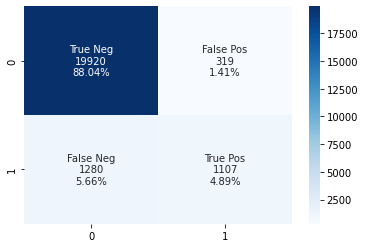

In [29]:
cf_matrix = confusion_matrix(y1_test,y1_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels_ = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels_ = np.asarray(labels_).reshape(2,2)

print('Confusion Matrix:')
print('-----------------')
print(sns.heatmap(cf_matrix, annot=labels_, fmt='', cmap='Blues'))

### **Task -2 : Naive Bayes Classifier**

In [30]:
# function for converting tokens to a single text
def word_to_string(tokens):
    strings = []
    for lst in tokens:
        string = ' '.join(lst)
        strings.append(string)
    return strings
        

In [31]:
# produce X, and y
# X is list of texts corresponding to each mail
X = word_to_string(mail_tokens)
y = list(data.iloc[:,-1])

###### Count Vectorizer

In [41]:
# convert all documents to vectors based on count of each terms
count_vectorizer = CountVectorizer()  #initialize count vectorizer
X_count = count_vectorizer.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.3, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [43]:
print('Classification Report:')
print('----------------------')
print(classification_report(y_test,y_pred))
print('\nClassification Accuracy:{:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     20239
           1       0.65      0.42      0.51      2387

    accuracy                           0.92     22626
   macro avg       0.79      0.70      0.73     22626
weighted avg       0.90      0.92      0.91     22626


Classification Accuracy:91.52%


Confusion Matrix:
-----------------
AxesSubplot(0.125,0.125;0.62x0.755)


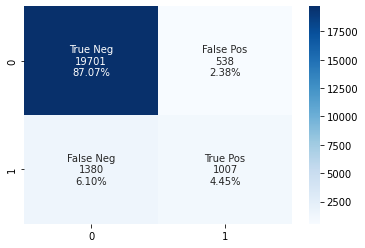

In [44]:
cf_matrix = confusion_matrix(y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels_ = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels_ = np.asarray(labels_).reshape(2,2)

print('Confusion Matrix:')
print('-----------------')
print(sns.heatmap(cf_matrix, annot=labels_, fmt='', cmap='Blues'))

###### TFIDF Vectorizer

In [80]:
# convert all documents to vectors based on tfidfs of each terms
vectorizer = TfidfVectorizer()  #initialize tf-idf vectorizer
X_tfidf = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [81]:
print('Classification Report:')
print('----------------------')
print(classification_report(y_test,y_pred))
print('\nClassification Accuracy:{:.2f}%'.format(accuracy_score(y_pred,y_test)*100))

Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     20239
           1       0.87      0.33      0.48      2387

    accuracy                           0.92     22626
   macro avg       0.90      0.66      0.72     22626
weighted avg       0.92      0.92      0.91     22626


Classification Accuracy:92.39%


Confusion Matrix:
-----------------
AxesSubplot(0.125,0.125;0.62x0.755)


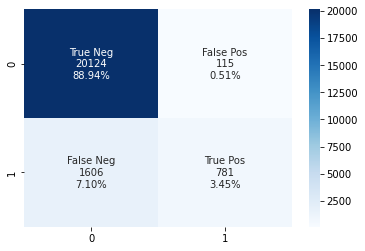

In [82]:
cf_matrix = confusion_matrix(y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels_ = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels_ = np.asarray(labels_).reshape(2,2)

print('Confusion Matrix:')
print('-----------------')
print(sns.heatmap(cf_matrix, annot=labels_, fmt='', cmap='Blues'))